<a href="https://colab.research.google.com/github/Salahaldeenibrahim/Dementia_Prediction/blob/main/FINAL_PreDIAG_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***CLASS DISTRUBTION***

I ran a table count for all of the pathological diagnosis, to recheck for any possible coloumns that could be worked with(have moderate class imbalance). Based on the results of the code below 'NPPFTLD', 'NPPLEWY', and 'NPCLEWY'may have enough data to work withprimarily NPPLEWY as its moderately balanced.

In [ ]:
from google.colab import files

uploaded = files.upload()

import pandas as pd
# Load the dataset
df = pd.read_csv('investigator_ftldlbd_nacc64 (1).csv.gz', low_memory=False)

# List of target columns of interest
target_columns = [
    'NPCNORM', 'NPPADP', 'NPCADP', 'NPPAD', 'NPCAD',
    'NPPLEWY', 'NPCLEWY', 'NPPVASC', 'NPCVASC',
    'NPPFTLD', 'NPCFTLD', 'NPPHIPP', 'NPCHIPP',
    'NPPPRION', 'NPCPRION', 'NPPOTH1', 'NPCOTH1',
    'NPPOTH2', 'NPCOTH2', 'NPPOTH3', 'NPCOTH3'
]

# Function to count occurrences of each unique value in target columns
def count_categories(df, columns):
    counts = {}
    for col in columns:
        counts[col] = df[col].value_counts()
    return pd.DataFrame(counts).fillna(0).astype(int)

# Get the table of counts for all target columns
target_counts = count_categories(df, target_columns)

# Print the table of counts
print(target_counts)

Saving investigator_ftldlbd_nacc64 (1).csv.gz to investigator_ftldlbd_nacc64 (1).csv (1).gz
      NPCNORM  NPPADP  NPCADP   NPPAD   NPCAD  NPPLEWY  NPCLEWY  NPPVASC  \
-4.0   152514  152514  152514  152514  152514   152514   152514   152514   
 0.0        4       4       4       0       4        4        4        4   
 1.0       45     793     756    4669     605      792     1200      540   
 2.0     6860    6326    6253    3120    6513     6230     5889     6595   

      NPCVASC  NPPFTLD  ...  NPPHIPP  NPCHIPP  NPPPRION  NPCPRION  NPPOTH1  \
-4.0   152514   152514  ...   152514   152514    152514    152514   152514   
 0.0        4        4  ...        4        4         4         4        4   
 1.0     2264      686  ...      145      610        79        13      521   
 2.0     5161     6306  ...     6772     6335      6796      6857     6422   

      NPCOTH1  NPPOTH2  NPCOTH2  NPPOTH3  NPCOTH3  
-4.0   152514   152514   152514   152514   152514  
 0.0        4        4        4 

# **Demographics of Diseases**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------
# Summary Table: Patient Characteristics
# ------------------------------

# Define functions for summary calculations
def calculate_summary_stats(group, column, dtype='numeric', unknown_values=[]):
    """Helper function to calculate summary statistics."""
    if dtype == 'numeric':
        valid_data = group[~group[column].isin(unknown_values)][column]  # Exclude unknown values
        mean = valid_data.mean()
        std = valid_data.std()
        return f"{mean:.1f} ({std:.1f})"
    elif dtype == 'categorical':
        valid_data = group[~group[column].isin(unknown_values)][column]
        counts = valid_data.value_counts(normalize=True) * 100
        return counts.to_dict()

# Initialize a dictionary to store results
summary_table = {}

# Loop through each target disease to calculate patient characteristics
for disease in ['NPPAD', 'NPCVASC', 'NPPFTLD', 'NPPLEWY', 'NPCLEWY']:
    # Select patients for the specific disease
    disease_group = df[df[disease] == 1]  # Filter for positive cases

    # Calculate total number of participants
    total_participants = len(disease_group)

    # Calculate mean and standard deviation for age and education
    age_stats = calculate_summary_stats(disease_group, 'NACCAGE', dtype='numeric', unknown_values=[])
    education_stats = calculate_summary_stats(disease_group, 'EDUC', dtype='numeric', unknown_values=[99])

    # Calculate gender distribution
    gender_distribution = calculate_summary_stats(disease_group, 'SEX', dtype='categorical', unknown_values=[])
    female_percentage = gender_distribution.get(2, 0)  # Assuming 2 = Female

    # Calculate race distribution
    race_distribution = calculate_summary_stats(
        disease_group, 'RACE', dtype='categorical', unknown_values=[50, 99]
    )

    # Calculate Hispanic ethnicity
    hispanic_distribution = calculate_summary_stats(
        disease_group, 'HISPANIC', dtype='categorical', unknown_values=[9]
    )
    hispanic_percentage = hispanic_distribution.get(1, 0)  # Assuming 1 = Hispanic

    # Add results to the summary table
    summary_table[disease] = {
        'Number of Participants': total_participants,
        'Age (years, mean ± SD)': age_stats,
        'Female, n (%)': f"{int(total_participants * female_percentage / 100)} ({female_percentage:.1f}%)",
        'Education (years, mean ± SD)': education_stats,
        'Race (%)': race_distribution,
        'Hispanic ethnicity, n (%)': f"{int(total_participants * hispanic_percentage / 100)} ({hispanic_percentage:.1f}%)"
    }

# Convert summary table to a DataFrame for better visualization
summary_df = pd.DataFrame(summary_table).T

# Print the summary table
print("Table 1: Patient Summary Characteristics")
print(summary_df.to_string())

# Save summary table as CSV
summary_df.to_csv("Table_1_All_Sample_Summary.csv", index=True)

# ------------------------------
# Co-diagnosis Analysis
# ------------------------------

# Create a DataFrame to store co-diagnosis counts for each pair of diseases
disease_names = ['NPPAD', 'NPCVASC', 'NPPFTLD', 'NPPLEWY', 'NPCLEWY']
co_diag = pd.DataFrame(index=disease_names, columns=disease_names)

for d1 in disease_names:
    for d2 in disease_names:
        count = df[(df[d1] == 1) & (df[d2] == 1)].shape[0]
        co_diag.loc[d1, d2] = count

print("\nCo-diagnosis Counts:")
print(co_diag)

# Save co-diagnosis table as CSV
co_diag.to_csv("CoDiagnosis_Counts.csv")

# ------------------------------
# Correlation between True and Predicted Diagnosis
# ------------------------------

# Assume predicted diagnosis columns exist with a "_pred" suffix.
predicted_columns = {disease: f"{disease}_pred" for disease in disease_names}

# Check that all predicted columns exist in the dataframe
if all(col in df.columns for col in predicted_columns.values()):
    true_diag = df[disease_names]
    pred_diag = df[list(predicted_columns.values())]

    # Compute Pearson correlations between true and predicted diagnosis for each disease
    correlations = {}
    for disease in disease_names:
        corr = true_diag[disease].corr(pred_diag[predicted_columns[disease]])
        correlations[disease] = corr

    corr_df = pd.DataFrame(list(correlations.items()), columns=["Disease", "True-Predicted Correlation"]).set_index("Disease")

    print("\nCorrelation between True and Predicted Diagnosis:")
    print(corr_df)

    # Plot correlation heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_df, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Correlation between True and Predicted Diagnosis")
    plt.savefig("True_Predicted_Correlation_Heatmap.png", dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("\nPredicted diagnosis columns not found in the dataframe. Skipping correlation analysis.")


Table 1: Patient Summary Characteristics
        Number of Participants Age (years, mean ± SD) Female, n (%) Education (years, mean ± SD)                                                                                     Race (%) Hispanic ethnicity, n (%)
NPPAD                     2884            80.0 (10.3)  1313 (45.5%)                   15.1 (3.1)                          {1: 94.81197771587743, 2: 4.282729805013927, 5: 0.9052924791086351}                 97 (3.4%)
NPCVASC                   1434             82.5 (9.0)   673 (46.9%)                   15.1 (3.3)  {1: 94.10526315789474, 2: 5.263157894736842, 5: 0.4912280701754386, 4: 0.14035087719298245}                 42 (3.0%)
NPPFTLD                    376            72.2 (10.3)   182 (48.4%)                   14.6 (3.6)   {1: 88.94878706199461, 2: 9.433962264150944, 3: 0.8086253369272237, 5: 0.8086253369272237}                 17 (4.6%)
NPPLEWY                    473             77.1 (8.1)   121 (25.6%)                   15.8 (3.0

## **PRE-DIAGNOSIS FILTERING**

Used the two variables below (NACCIDEM and NACCUDSD), first found the patients who eventually progressed to dementia using the NACCIDEM variable. Then, I use the NACCUDSD to filter out the patients who were diagnosed with dementia in there first visit, additionally, I used patients who did not progress to dementia to help predict the negative class (class imbalance maintainace).

In [ ]:
# Filter participants who progressed to dementia
dementia_progression = df[df['NACCIDEM'] == 1]

# Identify pre-diagnosis visits (exclude visits with dementia)
pre_diagnosis_dementia = dementia_progression[dementia_progression['NACCUDSD'] < 4]

# Include all visits for participants who did not progress to dementia
no_dementia = df[df['NACCIDEM'] == 0]

# Combine datasets
pre_diagnosis_visits = pd.concat([pre_diagnosis_dementia, no_dementia])

# Check dataset size
print("Pre-diagnosis dataset size:", pre_diagnosis_visits.shape)




Pre-diagnosis dataset size: (128858, 1936)


# DATA CLEANING

In [ ]:
# 0. (Optional) Quick check: make sure NACCADC really exists in your raw file
df = pd.read_csv(
    'investigator_ftldlbd_nacc64 (1).csv.gz',
    low_memory=False
)
if 'NACCADC' not in df.columns:
    raise KeyError("**NACCADC** column not found in your raw CSV. Please check the spelling/capitalization.")

# 1. Drop all the other non-numeric columns (but keep NACCADC)
non_numeric_columns = [
    # Original non-numeric/drug/ID columns
    'DRUG1', 'DRUG2', 'DRUG3', 'DRUG4', 'DRUG5', 'DRUG6',
    'MOCALANX', 'RESPOTHX', 'PATIENT_KEY', 'MMSELOC', 'NPSYCLOC',

    # Genetic/data availability variables (1-13 and others)
    'ADGCGWAS', 'ADGCEXOM', 'ADGCRND', 'ADGCEXR',
    'NGDSGWAS', 'NGDSEXOM', 'NGDSWGS', 'NGDSWES',
    'NGDSGWAC', 'NGDSEXAC', 'NGDSWGAC', 'NGDSWEAC', 'NACCNCRD',

    # Post-mortem/autopsy/neuropathology variables
    'NPCADP', 'NACCINF', 'NACCMICR', 'NACCHEM', 'NACCAVAS',
    'NACCNEUR', 'NACCAMY', 'NACCPICK', 'NACCCBD', 'NACCPROG',
    'NACCPRIO', 'NACCOTHP', 'NACCBRNN', 'NACCMRSA', 'NPOCRIT',
    'NPCHROM', 'NACCMCIL', 'NACCCSFP', 'NPPMIH', 'NPFIX', 'NACCBNKF',
    'NPBNKB', 'NACCFORM', 'NACCPARA', 'NPFAUT', 'NPFAUT1', 'NPFAUT2',
    'NPFAUT3', 'NPFAUT4', 'NACCAUTP', 'NACCFTD', 'NACCLBDM', 'NACCNMRI',
    'NACCNAPA', 'NACCAPSA', 'ADGCGWA', 'NGDSWES', 'NGDSEXOM'
]
# filter out any entry that isn’t in df, and ensure we never drop NACCADC
to_drop = [c for c in non_numeric_columns if c in df.columns and c != 'NACCADC']
df_cleaned = df.drop(columns=to_drop).copy()

# 2. (Safety) Re‑attach NACCADC from the original, in case something odd happened above
df_cleaned['NACCADC'] = df['NACCADC']

# 3. Filter for pre-diagnosis visits
pre_diagnosis_df = df_cleaned[
    ((df_cleaned['NACCIDEM'] == 1) & (df_cleaned['NACCUDSD'] != 4)) |
    (df_cleaned['NACCIDEM'] == 0)
]
print("Filtered pre-diagnosis dataset size:", pre_diagnosis_df.shape)


# At this point:
#   - `features` definitely contains the NACCADC column
#   - `targets` contains only your 5 binary outcomes


Filtered pre-diagnosis dataset size: (128858, 1878)


# Model Training

In [ ]:
#cell 1:
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, average_precision_score,
                             confusion_matrix)
import xgboost as xgb
from sklearn.metrics import RocCurveDisplay
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import precision_recall_curve

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.impute._base")
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", message=".*Ill-conditioned matrix.*")

# Enhanced Configuration
MIN_SAMPLES_PER_ADC = 200
SMOTE_SAMPLING_STRATEGY = 0.85  # More conservative than 'auto'
EARLY_STOPPING_ROUNDS = 50
N_JOBS = -1
TREE_METHOD = 'gpu_hist' if xgb.__version__ >= '1.5.0' else 'hist'

disease_names = {
    'NPPAD': "Alzheimer's Disease",
    'NPCVASC': "Vascular Dementia",
    'NPPFTLD': "Frontotemporal Lobar Degeneration",
    'NPPLEWY': "Lewy Body Dementia",
    'NPCLEWY': "Lewy Body Dementia Contributing"
}

In [ ]:
 # Cell 2 - Modified to split FIRST before any processing
print("Creating enhanced stratified split...")

# --- Split FIRST to prevent leakage ---
# Create stratification label BEFORE splitting
targets = pre_diagnosis_df[disease_names.keys()].copy()
targets['strat_label'] = targets.apply(lambda x: '_'.join(x.astype(str)), axis=1)

# Remove samples with unique stratification labels
strat_counts = targets['strat_label'].value_counts()
valid_labels = strat_counts[strat_counts >= 2].index
mask = targets['strat_label'].isin(valid_labels)

# Apply filtering
targets = targets[mask]
features = pre_diagnosis_df.loc[targets.index].drop(columns=disease_names.keys())

# Perform stratified split
train_idx, test_idx = train_test_split(
features.index,
test_size=0.2,
random_state=42,
stratify=targets['strat_label']
)

# Split features and targets
features_train_raw = features.loc[train_idx]
features_test_raw = features.loc[test_idx]
targets_train = targets.loc[train_idx].drop(columns='strat_label')
targets_test = targets.loc[test_idx].drop(columns='strat_label')

print(f"Train samples: {len(train_idx)}, Test samples: {len(test_idx)}")

Creating enhanced stratified split...
Train samples: 103084, Test samples: 25772


In [ ]:
# Cell 3: Error-Free Data Preprocessing (Updated to prevent leakage)
print("Starting data preprocessing...")

# --- Function definitions ---
def clean_target_values(df):
    """Robust target cleaning with full NaN elimination"""
    df = df.replace(-4, np.nan)
    df = df.ffill(limit=2).bfill(limit=2)
    return df.apply(lambda col: col.fillna(col.mode()[0] if not col.mode().empty else 0))

def define_binary_labels(df):
    """Safe type conversion with NaN check"""
    df = df.replace({1.0: 1, 2.0: 0, 0.0: 0})
    assert df.isna().sum().sum() == 0, "NaNs present in targets!"
    return df.astype(np.int8)

# --- Main preprocessing logic ---
# Step 1: Convert features to numeric (train/test already split)
for df in [features_train_raw, features_test_raw]:
    for col in df.columns:
        if col not in ['NACCADC'] + list(disease_names.keys()):
            df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 2: Identify categorical features using TRAINING DATA ONLY
target_columns = list(disease_names.keys())
categorical_cols = []
for col in features_train_raw.columns:
    if col not in ['NACCADC'] + target_columns:
        unique_vals = features_train_raw[col].dropna().unique()
        if len(unique_vals) > 2:
            is_integer = all(np.isclose(val, np.round(val)) for val in unique_vals)
            if is_integer:
                categorical_cols.append(col)

# Step 3: One-hot encode using categories from TRAINING DATA
from sklearn.preprocessing import OneHotEncoder

# Fit encoder on training data
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop=None)
encoder.fit(features_train_raw[categorical_cols])

# Transform both datasets
train_encoded = encoder.transform(features_train_raw[categorical_cols])
test_encoded = encoder.transform(features_test_raw[categorical_cols])

# Create DataFrames
encoded_cols = encoder.get_feature_names_out(categorical_cols)
features_train_processed = features_train_raw.drop(columns=categorical_cols).join(
    pd.DataFrame(train_encoded, columns=encoded_cols, index=features_train_raw.index)
)
features_test_processed = features_test_raw.drop(columns=categorical_cols).join(
    pd.DataFrame(test_encoded, columns=encoded_cols, index=features_test_raw.index)
)

# Step 4: Clean targets (already split)
targets_train = define_binary_labels(clean_target_values(targets_train))
targets_test = define_binary_labels(clean_target_values(targets_test))

# Step 5: Remove biased features using TRAINING DATA ONLY
def get_biased_features(df, targets):
    biased = set()
    for feature in df.columns:
        if feature in ['NACCADC'] + target_columns:
            continue
        non_na_mask = df[feature].notna()
        if non_na_mask.any():
            for target_col in targets.columns:
                if (targets.loc[non_na_mask, target_col] == 1).all():
                    biased.add(feature)
                    break
    return biased

biased_features = get_biased_features(features_train_processed, targets_train)
print(f"Removing {len(biased_features)} biased features:", list(biased_features))

# Remove from both sets using same features
features_train_processed = features_train_processed.drop(columns=biased_features)
features_test_processed = features_test_processed.drop(columns=biased_features)

# Step 6: Median imputation using TRAINING MEDIANS
for col in features_train_processed.columns:
    if col not in ['NACCADC'] + target_columns:
        train_median = features_train_processed[col].median()
        features_train_processed[col] = features_train_processed[col].fillna(train_median)
        features_test_processed[col] = features_test_processed[col].fillna(train_median)

# Update global variables
features = pd.concat([features_train_processed, features_test_processed])
targets = pd.concat([targets_train, targets_test])

Starting data preprocessing...
Removing 1 biased features: ['NACCWRI3']


/usr/local/lib/python3.11/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.11/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.11/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.11/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.11/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.11/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [ ]:
from google.colab import drive
import os
import pandas as pd
import time

class ImputationProgress:
    def __init__(self, total_steps=0):
        self.current_step = 0
        self.total_steps = total_steps
        self.start_time = time.time()

    def update(self, message):
        self.current_step += 1
        elapsed = time.time() - self.start_time
        if self.total_steps > 0:
            progress_percent = self.current_step / self.total_steps
            print(f"[{elapsed:.1f}s] [Progress {progress_percent:.0%}] {message}")
        else:
            print(f"[{elapsed:.1f}s] {message}")

def find_imputation_files():
    progress = ImputationProgress()

    drive.mount('/content/drive', force_remount=False)
    progress.update("Google Drive mounted.")

    search_root_dir = '/content/drive/MyDrive/'
    found_files = {
        "kfold": [],
        "train": [],
        "test": []
    }

    print(f"\nSearching for imputation files in: {search_root_dir} (this may take a while)...")

    for root, dirs, files in os.walk(search_root_dir):
        for file in files:
            if file.startswith("imputed_kfold_") and file.endswith(".csv"):
                full_path = os.path.join(root, file)
                found_files["kfold"].append(full_path)
                print(f"Found K-Fold file: {full_path}")
            elif file == "imputed_train.csv":
                full_path = os.path.join(root, file)
                found_files["train"].append(full_path)
                print(f"Found Train file: {full_path}")
            elif file == "imputed_test.csv":
                full_path = os.path.join(root, file)
                found_files["test"].append(full_path)
                print(f"Found Test file: {full_path}")

    print("\n--- Search Complete ---")

    if found_files["kfold"]:
        print("\n**Imputed K-Fold Files Found:**")
        for f_path in found_files["kfold"]:
            print(f_path)
    else:
        print("\nNo 'imputed_kfold_*.csv' files were found.")

    if found_files["train"]:
        print("\n**Imputed Train File Found:**")
        for f_path in found_files["train"]:
            print(f_path)
    else:
        print("\nNo 'imputed_train.csv' file was found.")

    if found_files["test"]:
        print("\n**Imputed Test File Found:**")
        for f_path in found_files["test"]:
            print(f_path)
    else:
        print("\nNo 'imputed_test.csv' file was found.")

    print("\nYou can now load these files using pd.read_csv(file_path).")
    return found_files


if __name__ == "__main__":
    all_found_files = find_imputation_files()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[2.0s] Google Drive mounted.

Searching for imputation files in: /content/drive/MyDrive/ (this may take a while)...
Found K-Fold file: /content/drive/MyDrive/imputed_kfold_3.csv
Found K-Fold file: /content/drive/MyDrive/imputed_kfold_2.csv
Found K-Fold file: /content/drive/MyDrive/imputed_kfold_1.csv
Found K-Fold file: /content/drive/MyDrive/imputed_data/imputed_kfold_4.csv
Found K-Fold file: /content/drive/MyDrive/imputed_data/imputed_kfold_5.csv
Found Train file: /content/drive/MyDrive/imputed_data/imputed_train.csv
Found Test file: /content/drive/MyDrive/imputed_data/imputed_test.csv

--- Search Complete ---

**Imputed K-Fold Files Found:**
/content/drive/MyDrive/imputed_kfold_3.csv
/content/drive/MyDrive/imputed_kfold_2.csv
/content/drive/MyDrive/imputed_kfold_1.csv
/content/drive/MyDrive/imputed_data/imputed_kfold_4.csv
/content/drive/MyDrive/imputed_dat

In [ ]:

import pandas as pd
from google.colab import drive
import os

# Mount Google Drive
# drive.mount('/content/drive', force_remount=False) # force_remount=False is used because it's likely already mounted.
drive.mount('/content/drive', force_remount=False)


base_drive_path = '/content/drive/MyDrive/'

# Define the full paths to the imputed files
train_file_path = os.path.join(base_drive_path, 'imputed_train.csv')
test_file_path = os.path.join(base_drive_path, 'imputed_test.csv')

# Load the imputed data into pandas DataFrames
try:
    final_train_data = pd.read_csv(train_file_path)
    final_test_data = pd.read_csv(test_file_path)
    print(f"Successfully loaded training data from: {train_file_path}")
    print(f"Successfully loaded testing data from: {test_file_path}")
except FileNotFoundError:
    print(f"Error: One or both imputed files not found at the expected paths.")
    print(f"Please ensure '{train_file_path}' and '{test_file_path}' exist.")
    final_train_data = None
    final_test_data = None
except Exception as e:
    print(f"An unexpected error occurred while loading files: {e}")
    final_train_data = None
    final_test_data = None


if final_train_data is not None:
    print("First 5 rows of final_train_data:")
    print(final_train_data.head())
if final_test_data is not None:
    print("First 5 rows of final_test_data:")
    print(final_test_data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error: One or both imputed files not found at the expected paths.
Please ensure '/content/drive/MyDrive/imputed_train.csv' and '/content/drive/MyDrive/imputed_test.csv' exist.


In [ ]:
import pandas as pd
import numpy as np
import gc
from scipy import sparse
from sklearn.feature_selection import mutual_info_classif, SelectPercentile, VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import datetime
import os
import joblib

# Enhanced Configuration
ALZHEIMERS_COL = 'NPPAD'
TOP_FEATURES_PERCENTILE = 30
SMOTE_SAMPLING_STRATEGY_RATIO = 0.7
SMOTE_NEIGHBORS = 7
RANDOM_STATE = 42

print("Memory-optimized data processing for Alzheimer's prediction...")

# Load data safely
print("Loading data with optimized dtypes...")
# Reverting to the original file paths
features_train_imp = pd.read_csv('/content/drive/MyDrive/imputed_data/imputed_train.csv')
features_test_imp = pd.read_csv('/content/drive/MyDrive/imputed_data/imputed_test.csv')


try:
    _ = targets_train
    _ = targets_test
except NameError:
    print("Warning: targets_train or targets_test not found. Creating dummy targets for demonstration.")

    targets_train = pd.DataFrame(np.random.randint(0, 2, size=(features_train_imp.shape[0], 2)), columns=['NPPAD', 'OtherTarget'])
    targets_test = pd.DataFrame(np.random.randint(0, 2, size=(features_test_imp.shape[0], 2)), columns=['NPPAD', 'OtherTarget'])


if 'NACCADC' in features_train_imp.columns:
    adc_train_original = features_train_imp['NACCADC'].copy().values
    adc_test_original = features_test_imp['NACCADC'].copy().values
    features_train_imp = features_train_imp.drop(columns=['NACCADC'])
    features_test_imp = features_test_imp.drop(columns=['NACCADC'])
    print("NACCADC column separated from main feature set.")
else:
    adc_train_original = np.full(features_train_imp.shape[0], np.nan)
    adc_test_original = np.full(features_test_imp.shape[0], np.nan)   #
    print("NACCADC column not found. Proceeding without it for main feature set.")



non_adc_cols_after_drop = features_train_imp.columns.tolist()
features_train_imp[non_adc_cols_after_drop] = features_train_imp[non_adc_cols_after_drop].astype(np.float16)
features_test_imp[non_adc_cols_after_drop] = features_test_imp[non_adc_cols_after_drop].astype(np.float16)

alz_targets_train = targets_train[ALZHEIMERS_COL].copy().astype(np.int8)
alz_targets_test = targets_test[ALZHEIMERS_COL].copy().astype(np.int8)

# Memory cleanup
gc.collect()

# Preprocessing and Scaling
print("Applying efficient feature scaling...")
numerical_cols = [c for c in features_train_imp.columns
                 if features_train_imp[c].dtype == np.float16]

# 1. Check for infinite values and replace with NaN
print("Checking for and handling infinite values...")
for col in numerical_cols:
    if np.isinf(features_train_imp[col]).any():
        print(f"Warning: Infinite values found in features_train_imp column: {col}. Replacing with NaN.")
        features_train_imp[col] = features_train_imp[col].replace([np.inf, -np.inf], np.nan)
    if np.isinf(features_test_imp[col]).any():
        print(f"Warning: Infinite values found in features_test_imp column: {col}. Replacing with NaN.")
        features_test_imp[col] = features_test_imp[col].replace([np.inf, -np.inf], np.nan)

# 2. Impute NaN values BEFORE scaling and feature selection
print("Imputing NaN values before scaling...")
imputer = SimpleImputer(strategy='mean')

# Apply imputer on float32 for robustness, then cast back to float16
features_train_imp[numerical_cols] = imputer.fit_transform(features_train_imp[numerical_cols].astype(np.float32)).astype(np.float16)
features_test_imp[numerical_cols] = imputer.transform(features_test_imp[numerical_cols].astype(np.float32)).astype(np.float16)

del imputer
gc.collect()

# 3. Scaling: Perform scaling on float32 for numerical stability
scaler = StandardScaler()
features_train_imp[numerical_cols] = scaler.fit_transform(features_train_imp[numerical_cols].astype(np.float32)).astype(np.float16)
features_test_imp[numerical_cols] = scaler.transform(features_test_imp[numerical_cols].astype(np.float32)).astype(np.float16)

del scaler
gc.collect()

#
print("Applying initial aggressive feature selection (Variance Threshold + Mutual Information)...")

# 1. Remove low-variance features
selector_vt = VarianceThreshold(threshold=0.1)
selector_vt.fit(features_train_imp)
selected_mask_vt = selector_vt.get_support()
selected_features_vt = features_train_imp.columns[selected_mask_vt].tolist()

print(f"Features after Variance Threshold: {len(selected_features_vt)}")

# 2. Mutual information filtering (selects features based on their relationship with the target)
selector_mi = SelectPercentile(score_func=mutual_info_classif, percentile=TOP_FEATURES_PERCENTILE)
selector_mi.fit(features_train_imp[selected_features_vt], alz_targets_train)

selected_mask_mi = selector_mi.get_support()
# This list now holds the names of features selected after VT and MI, EXCLUDING NACCADC
initial_selected_feature_names = np.array(selected_features_vt)[selected_mask_mi].tolist()

print(f"Features after MI selection: {len(initial_selected_feature_names)}")


X_train_processed_for_model = features_train_imp[initial_selected_feature_names].astype(np.float32)
X_test_processed_for_model = features_test_imp[initial_selected_feature_names].astype(np.float32)


# Memory cleanup
del features_train_imp, features_test_imp, selector_vt, selector_mi
gc.collect()


# --- Save the preprocessed data to a new, uniquely named file ---
print("\n--- Saving Preprocessed Data ---")
PREPROCESSED_DATA_DIR = '/content/drive/MyDrive/alzheimers_model_ultimate/preprocessed_data/'
os.makedirs(PREPROCESSED_DATA_DIR, exist_ok=True)

# Generate a unique filename for the preprocessed data
timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
preprocessed_filename = os.path.join(PREPROCESSED_DATA_DIR, f"preprocessed_data_{timestamp}.joblib")

# Package all necessary outputs into a dictionary
preprocessed_output = {
    'X_train_processed_for_model': X_train_processed_for_model,
    'X_test_processed_for_model': X_test_processed_for_model,
    'alz_targets_train': alz_targets_train,
    'alz_targets_test': alz_targets_test,
    'adc_train_original': adc_train_original, # Original NACCADC train values
    'adc_test_original': adc_test_original,   # Original NACCADC test values
    'initial_selected_feature_names': initial_selected_feature_names # Features entering nested CV
}

joblib.dump(preprocessed_output, preprocessed_filename)
print(f"Preprocessed data saved to: {preprocessed_filename}")

print("\nData preparation complete!")
print(f"Features entering model training (X_train_processed_for_model) shape: {X_train_processed_for_model.shape}")


Memory-optimized data processing for Alzheimer's prediction...
Loading data with optimized dtypes...
NACCADC column separated from main feature set.
Applying efficient feature scaling...
Checking for and handling infinite values...
Imputing NaN values before scaling...
Applying initial aggressive feature selection (Variance Threshold + Mutual Information)...
Features after Variance Threshold: 1485
Features after MI selection: 446

--- Saving Preprocessed Data ---
Preprocessed data saved to: /content/drive/MyDrive/alzheimers_model_ultimate/preprocessed_data/preprocessed_data_20250625_181648.joblib

Data preparation complete!
Features entering model training (X_train_processed_for_model) shape: (103084, 446)


## **ALZHEIMERS MODEL**

--- ULTIMATE ALZHEIMER'S DISEASE TRAINING PIPELINE ---
Incorporating Nested Cross-Validation and Robust SHAP Analysis (with Checkpointing)

--- Loading preprocessed data ---
Loading latest preprocessed data from: /content/drive/MyDrive/alzheimers_model_ultimate/preprocessed_data/preprocessed_data_20250624_213615.joblib
  Initial feature set loaded (excluding NACCADC): 446 features.
  Overall X_train shape: (103084, 446), y_train shape: (103084,)
  Overall X_test shape: (25772, 446), y_test shape: (25772,)
  Class distribution (overall train):  Counter({0: 99964, 1: 3120})

--- Starting Nested Cross-Validation for Hyperparameter Tuning & Feature Selection ---
Outer loop: 3 folds. Inner loop: 3 folds with 3 Optuna trials.
No existing outer fold checkpoints found. Starting from scratch.

--- OUTER FOLD 1/3 ---


[I 2025-06-24 21:36:19,086] A new study created in memory with name: no-name-f2e50077-fe66-4340-a808-6f901a3e4a51


  Outer train shape: (68722, 446), Outer test shape: (34362, 446)
  Outer train class distribution: Counter({0: 66642, 1: 2080})
  Running Optuna for XGBoost (Outer Fold 1)...


[I 2025-06-24 21:52:23,246] Trial 0 finished with value: 0.19716172863049777 and parameters: {'n_estimators': 624, 'learning_rate': 0.13125830316209655, 'max_depth': 8, 'subsample': 0.8095304694689628, 'colsample_bytree': 0.6546065241548528, 'gamma': 1.5885362614907343e-07, 'reg_lambda': 3.6589056619847695e-08, 'reg_alpha': 2.5177723297049526}. Best is trial 0 with value: 0.19716172863049777.
[I 2025-06-24 22:08:59,444] Trial 1 finished with value: 0.21032426601979626 and parameters: {'n_estimators': 942, 'learning_rate': 0.06803900745073706, 'max_depth': 3, 'subsample': 0.939468448256698, 'colsample_bytree': 0.8913549242801475, 'gamma': 4.3131289636915034e-07, 'reg_lambda': 5.80116079086011e-07, 'reg_alpha': 6.009451572352867e-07}. Best is trial 1 with value: 0.21032426601979626.
[I 2025-06-24 22:25:52,935] Trial 2 finished with value: 0.21299660536962828 and parameters: {'n_estimators': 526, 'learning_rate': 0.04141536110538596, 'max_depth': 6, 'subsample': 0.7019301990693146, 'colsa

  Best XGBoost params for Outer Fold 1: {'n_estimators': 526, 'learning_rate': 0.04141536110538596, 'max_depth': 6, 'subsample': 0.7019301990693146, 'colsample_bytree': 0.8141485131528328, 'gamma': 1.1856569434146477e-07, 'reg_lambda': 6.815570007042738e-06, 'reg_alpha': 3.5754649812472735e-05}
  Running Optuna for CatBoost (Outer Fold 1)...


[I 2025-06-24 22:45:05,191] Trial 0 finished with value: 0.21429331000351987 and parameters: {'iterations': 1363, 'learning_rate': 0.04529315432680911, 'depth': 7, 'l2_leaf_reg': 12.00291651198469, 'subsample': 0.6699594655455938, 'colsample_bylevel': 0.6445389901303696}. Best is trial 0 with value: 0.21429331000351987.
[I 2025-06-24 23:02:45,229] Trial 1 finished with value: 0.2136717604521161 and parameters: {'iterations': 1180, 'learning_rate': 0.032241169559635206, 'depth': 5, 'l2_leaf_reg': 7.919054283085884, 'subsample': 0.8749360673457232, 'colsample_bylevel': 0.6569830121439958}. Best is trial 0 with value: 0.21429331000351987.
[I 2025-06-24 23:18:55,516] Trial 2 finished with value: 0.2066956215235832 and parameters: {'iterations': 261, 'learning_rate': 0.02460796425027957, 'depth': 7, 'l2_leaf_reg': 17.658935095030703, 'subsample': 0.8152070275034533, 'colsample_bylevel': 0.7484013648251528}. Best is trial 0 with value: 0.21429331000351987.


  Best CatBoost params for Outer Fold 1: {'iterations': 1363, 'learning_rate': 0.04529315432680911, 'depth': 7, 'l2_leaf_reg': 12.00291651198469, 'subsample': 0.6699594655455938, 'colsample_bylevel': 0.6445389901303696}
  Training final models for Outer Fold 1 with best found parameters...
  Features selected for this fold: 30
  Outer Fold 1 Test Metrics:
    ROC AUC: 0.5857
    AUPRC: 0.1941
    F1 Score: 0.2681
    Precision: 0.6744
    Recall: 0.1673
  Outer Fold 1 checkpoint saved.

--- OUTER FOLD 2/3 ---


[I 2025-06-24 23:25:29,025] A new study created in memory with name: no-name-4ab562c9-4a21-4911-8eca-9594e487286e


  Outer train shape: (68723, 446), Outer test shape: (34361, 446)
  Outer train class distribution: Counter({0: 66643, 1: 2080})
  Running Optuna for XGBoost (Outer Fold 2)...


[I 2025-06-24 23:40:58,692] Trial 0 finished with value: 0.17005758114007566 and parameters: {'n_estimators': 261, 'learning_rate': 0.05203766884392413, 'max_depth': 3, 'subsample': 0.6842063669878721, 'colsample_bytree': 0.7144986695338988, 'gamma': 0.04115984896052657, 'reg_lambda': 0.02886615883745933, 'reg_alpha': 0.0017730299200216328}. Best is trial 0 with value: 0.17005758114007566.
[I 2025-06-24 23:56:22,147] Trial 1 finished with value: 0.19519928452239046 and parameters: {'n_estimators': 140, 'learning_rate': 0.07293818592552698, 'max_depth': 5, 'subsample': 0.8807164915200332, 'colsample_bytree': 0.6890473940509577, 'gamma': 2.7412927720157198e-08, 'reg_lambda': 2.5444807662124083, 'reg_alpha': 1.3923666136634656e-06}. Best is trial 1 with value: 0.19519928452239046.
[I 2025-06-25 00:11:49,042] Trial 2 finished with value: 0.18947380515315052 and parameters: {'n_estimators': 667, 'learning_rate': 0.023537389631022598, 'max_depth': 3, 'subsample': 0.8951286429803966, 'colsamp

  Best XGBoost params for Outer Fold 2: {'n_estimators': 140, 'learning_rate': 0.07293818592552698, 'max_depth': 5, 'subsample': 0.8807164915200332, 'colsample_bytree': 0.6890473940509577, 'gamma': 2.7412927720157198e-08, 'reg_lambda': 2.5444807662124083, 'reg_alpha': 1.3923666136634656e-06}
  Running Optuna for CatBoost (Outer Fold 2)...


[I 2025-06-25 00:29:12,525] Trial 0 finished with value: 0.1915556791782842 and parameters: {'iterations': 1133, 'learning_rate': 0.02510832832400263, 'depth': 6, 'l2_leaf_reg': 0.3699423095708906, 'subsample': 0.7989118648232076, 'colsample_bylevel': 0.9084483003570076}. Best is trial 0 with value: 0.1915556791782842.
[I 2025-06-25 00:44:40,425] Trial 1 finished with value: 0.1422405559294939 and parameters: {'iterations': 146, 'learning_rate': 0.010240725720306591, 'depth': 4, 'l2_leaf_reg': 0.041564468407255424, 'subsample': 0.9391468168432631, 'colsample_bylevel': 0.6197996438128248}. Best is trial 0 with value: 0.1915556791782842.
[I 2025-06-25 01:00:29,515] Trial 2 finished with value: 0.20266825387448884 and parameters: {'iterations': 225, 'learning_rate': 0.021324711439729, 'depth': 7, 'l2_leaf_reg': 0.01824152256301752, 'subsample': 0.8003709755978227, 'colsample_bylevel': 0.7163830831783654}. Best is trial 2 with value: 0.20266825387448884.


  Best CatBoost params for Outer Fold 2: {'iterations': 225, 'learning_rate': 0.021324711439729, 'depth': 7, 'l2_leaf_reg': 0.01824152256301752, 'subsample': 0.8003709755978227, 'colsample_bylevel': 0.7163830831783654}
  Training final models for Outer Fold 2 with best found parameters...
  Features selected for this fold: 30
  Outer Fold 2 Test Metrics:
    ROC AUC: 0.6085
    AUPRC: 0.2050
    F1 Score: 0.2904
    Precision: 0.6323
    Recall: 0.1885
  Outer Fold 2 checkpoint saved.

--- OUTER FOLD 3/3 ---


[I 2025-06-25 01:05:42,154] A new study created in memory with name: no-name-975d1e94-9cf3-4bf0-812f-c0e78fee3050


  Outer train shape: (68723, 446), Outer test shape: (34361, 446)
  Outer train class distribution: Counter({0: 66643, 1: 2080})
  Running Optuna for XGBoost (Outer Fold 3)...


[I 2025-06-25 01:21:24,495] Trial 0 finished with value: 0.2005223278319085 and parameters: {'n_estimators': 1269, 'learning_rate': 0.013281581217028014, 'max_depth': 8, 'subsample': 0.7261752926896999, 'colsample_bytree': 0.7257587932328251, 'gamma': 0.0004903520755033017, 'reg_lambda': 6.595626501115685e-05, 'reg_alpha': 9.280747833216822e-05}. Best is trial 0 with value: 0.2005223278319085.
[I 2025-06-25 01:36:57,413] Trial 1 finished with value: 0.19527723693620158 and parameters: {'n_estimators': 814, 'learning_rate': 0.06842248571544682, 'max_depth': 9, 'subsample': 0.759817388128628, 'colsample_bytree': 0.749678032371563, 'gamma': 7.474009258555598e-08, 'reg_lambda': 1.2983584171136356e-06, 'reg_alpha': 19.341621394752725}. Best is trial 0 with value: 0.2005223278319085.
[I 2025-06-25 01:52:40,919] Trial 2 finished with value: 0.1807838293581599 and parameters: {'n_estimators': 1421, 'learning_rate': 0.10891954766828595, 'max_depth': 7, 'subsample': 0.674838684245713, 'colsample

  Best XGBoost params for Outer Fold 3: {'n_estimators': 1269, 'learning_rate': 0.013281581217028014, 'max_depth': 8, 'subsample': 0.7261752926896999, 'colsample_bytree': 0.7257587932328251, 'gamma': 0.0004903520755033017, 'reg_lambda': 6.595626501115685e-05, 'reg_alpha': 9.280747833216822e-05}
  Running Optuna for CatBoost (Outer Fold 3)...


[I 2025-06-25 02:08:16,586] Trial 0 finished with value: 0.19513544427321464 and parameters: {'iterations': 230, 'learning_rate': 0.11164268955884926, 'depth': 6, 'l2_leaf_reg': 0.04383816348107825, 'subsample': 0.848887284991452, 'colsample_bylevel': 0.7777910803621727}. Best is trial 0 with value: 0.19513544427321464.
[I 2025-06-25 02:25:02,794] Trial 1 finished with value: 0.1805799326084906 and parameters: {'iterations': 743, 'learning_rate': 0.08903239571549317, 'depth': 7, 'l2_leaf_reg': 0.12354677760870805, 'subsample': 0.806999839569904, 'colsample_bylevel': 0.6328073449671224}. Best is trial 0 with value: 0.19513544427321464.
[I 2025-06-25 02:43:07,836] Trial 2 finished with value: 0.20062910736973916 and parameters: {'iterations': 1218, 'learning_rate': 0.020583567423247306, 'depth': 7, 'l2_leaf_reg': 0.1251659042127664, 'subsample': 0.9463624537172199, 'colsample_bylevel': 0.7370108396304806}. Best is trial 2 with value: 0.20062910736973916.


  Best CatBoost params for Outer Fold 3: {'iterations': 1218, 'learning_rate': 0.020583567423247306, 'depth': 7, 'l2_leaf_reg': 0.1251659042127664, 'subsample': 0.9463624537172199, 'colsample_bylevel': 0.7370108396304806}
  Training final models for Outer Fold 3 with best found parameters...
  Features selected for this fold: 30
  Outer Fold 3 Test Metrics:
    ROC AUC: 0.5968
    AUPRC: 0.2138
    F1 Score: 0.2853
    Precision: 0.7198
    Recall: 0.1779
  Outer Fold 3 checkpoint saved.

--- Nested Cross-Validation Final Results ---
Average ROC AUC: 0.5970 +/- 0.0093
Average AUPRC: 0.2043 +/- 0.0081
Average F1 Score: 0.2812 +/- 0.0095
Average Precision: 0.6755 +/- 0.0358
Average Recall: 0.1779 +/- 0.0086

--- Feature Consistency Analysis Across Outer Folds ---
Feature Selection Frequency Across Outer Folds:
     feature  selection_count  selection_freq
0        SEX                3             1.0
1   TOBAC100                3             1.0
2   HYPERCHO                3             

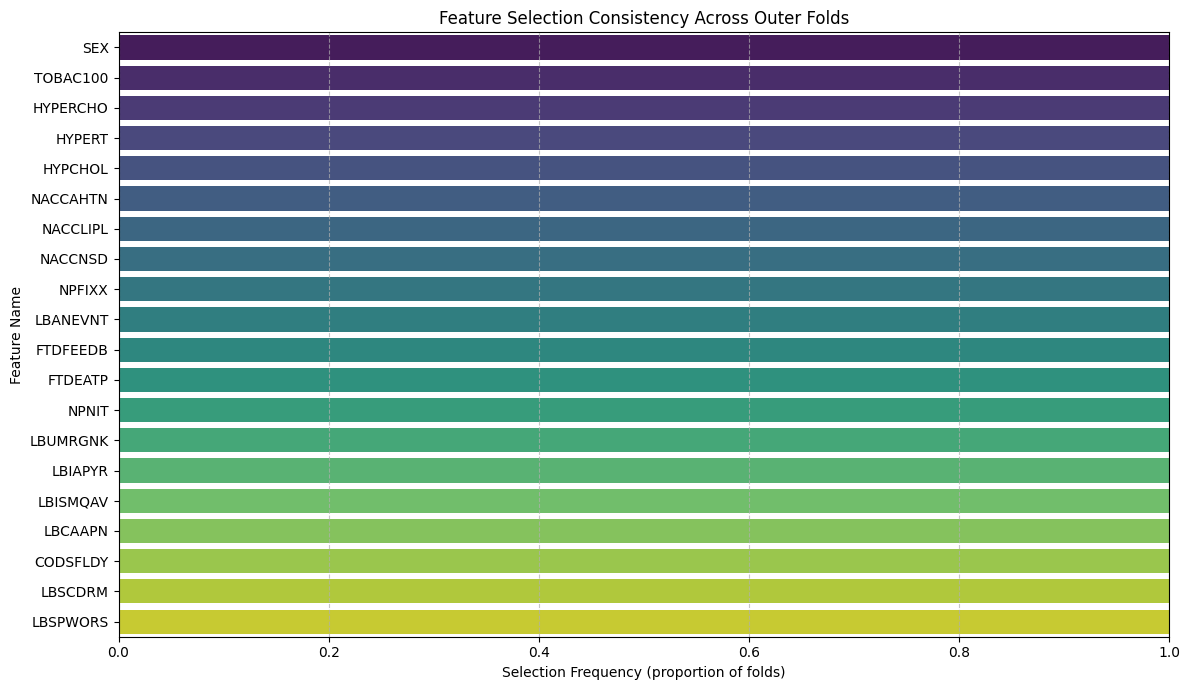


--- Training Final Model on Entire Training Dataset for Deployment & SHAP Analysis ---
Using parameters from Outer Fold 3 for final model training.
  Final XGBoost params: {'n_estimators': 1269, 'learning_rate': 0.013281581217028014, 'max_depth': 8, 'subsample': 0.7261752926896999, 'colsample_bytree': 0.7257587932328251, 'gamma': 0.0004903520755033017, 'reg_lambda': 6.595626501115685e-05, 'reg_alpha': 9.280747833216822e-05}
  Final CatBoost params: {'iterations': 1218, 'learning_rate': 0.020583567423247306, 'depth': 7, 'l2_leaf_reg': 0.1251659042127664, 'subsample': 0.9463624537172199, 'colsample_bylevel': 0.7370108396304806}
  Final model trained with 30 features.
Final trained Stacking Classifier model and features saved to: /content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/stacking_classifier_final_model_20250625_030024.joblib

--- SHAP-BASED FEATURE INTERPRETATION (Publishable Way) ---
  Calculating SHAP values on 5000 samples (background: 500)...


100%|===================| 4994/5000 [10:55<00:00]       

SHAP results saved to: /content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/shap_results_20250625_031121.joblib
  Shape of SHAP values for positive class: (5000, 30)

--- Visualizing SHAP Global Feature Importance (Mean Absolute SHAP Value) ---


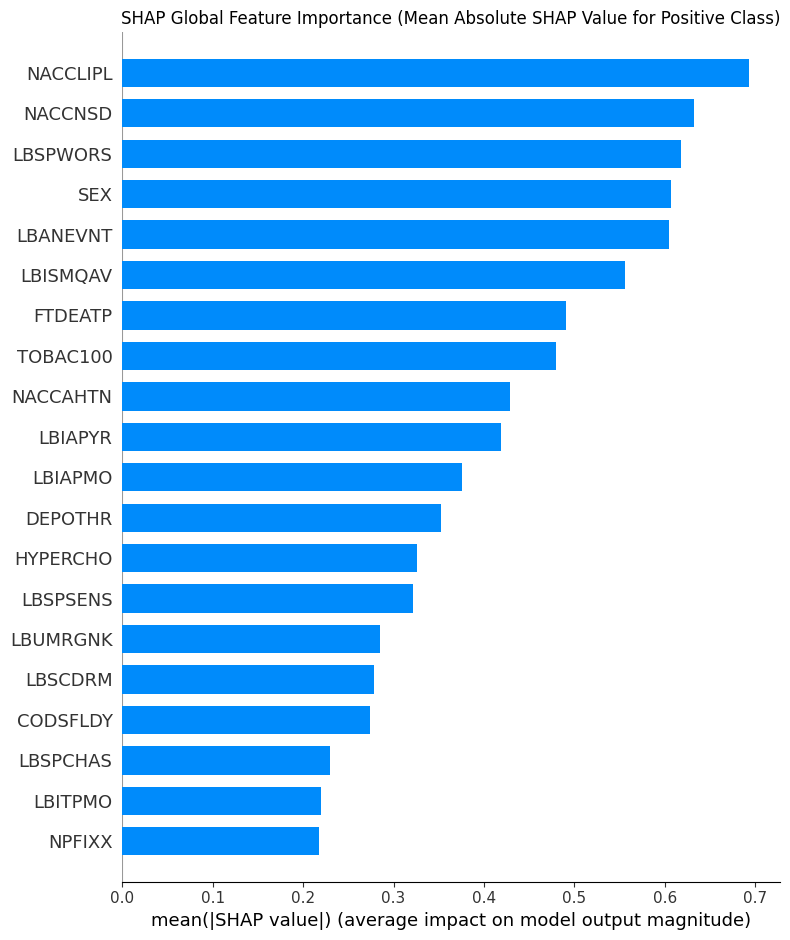


--- Visualizing SHAP Summary (Beeswarm Plot for Feature Impact & Direction) ---


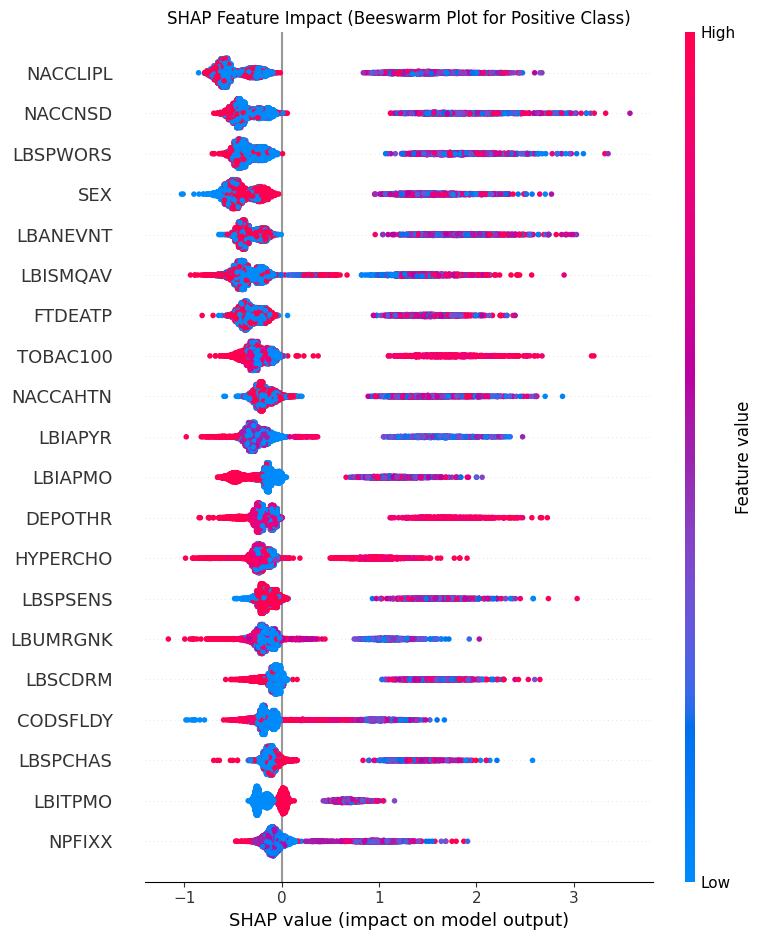


--- Visualizing SHAP Dependence Plots for Top Features ---


<Figure size 800x600 with 0 Axes>

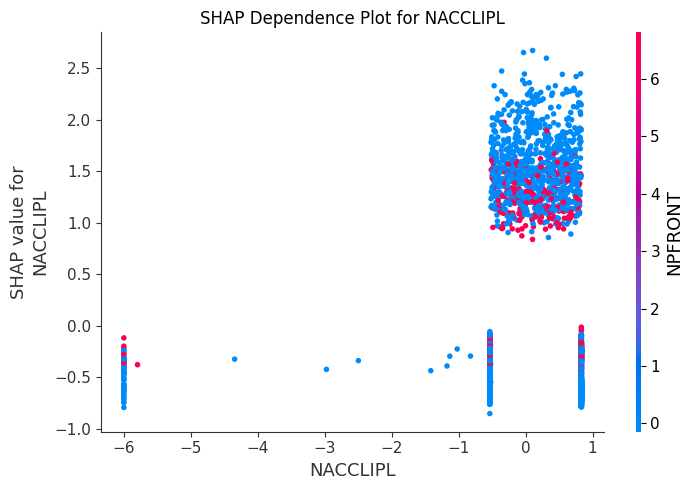

<Figure size 800x600 with 0 Axes>

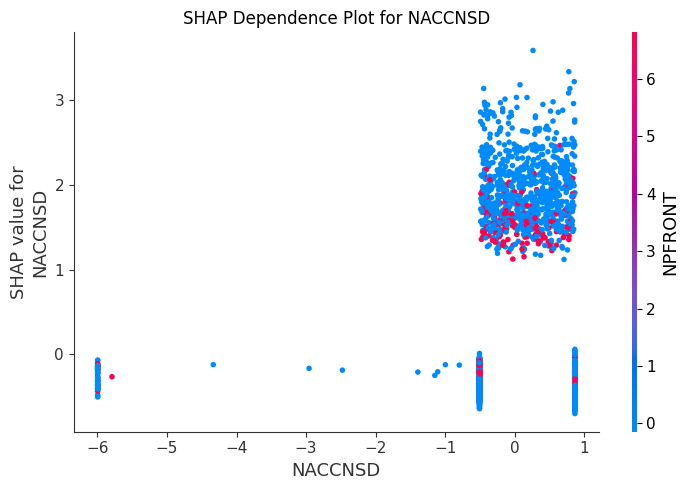

<Figure size 800x600 with 0 Axes>

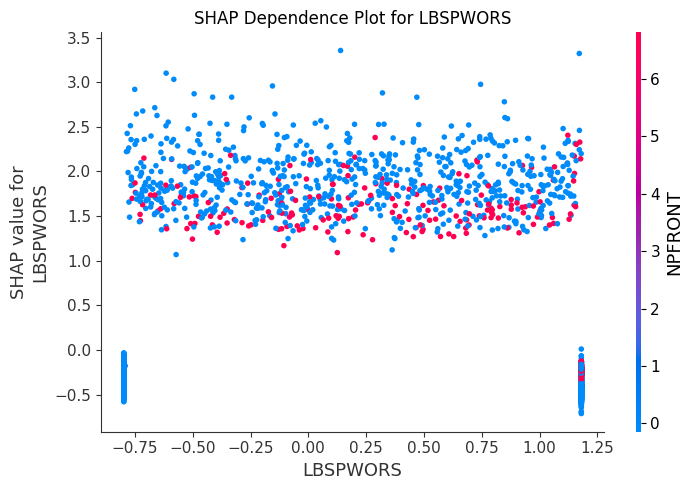

<Figure size 800x600 with 0 Axes>

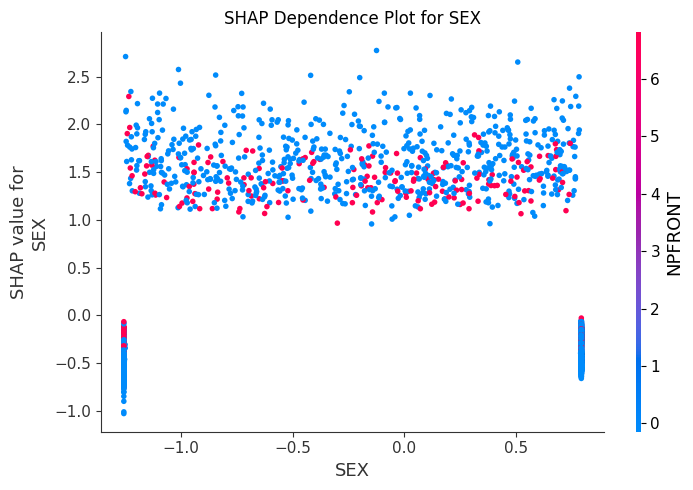

<Figure size 800x600 with 0 Axes>

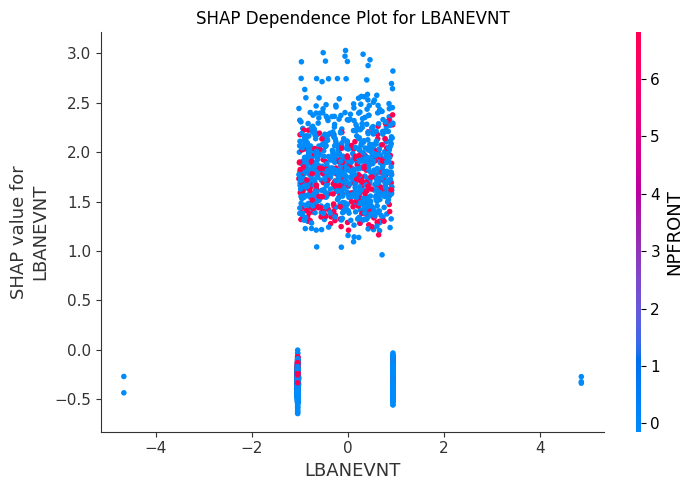


--- Consolidated Robust Feature Analysis (Stability + SHAP Importance) ---


KeyError: 'feature'

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import catboost as cb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, precision_score, recall_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel, RFE
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
import optuna
import shap
import joblib
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
import gc
from scipy import sparse

# Suppress specific warnings from libraries
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")
warnings.filterwarnings("ignore", category=UserWarning, module="catboost")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
warnings.filterwarnings("ignore", message="The `k_neighbors` parameter is deprecated and will be removed in a future version.", category=FutureWarning)


# --- Configuration ---
ALZHEIMERS_COL = 'NPPAD'
RANDOM_STATE = 42
N_OPTUNA_TRIALS = 3
N_SPLITS_OUTER = 3
N_SPLITS_INNER = 3

N_FEATURES_TO_SELECT_RFE = 30
RFE_STEP = 0.1
SMOTE_NEIGHBORS = 5 # Added a default value for SMOTE_NEIGHBORS

CHECKPOINT_DIR = '/content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/'
PREPROCESSED_DATA_DIR = '/content/drive/MyDrive/alzheimers_model_ultimate/preprocessed_data/'

# Ensure directories exist
os.makedirs(CHECKPOINT_DIR, exist_ok=True)
os.makedirs(PREPROCESSED_DATA_DIR, exist_ok=True)

# Helper function to find the latest checkpoint/data file for a specific prefix
def find_latest_file(directory, prefix):
    files = [os.path.join(directory, f) for f in os.listdir(directory) if f.startswith(prefix) and f.endswith(".joblib")]
    if not files:
        return None
    files.sort(key=os.path.getmtime, reverse=True) # Sort by modification time
    return files[0]

print("--- ULTIMATE ALZHEIMER'S DISEASE TRAINING PIPELINE ---")
print("Incorporating Nested Cross-Validation and Robust SHAP Analysis (with Checkpointing)")

# --- LOADING PREPROCESSED DATA ---
print("\n--- Loading preprocessed data ---")

latest_preprocessed_file = find_latest_file(PREPROCESSED_DATA_DIR, "preprocessed_data_")

if latest_preprocessed_file:
    print(f"Loading latest preprocessed data from: {latest_preprocessed_file}")
    loaded_data = joblib.load(latest_preprocessed_file)

    X_train_overall = loaded_data['X_train_processed_for_model']
    X_test_overall = loaded_data['X_test_processed_for_model']
    y_train_overall = loaded_data['alz_targets_train']
    y_test_overall = loaded_data['alz_targets_test']
    initial_selected_feature_names = loaded_data['initial_selected_feature_names']
    print(f"  Initial feature set loaded (excluding NACCADC): {len(initial_selected_feature_names)} features.")
else:
    raise FileNotFoundError(f"No preprocessed data found in {PREPROCESSED_DATA_DIR}. Please run the preprocessing script first and ensure it saves its output.")

print(f"  Overall X_train shape: {X_train_overall.shape}, y_train shape: {y_train_overall.shape}")
print(f"  Overall X_test shape: {X_test_overall.shape}, y_test shape: {y_test_overall.shape}")
print("  Class distribution (overall train): ", Counter(y_train_overall))


# --- NESTED CROSS-VALIDATION FOR HYPERPARAMETER TUNING & FEATURE SELECTION ---
print("\n--- Starting Nested Cross-Validation for Hyperparameter Tuning & Feature Selection ---")
print(f"Outer loop: {N_SPLITS_OUTER} folds. Inner loop: {N_SPLITS_INNER} folds with {N_OPTUNA_TRIALS} Optuna trials.")

outer_kf = StratifiedKFold(n_splits=N_SPLITS_OUTER, shuffle=True, random_state=RANDOM_STATE)

# To store results of outer folds
outer_loop_test_roc_aucs = []
outer_loop_test_auprcs = []
outer_loop_test_f1_scores = []
outer_loop_test_precision_scores = []
outer_loop_test_recall_scores = []

# To store best parameters and selected features from each outer fold's inner loop
best_params_per_fold = []
selected_features_per_fold = [] #
final_trained_models = [] # To store models for later ensembling or selection for SHAP

# --- Check for existing outer fold checkpoints and resume ---
resumed_from_fold = -1
for outer_fold_idx in range(N_SPLITS_OUTER):
    fold_checkpoint_prefix = f"outer_fold_model_metrics_{outer_fold_idx}_"
    latest_fold_checkpoint = find_latest_file(CHECKPOINT_DIR, fold_checkpoint_prefix)

    if latest_fold_checkpoint:
        print(f"Loading checkpoint for Outer Fold {outer_fold_idx + 1} from: {latest_fold_checkpoint}")
        fold_data = joblib.load(latest_fold_checkpoint)

        outer_loop_test_roc_aucs.append(fold_data['metrics']['roc_auc'])
        outer_loop_test_auprcs.append(fold_data['metrics']['auprc'])
        outer_loop_test_f1_scores.append(fold_data['metrics']['f1'])
        outer_loop_test_precision_scores.append(fold_data['metrics']['precision'])
        outer_loop_test_recall_scores.append(fold_data['metrics']['recall'])
        best_params_per_fold.append(fold_data['best_params'])
        selected_features_per_fold.append(fold_data['selected_features'])
        final_trained_models.append(fold_data['model']) # Re-add the trained model
        resumed_from_fold = outer_fold_idx
    else:
        break # No more saved folds, start from here

if resumed_from_fold >= 0:
    print(f"Resuming pipeline from Outer Fold {resumed_from_fold + 2}.")
    # Skip already processed folds when iterating
    outer_kf_split_gen = outer_kf.split(X_train_overall, y_train_overall)
    for _ in range(resumed_from_fold + 1): # Advance the generator
        next(outer_kf_split_gen)
else:
    print("No existing outer fold checkpoints found. Starting from scratch.")
    outer_kf_split_gen = outer_kf.split(X_train_overall, y_train_overall)


for outer_fold_idx, (train_idx, test_idx) in enumerate(outer_kf_split_gen):
    current_outer_fold_num = resumed_from_fold + 1 + outer_fold_idx # Adjust index for printing
    print(f"\n--- OUTER FOLD {current_outer_fold_num + 1}/{N_SPLITS_OUTER} ---")

    # Split data for the current outer fold using .iloc for both X and y
    X_outer_train, X_outer_test = X_train_overall.iloc[train_idx], X_train_overall.iloc[test_idx]
    y_outer_train, y_outer_test = y_train_overall.iloc[train_idx], y_train_overall.iloc[test_idx]

    print(f"  Outer train shape: {X_outer_train.shape}, Outer test shape: {X_outer_test.shape}")
    print(f"  Outer train class distribution: {Counter(y_outer_train)}")

    # --- Inner Cross-Validation for Hyperparameter Tuning and Feature Selection ---
    # This is where Optuna runs to find best params AND select features within each outer fold

    def objective_xgb(trial):
        # Parameters for XGBoost
        params = {
            'objective': 'binary:logistic',
            'eval_metric': 'logloss',
            'use_label_encoder': False,
            'seed': RANDOM_STATE,
            'n_estimators': trial.suggest_int('n_estimators', 100, 1500),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.15),
            'max_depth': trial.suggest_int('max_depth', 3, 9),
            'subsample': trial.suggest_uniform('subsample', 0.6, 0.95),
            'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.95),
            'gamma': trial.suggest_loguniform('gamma', 1e-8, 0.5),
            'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 50.0),
            'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 50.0),
            'scale_pos_weight': 1.0 # Fixed to 1.0 since SMOTE handles imbalance
        }

        inner_kf = StratifiedKFold(n_splits=N_SPLITS_INNER, shuffle=True, random_state=RANDOM_STATE + trial.number)
        oof_preds = np.zeros(X_outer_train.shape[0])

        for fold, (inner_train_idx, inner_val_idx) in enumerate(inner_kf.split(X_outer_train, y_outer_train)):
            X_inner_train_raw, X_inner_val_raw = X_outer_train.iloc[inner_train_idx], X_outer_train.iloc[inner_val_idx]
            # Use .iloc for inner loop splits on y_outer_train
            y_inner_train, y_inner_val = y_outer_train.iloc[inner_train_idx], y_outer_train.iloc[inner_val_idx]

            # --- Data Preprocessing & SMOTE within inner fold ---
            # Apply SMOTE *only* to the inner training set
            smote = SMOTE(
                sampling_strategy='minority', # Reverted to 'minority' for robustness
                k_neighbors=min(SMOTE_NEIGHBORS, max(1, Counter(y_inner_train).get(1, 0) - 1)),
                random_state=RANDOM_STATE
            )
            try:
                X_inner_train_resampled, y_inner_train_resampled = smote.fit_resample(X_inner_train_raw.to_numpy(), y_inner_train)
                X_inner_train_resampled = pd.DataFrame(X_inner_train_resampled, columns=X_inner_train_raw.columns)
            except ValueError as e:
                if "n_samples=" in str(e) or "k_neighbors" in str(e):
                    print(f"  Warning: SMOTE failed in inner fold {fold} for XGBoost trial {trial.number}. Using original inner train data.")
                    X_inner_train_resampled = X_inner_train_raw
                    y_inner_train_resampled = y_inner_train
                else:
                    raise e

            # --- Feature Selection within inner fold using RFE ---
            rfe_selector_model = RFE(
                estimator=BalancedRandomForestClassifier(n_estimators=50, random_state=RANDOM_STATE, n_jobs=1),
                n_features_to_select=min(N_FEATURES_TO_SELECT_RFE, X_inner_train_resampled.shape[1]),
                step=RFE_STEP,
                verbose=0
            )
            rfe_selector_model.fit(X_inner_train_resampled, y_inner_train_resampled)

            # Use raw NumPy arrays from RFE transform directly
            X_inner_train_selected = rfe_selector_model.transform(X_inner_train_resampled)
            X_inner_val_selected = rfe_selector_model.transform(X_inner_val_raw)

            model = xgb.XGBClassifier(**params)
            model.fit(X_inner_train_selected, y_inner_train_resampled)
            oof_preds[inner_val_idx] = model.predict_proba(X_inner_val_selected)[:, 1]

            # Clear memory
            del X_inner_train_selected, X_inner_val_selected
            gc.collect()

        auprc = average_precision_score(y_outer_train, oof_preds)
        return auprc

    def objective_cat(trial):
        # Parameters for CatBoost
        params = {
            'iterations': trial.suggest_int('iterations', 100, 1500),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.15),
            'depth': trial.suggest_int('depth', 3, 9),
            'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-2, 50.0), # Adjusted range
            'subsample': trial.suggest_uniform('subsample', 0.6, 0.95),
            'colsample_bylevel': trial.suggest_uniform('colsample_bylevel', 0.6, 0.95),
            'loss_function': 'Logloss',
            'eval_metric': 'AUC',
            'random_seed': RANDOM_STATE,
            'verbose': 0,
            'thread_count': 1
        }

        inner_kf = StratifiedKFold(n_splits=N_SPLITS_INNER, shuffle=True, random_state=RANDOM_STATE + trial.number)
        oof_preds = np.zeros(X_outer_train.shape[0])

        for fold, (inner_train_idx, inner_val_idx) in enumerate(inner_kf.split(X_outer_train, y_outer_train)):
            X_inner_train_raw, X_inner_val_raw = X_outer_train.iloc[inner_train_idx], X_outer_train.iloc[inner_val_idx]
            # Use .iloc for inner loop splits on y_outer_train
            y_inner_train, y_inner_val = y_outer_train.iloc[inner_train_idx], y_outer_train.iloc[inner_val_idx]

            # --- Data Preprocessing & SMOTE within inner fold ---
            smote = SMOTE(
                sampling_strategy='minority', # Reverted to 'minority' for robustness
                k_neighbors=min(SMOTE_NEIGHBORS, max(1, Counter(y_inner_train).get(1, 0) - 1)),
                random_state=RANDOM_STATE
            )
            try:
                X_inner_train_resampled, y_inner_train_resampled = smote.fit_resample(X_inner_train_raw.to_numpy(), y_inner_train)
                X_inner_train_resampled = pd.DataFrame(X_inner_train_resampled, columns=X_inner_train_raw.columns)
            except ValueError as e:
                if "n_samples=" in str(e) or "k_neighbors" in str(e):
                    print(f"  Warning: SMOTE failed in inner fold {fold} for CatBoost trial {trial.number}. Using original inner train data.")
                    X_inner_train_resampled = X_inner_train_raw
                    y_inner_train_resampled = y_inner_train
                else:
                    raise e

            # --- Feature Selection within inner fold using RFE ---
            rfe_selector_model = RFE(
                estimator=BalancedRandomForestClassifier(n_estimators=50, random_state=RANDOM_STATE, n_jobs=1),
                n_features_to_select=min(N_FEATURES_TO_SELECT_RFE, X_inner_train_resampled.shape[1]),
                step=RFE_STEP,
                verbose=0
            )
            rfe_selector_model.fit(X_inner_train_resampled, y_inner_train_resampled)

            # Use raw NumPy arrays from RFE transform directly
            X_inner_train_selected = rfe_selector_model.transform(X_inner_train_resampled)
            X_inner_val_selected = rfe_selector_model.transform(X_inner_val_raw)

            try:
                model = cb.CatBoostClassifier(**params)
                model.fit(X_inner_train_selected, y_inner_train_resampled)
                oof_preds[inner_val_idx] = model.predict_proba(X_inner_val_selected)[:, 1]
            except cb.CatBoostError as e:
                print(f"  CatBoostError in trial {trial.number}, fold {fold}: {e}. Pruning trial.")
                raise optuna.exceptions.TrialPruned()

            # Clear memory
            del X_inner_train_selected, X_inner_val_selected
            gc.collect()

        auprc = average_precision_score(y_outer_train, oof_preds)
        return auprc

    # --- Check/Run Optuna for XGBoost ---
    xgb_optuna_prefix = f"best_xgb_params_outer_fold_{current_outer_fold_num}_"
    latest_xgb_optuna_params = find_latest_file(CHECKPOINT_DIR, xgb_optuna_prefix)
    if latest_xgb_optuna_params:
        best_xgb_params = joblib.load(latest_xgb_optuna_params)
        print(f"  Loaded best XGBoost params for Outer Fold {current_outer_fold_num + 1} from checkpoint.")
    else:
        print(f"  Running Optuna for XGBoost (Outer Fold {current_outer_fold_num + 1})...")
        study_xgb = optuna.create_study(direction='maximize',
                                        sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE + current_outer_fold_num))
        study_xgb.optimize(objective_xgb, n_trials=N_OPTUNA_TRIALS, show_progress_bar=False)
        best_xgb_params = study_xgb.best_params
        print(f"  Best XGBoost params for Outer Fold {current_outer_fold_num + 1}: {best_xgb_params}")
        # Save after completion
        joblib.dump(best_xgb_params, os.path.join(CHECKPOINT_DIR, f"{xgb_optuna_prefix}{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.joblib"))

    # --- Check/Run Optuna for CatBoost ---
    cat_optuna_prefix = f"best_cat_params_outer_fold_{current_outer_fold_num}_"
    latest_cat_optuna_params = find_latest_file(CHECKPOINT_DIR, cat_optuna_prefix)
    if latest_cat_optuna_params:
        best_cat_params = joblib.load(latest_cat_optuna_params)
        print(f"  Loaded best CatBoost params for Outer Fold {current_outer_fold_num + 1} from checkpoint.")
    else:
        print(f"  Running Optuna for CatBoost (Outer Fold {current_outer_fold_num + 1})...")
        study_cat = optuna.create_study(direction='maximize',
                                        sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE + current_outer_fold_num + 100))
        study_cat.optimize(objective_cat, n_trials=N_OPTUNA_TRIALS, show_progress_bar=False)
        best_cat_params = study_cat.best_params
        print(f"  Best CatBoost params for Outer Fold {current_outer_fold_num + 1}: {best_cat_params}")
        # Save after completion
        joblib.dump(best_cat_params, os.path.join(CHECKPOINT_DIR, f"{cat_optuna_prefix}{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.joblib"))

    best_params_per_fold.append({'xgb': best_xgb_params, 'cat': best_cat_params})

    # --- Train Final Model for this Outer Fold with Best Parameters & Selected Features ---
    print(f"  Training final models for Outer Fold {current_outer_fold_num + 1} with best found parameters...")

    # Re-apply SMOTE to the full X_outer_train with its corresponding y
    smote_final = SMOTE(
        sampling_strategy='minority', # Reverted to 'minority' for robustness
        k_neighbors=min(SMOTE_NEIGHBORS, max(1, Counter(y_outer_train).get(1, 0) - 1)),
        random_state=RANDOM_STATE
    )
    try:
        X_outer_train_resampled, y_outer_train_resampled = smote_final.fit_resample(X_outer_train.to_numpy(), y_outer_train)
        X_outer_train_resampled = pd.DataFrame(X_outer_train_resampled, columns=X_outer_train.columns)
    except ValueError as e:
        if "n_samples=" in str(e) or "k_neighbors" in str(e):
            print(f"  Warning: SMOTE failed for final training in outer fold {current_outer_fold_num + 1}. Using original outer train data.")
            X_outer_train_resampled = X_outer_train
            y_outer_train_resampled = y_outer_train
        else:
            raise e

    # Fit RFE feature selector on the resampled X_outer_train for this fold's model
    rfe_selector_final_fold = RFE(
        estimator=BalancedRandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1),
        n_features_to_select=min(N_FEATURES_TO_SELECT_RFE, X_outer_train_resampled.shape[1]),
        step=RFE_STEP,
        verbose=0
    )
    rfe_selector_final_fold.fit(X_outer_train_resampled, y_outer_train_resampled)

    X_outer_train_selected_final_np = rfe_selector_final_fold.transform(X_outer_train_resampled)
    X_outer_test_selected_final_np = rfe_selector_final_fold.transform(X_outer_test.to_numpy())

    # Get the names of the selected features for this fold
    current_selected_feature_names_fold = X_outer_train.columns[rfe_selector_final_fold.get_support()].tolist()
    selected_features_per_fold.append(current_selected_feature_names_fold)
    print(f"  Features selected for this fold: {len(current_selected_feature_names_fold)}")

    # Use NumPy arrays directly for StackingClassifier training/prediction
    X_outer_train_selected_final = X_outer_train_selected_final_np
    X_outer_test_selected_final = X_outer_test_selected_final_np


    # Initialize base models with best parameters from Optuna
    estimators = [
        ('xgb', xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss',
                                  use_label_encoder=False, random_state=RANDOM_STATE, **best_xgb_params)),
        ('cat', cb.CatBoostClassifier(loss_function='Logloss', eval_metric='AUC', random_seed=RANDOM_STATE,
                                      verbose=0, thread_count=-1, **best_cat_params))
    ]
    meta_learner = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE)

    stacking_classifier_fold = StackingClassifier(
        estimators=estimators,
        final_estimator=meta_learner,
        cv=N_SPLITS_INNER,
        stack_method='predict_proba',
        n_jobs=-1,
        passthrough=False
    )
    stacking_classifier_fold.fit(X_outer_train_selected_final, y_outer_train_resampled)
    final_trained_models.append(stacking_classifier_fold)

    y_pred_proba_fold = stacking_classifier_fold.predict_proba(X_outer_test_selected_final)[:, 1]
    y_pred_class_fold = stacking_classifier_fold.predict(X_outer_test_selected_final)

    roc_auc_fold = roc_auc_score(y_outer_test, y_pred_proba_fold)
    auprc_fold = average_precision_score(y_outer_test, y_pred_proba_fold)
    f1_fold = f1_score(y_outer_test, y_pred_class_fold)
    precision_fold = precision_score(y_outer_test, y_pred_class_fold)
    recall_fold = recall_score(y_outer_test, y_pred_class_fold)

    outer_loop_test_roc_aucs.append(roc_auc_fold)
    outer_loop_test_auprcs.append(auprc_fold)
    outer_loop_test_f1_scores.append(f1_fold)
    outer_loop_test_precision_scores.append(precision_fold)
    outer_loop_test_recall_scores.append(recall_fold)

    print(f"  Outer Fold {current_outer_fold_num + 1} Test Metrics:")
    print(f"    ROC AUC: {roc_auc_fold:.4f}")
    print(f"    AUPRC: {auprc_fold:.4f}")
    print(f"    F1 Score: {f1_fold:.4f}")
    print(f"    Precision: {precision_fold:.4f}")
    print(f"    Recall: {recall_fold:.4f}")

    # --- Save Outer Fold Checkpoint ---
    fold_checkpoint_data = {
        'model': stacking_classifier_fold,
        'selected_features': current_selected_feature_names_fold,
        'best_params': {'xgb': best_xgb_params, 'cat': best_cat_params},
        'metrics': {
            'roc_auc': roc_auc_fold, 'auprc': auprc_fold, 'f1': f1_fold,
            'precision': precision_fold, 'recall': recall_fold
        }
    }
    joblib.dump(fold_checkpoint_data, os.path.join(CHECKPOINT_DIR, f"outer_fold_model_metrics_{current_outer_fold_num}_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.joblib"))
    print(f"  Outer Fold {current_outer_fold_num + 1} checkpoint saved.")


# --- Aggregate Results from Nested Cross-Validation ---
print("\n--- Nested Cross-Validation Final Results ---")
print(f"Average ROC AUC: {np.mean(outer_loop_test_roc_aucs):.4f} +/- {np.std(outer_loop_test_roc_aucs):.4f}")
print(f"Average AUPRC: {np.mean(outer_loop_test_auprcs):.4f} +/- {np.std(outer_loop_test_auprcs):.4f}")
print(f"Average F1 Score: {np.mean(outer_loop_test_f1_scores):.4f} +/- {np.std(outer_loop_test_f1_scores):.4f}")
print(f"Average Precision: {np.mean(outer_loop_test_precision_scores):.4f} +/- {np.std(outer_loop_test_precision_scores):.4f}")
print(f"Average Recall: {np.mean(outer_loop_test_recall_scores):.4f} +/- {np.std(outer_loop_test_recall_scores):.4f}")


# --- Feature Consistency Analysis Across Outer Folds ---
print("\n--- Feature Consistency Analysis Across Outer Folds ---")
feature_selection_counts = Counter()
for fold_features in selected_features_per_fold:
    feature_selection_counts.update(fold_features)

feature_consistency_df = pd.DataFrame(feature_selection_counts.items(), columns=['feature', 'selection_count'])
feature_consistency_df['selection_freq'] = feature_consistency_df['selection_count'] / N_SPLITS_OUTER
feature_consistency_df = feature_consistency_df.sort_values(by='selection_freq', ascending=False).reset_index(drop=True)

print("Feature Selection Frequency Across Outer Folds:")
print(feature_consistency_df.head(15))

def plot_feature_consistency(df, top_n=20, title="Feature Selection Consistency Across Outer Folds"):
    plt.figure(figsize=(12, 7))
    sns.barplot(x='selection_freq', y='feature', data=df.head(top_n), palette='viridis')
    plt.title(title)
    plt.xlabel('Selection Frequency (proportion of folds)')
    plt.ylabel('Feature Name')
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(CHECKPOINT_DIR, 'feature_consistency_plot.png'))
    plt.show()
    plt.close()

if not feature_consistency_df.empty:
    plot_feature_consistency(feature_consistency_df, top_n=min(20, len(feature_consistency_df)))
else:
    print("No features were consistently selected to plot consistency.")


# --- Final Model Training on Entire Dataset & SHAP Calculation ---
print("\n--- Training Final Model on Entire Training Dataset for Deployment & SHAP Analysis ---")

# Determine if the final model needs to be trained or can be loaded
final_model_prefix = "stacking_classifier_final_model_"
latest_final_model_checkpoint = find_latest_file(CHECKPOINT_DIR, final_model_prefix)

if latest_final_model_checkpoint:
    final_model_info = joblib.load(latest_final_model_checkpoint)
    final_stacking_classifier = final_model_info['model']
    final_model_feature_names = final_model_info['feature_names']
    X_test_selected_final_model = final_model_info['X_test_processed_final']
    print(f"Loaded final trained Stacking Classifier model from: {latest_final_model_checkpoint}")
else:
    # Choose the best overall parameters (e.g., from the fold with highest AUPRC, or simply average/median best params)
    best_outer_fold_idx = np.argmax(outer_loop_test_auprcs)
    final_best_xgb_params = best_params_per_fold[best_outer_fold_idx]['xgb']
    final_best_cat_params = best_params_per_fold[best_outer_fold_idx]['cat']
    print(f"Using parameters from Outer Fold {best_outer_fold_idx + 1} for final model training.")
    print(f"  Final XGBoost params: {final_best_xgb_params}")
    print(f"  Final CatBoost params: {final_best_cat_params}")

    # Retrain SMOTE on the full X_train_overall
    smote_final_model_train = SMOTE(
        sampling_strategy='minority', # Reverted to 'minority' for robustness
        k_neighbors=min(SMOTE_NEIGHBORS, max(1, Counter(y_train_overall).get(1, 0) - 1)),
        random_state=RANDOM_STATE
    )
    try:
        X_train_resampled_final, y_train_resampled_final = smote_final_model_train.fit_resample(X_train_overall.to_numpy(), y_train_overall)
        X_train_resampled_final = pd.DataFrame(X_train_resampled_final, columns=X_train_overall.columns)
    except ValueError as e:
        if "n_samples=" in str(e) or "k_neighbors" in str(e):
            print(f"  Warning: SMOTE failed for final full training. Using original training data.")
            X_train_resampled_final = X_train_overall
            y_train_resampled_final = y_train_overall
        else:
            raise e

    # Fit RFE feature selector on the full resampled training data
    rfe_selector_final_model = RFE(
        estimator=BalancedRandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1),
        n_features_to_select=min(N_FEATURES_TO_SELECT_RFE, X_train_resampled_final.shape[1]),
        step=RFE_STEP,
        verbose=0
    )
    rfe_selector_final_model.fit(X_train_resampled_final, y_train_resampled_final)

    X_train_selected_final_model_np = rfe_selector_final_model.transform(X_train_resampled_final)
    X_test_selected_final_model_np = rfe_selector_final_model.transform(X_test_overall.to_numpy())

    final_model_feature_names = X_train_overall.columns[rfe_selector_final_model.get_support()].tolist()
    print(f"  Final model trained with {len(final_model_feature_names)} features.")

    # Use NumPy arrays directly for StackingClassifier training/prediction
    X_train_selected_final_model = X_train_selected_final_model_np
    X_test_selected_final_model = X_test_selected_final_model_np


    final_estimators = [
        ('xgb', xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss',
                                  use_label_encoder=False, random_state=RANDOM_STATE, **final_best_xgb_params)),
        ('cat', cb.CatBoostClassifier(loss_function='Logloss', eval_metric='AUC', random_seed=RANDOM_STATE,
                                      verbose=0, thread_count=-1, **final_best_cat_params))
    ]
    final_meta_learner = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE)

    final_stacking_classifier = StackingClassifier(
        estimators=final_estimators,
        final_estimator=final_meta_learner,
        cv=N_SPLITS_INNER,
        stack_method='predict_proba',
        n_jobs=-1,
        passthrough=False
    )

    final_stacking_classifier.fit(X_train_selected_final_model, y_train_resampled_final)

    # Save the final trained Stacking Classifier model
    final_model_save_path = os.path.join(CHECKPOINT_DIR, f"{final_model_prefix}{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.joblib")
    joblib.dump({
        'model': final_stacking_classifier,
        'feature_names': final_model_feature_names,
        'X_test_processed_final': X_test_selected_final_model # Keep as NumPy array here
    }, final_model_save_path)
    print(f"Final trained Stacking Classifier model and features saved to: {final_model_save_path}")


# --- SHAP-BASED FEATURE INTERPRETATION ---
print("\n--- SHAP-BASED FEATURE INTERPRETATION (Publishable Way) ---")

# Determine if SHAP results need to be computed or can be loaded
shap_results_prefix = "shap_results_"
latest_shap_results_checkpoint = find_latest_file(CHECKPOINT_DIR, shap_results_prefix)

if latest_shap_results_checkpoint:
    shap_data = joblib.load(latest_shap_results_checkpoint)
    shap_values_obj = shap_data['shap_values_obj']
    X_shap_subset = shap_data['X_shap_subset']
    print(f"Loaded SHAP results from: {latest_shap_results_checkpoint}")
else:
    # Ensure X_train_selected_final_model_np is converted to DataFrame for SHAP, if it's currently a NumPy array
    if not isinstance(X_train_selected_final_model, pd.DataFrame):
        X_train_selected_final_model_df = pd.DataFrame(X_train_selected_final_model, columns=final_model_feature_names)
    else:
        X_train_selected_final_model_df = X_train_selected_final_model


    num_background_samples = min(500, X_train_selected_final_model_df.shape[0])
    background_data_for_explainer = X_train_selected_final_model_df.sample(num_background_samples, random_state=RANDOM_STATE)

    num_shap_samples = min(5000, X_train_selected_final_model_df.shape[0])
    X_shap_subset = X_train_selected_final_model_df.sample(num_shap_samples, random_state=RANDOM_STATE)

    print(f"  Calculating SHAP values on {num_shap_samples} samples (background: {num_background_samples})...")

    xgb_model_for_shap = final_stacking_classifier.named_estimators_['xgb']
    explainer = shap.TreeExplainer(xgb_model_for_shap, X_shap_subset)

    shap_values_obj = explainer(X_shap_subset)

    # Save SHAP results after computation
    shap_save_path = os.path.join(CHECKPOINT_DIR, f"{shap_results_prefix}{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.joblib")
    joblib.dump({
        'shap_values_obj': shap_values_obj,
        'X_shap_subset': X_shap_subset
    }, shap_save_path)
    print(f"SHAP results saved to: {shap_save_path}")


# Extract SHAP values for the positive class (class 1)
if shap_values_obj.values.ndim == 3:
    shap_values_for_positive_class = shap_values_obj.values[:, :, 1]
else:
    shap_values_for_positive_class = shap_values_obj.values


print(f"  Shape of SHAP values for positive class: {shap_values_for_positive_class.shape}")

# --- SHAP Global Feature Importance (Bar Plot) ---
print("\n--- Visualizing SHAP Global Feature Importance (Mean Absolute SHAP Value) ---")
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_for_positive_class, X_shap_subset, plot_type="bar", show=False, feature_names=final_model_feature_names)
plt.title("SHAP Global Feature Importance (Mean Absolute SHAP Value for Positive Class)")
plt.tight_layout()
plt.savefig(os.path.join(CHECKPOINT_DIR, 'shap_global_feature_importance_bar.png'))
plt.show()
plt.close()


# --- SHAP Summary Plot (Beeswarm Plot for detailed view) ---
print("\n--- Visualizing SHAP Summary (Beeswarm Plot for Feature Impact & Direction) ---")
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_for_positive_class, X_shap_subset, show=False, feature_names=final_model_feature_names)
plt.title("SHAP Feature Impact (Beeswarm Plot for Positive Class)")
plt.tight_layout()
plt.savefig(os.path.join(CHECKPOINT_DIR, 'shap_beeswarm_plot.png'))
plt.show()
plt.close()


# --- SHAP Dependence Plots (showing feature interactions) ---
print("\n--- Visualizing SHAP Dependence Plots for Top Features ---")
top_n_features_for_dep = 5
global_shap_importance_series = pd.Series(np.abs(shap_values_for_positive_class).mean(axis=0), index=final_model_feature_names).sort_values(ascending=False)
top_features_for_dependence_plot = global_shap_importance_series.head(top_n_features_for_dep).index.tolist()

for feature in top_features_for_dependence_plot:
    try:
        feature_idx = final_model_feature_names.index(feature)
        plt.figure(figsize=(8, 6))
        shap.dependence_plot(
            ind=feature,
            shap_values=shap_values_obj.values,
            features=X_shap_subset,
            feature_names=final_model_feature_names,
            interaction_index="auto",
            show=False
        )
        plt.title(f"SHAP Dependence Plot for {feature}")
        plt.tight_layout()
        plt.savefig(os.path.join(CHECKPOINT_DIR, f'shap_dependence_plot_{feature}.png'))
        plt.show()
        plt.close()
    except Exception as e:
        print(f"  Error generating dependence plot for {feature}: {e}")


# --- Feature Importance Consolidation (Stability + SHAP) ---
print("\n--- Consolidated Robust Feature Analysis (Stability + SHAP Importance) ---")
if not feature_consistency_df.empty:
    shap_importance_df = pd.Series(np.abs(shap_values_for_positive_class).mean(axis=0), index=final_model_feature_names).rename("mean_abs_shap_importance").to_frame()

    all_initial_features_df = pd.DataFrame({'feature': initial_selected_feature_names})
    all_initial_features_df = all_initial_features_df.merge(feature_consistency_df[['feature', 'selection_freq']], on='feature', how='left').fillna(0)
    all_initial_features_df = all_initial_features_df.merge(shap_importance_df, on='feature', how='left').fillna(0)

    MIN_SELECTION_FREQ = 0.7
    MIN_SHAP_IMPORTANCE = 0.01

    robust_features_df = all_initial_features_df[
        (all_initial_features_df['selection_freq'] >= MIN_SELECTION_FREQ) &
        (all_initial_features_df['mean_abs_shap_importance'] >= MIN_SHAP_IMPORTANCE)
    ].sort_values(by='mean_abs_shap_importance', ascending=False).reset_index(drop=True)

    print(f"\nIdentified {len(robust_features_df)} Robust Features (selected >= {MIN_SELECTION_FREQ*100:.0f}% of folds AND Mean Abs SHAP >= {MIN_SHAP_IMPORTANCE}):")
    print(robust_features_df)

    if not robust_features_df.empty:
        plt.figure(figsize=(12, max(6, len(robust_features_df)*0.5)))
        sns.barplot(x='mean_abs_shap_importance', y='feature', data=robust_features_df, palette='magma')
        plt.title('Robust Features (Consistent Selection & High SHAP Importance)')
        plt.xlabel('Mean Absolute SHAP Importance')
        plt.ylabel('Feature Name')
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig(os.path.join(CHECKPOINT_DIR, 'robust_features_plot.png'))
        plt.show()
        plt.close()
    else:
        print("No robust features found matching the specified criteria.")

else:
    print("Feature consistency DataFrame is empty. Cannot perform robust feature analysis.")

print("\n--- PIPELINE COMPLETE ---")


In [ ]:
import pandas as pd
import numpy as np
import joblib
import os
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score
from collections import Counter
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

print("--- Post-Training Model Evaluation ---")
print("Calculating Balanced Accuracy, Per-Class F1, and Macro AUROC from saved model.")

# --- Configuration ---
CHECKPOINT_DIR = '/content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/'
PREPROCESSED_DATA_DIR = '/content/drive/MyDrive/alzheimers_model_ultimate/preprocessed_data/'

# Helper function to find the latest checkpoint/data file
def find_latest_file(directory, prefix):
    files = [os.path.join(directory, f) for f in os.listdir(directory) if f.startswith(prefix) and f.endswith(".joblib")]
    if not files:
        return None
    files.sort(key=os.path.getmtime, reverse=True)
    return files[0]

# --- LOAD NECESSARY ARTIFACTS ---
print("\n--- Loading saved model and test data for evaluation ---")

# 1. Load the latest preprocessed data (contains original y_test_overall)
latest_preprocessed_file = find_latest_file(PREPROCESSED_DATA_DIR, "preprocessed_data_")
if latest_preprocessed_file:
    try:
        loaded_data = joblib.load(latest_preprocessed_file)
        y_test_overall = loaded_data['alz_targets_test'] # Raw targets for the whole test set
        print(f"Successfully loaded raw test targets from: {latest_preprocessed_file}")
    except Exception as e:
        print(f"Error loading raw test targets from preprocessed data: {e}")
        exit("Failed to load raw test targets. Exiting evaluation.")
else:
    exit("No preprocessed data file found. Exiting evaluation.")


# 2. Load the final trained model and the *already feature-selected* test data it expects for prediction
latest_final_model_checkpoint = find_latest_file(CHECKPOINT_DIR, "stacking_classifier_final_model_")
final_stacking_classifier = None
X_test_for_prediction_np = None # This will be the NumPy array directly usable by the model

if latest_final_model_checkpoint:
    try:
        final_model_info = joblib.load(latest_final_model_checkpoint)
        final_stacking_classifier = final_model_info['model']
        # X_test_processed_final is already transformed and ready for model prediction (NumPy array)
        X_test_for_prediction_np = final_model_info['X_test_processed_final']
        print(f"Successfully loaded final trained model and its prepared test data from: {latest_final_model_checkpoint}")
    except Exception as e:
        print(f"Error loading final trained model or its prepared test data: {e}. Cannot proceed with evaluation.")
else:
    print("No final trained model checkpoint found. Cannot proceed with evaluation.")

if final_stacking_classifier is None or X_test_for_prediction_np is None:
    exit("Trained model or its prepared test data not found or could not be loaded. Exiting evaluation.")



if len(y_test_overall) != len(X_test_for_prediction_np):
    print("Warning: Length mismatch between y_test_overall and X_test_for_prediction_np. Attempting re-alignment based on original indices...")

    if isinstance(y_test_overall, pd.Series) and isinstance(X_test_for_prediction_np, np.ndarray):

        y_test_aligned = y_test_overall.loc[y_test_overall.index.intersection(loaded_data['X_test_processed_for_model'].index)]
    else: # Fallback for plain arrays or if origin is unclear
        y_test_aligned = y_test_overall # Assume direct alignment
else:
    y_test_aligned = y_test_overall

# Ensure no NaNs in true labels for metric calculation
y_test_cleaned = y_test_aligned.dropna()
# Filter predictions to match cleaned true labels
y_pred_proba_full = final_stacking_classifier.predict_proba(X_test_for_prediction_np)[:, 1]
y_pred_class_full = final_stacking_classifier.predict(X_test_for_prediction_np)

# Ensure predictions align with cleaned y_test if cleaning occurred
if len(y_test_cleaned) != len(y_test_overall):

    non_nan_mask = ~y_test_overall.isna().to_numpy()
    y_pred_proba_cleaned = y_pred_proba_full[non_nan_mask]
    y_pred_class_cleaned = y_pred_class_full[non_nan_mask]
else:
    y_pred_proba_cleaned = y_pred_proba_full
    y_pred_class_cleaned = y_pred_class_full


# --- Calculate and Report Metrics ---
print("\n--- Model Performance Metrics (Overall Test Set) ---")

# 1. Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test_cleaned, y_pred_class_cleaned)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

# 2. Per-Class F1 Score

unique_classes = np.unique(y_test_cleaned)
f1_per_class = f1_score(y_test_cleaned, y_pred_class_cleaned, labels=unique_classes, average=None)

for i, class_label in enumerate(unique_classes):
    print(f"F1 Score (Class {class_label}): {f1_per_class[i]:.4f}")

# 3. Macro AUROC
# Check if both classes are present for AUROC calculation
if pd.Series(y_test_cleaned).nunique() > 1:
    macro_auroc = roc_auc_score(y_test_cleaned, y_pred_proba_cleaned, average='macro')
    print(f"Macro AUROC: {macro_auroc:.4f}")
else:
    print("Macro AUROC cannot be calculated: Not enough unique classes in the test set.")

print("\n--- Evaluation Complete ---")


--- Post-Training Model Evaluation ---
Calculating Balanced Accuracy, Per-Class F1, and Macro AUROC from saved model.

--- Loading saved model and test data for evaluation ---
Successfully loaded raw test targets from: /content/drive/MyDrive/alzheimers_model_ultimate/preprocessed_data/preprocessed_data_20250625_181648.joblib
Successfully loaded final trained model and its prepared test data from: /content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/stacking_classifier_final_model_20250625_030024.joblib

--- Model Performance Metrics (Overall Test Set) ---
Balanced Accuracy: 0.5848
F1 Score (Class 0): 0.9862
F1 Score (Class 1): 0.2774
Macro AUROC: 0.6006

--- Evaluation Complete ---


## ***SHAP ANALYSIS***

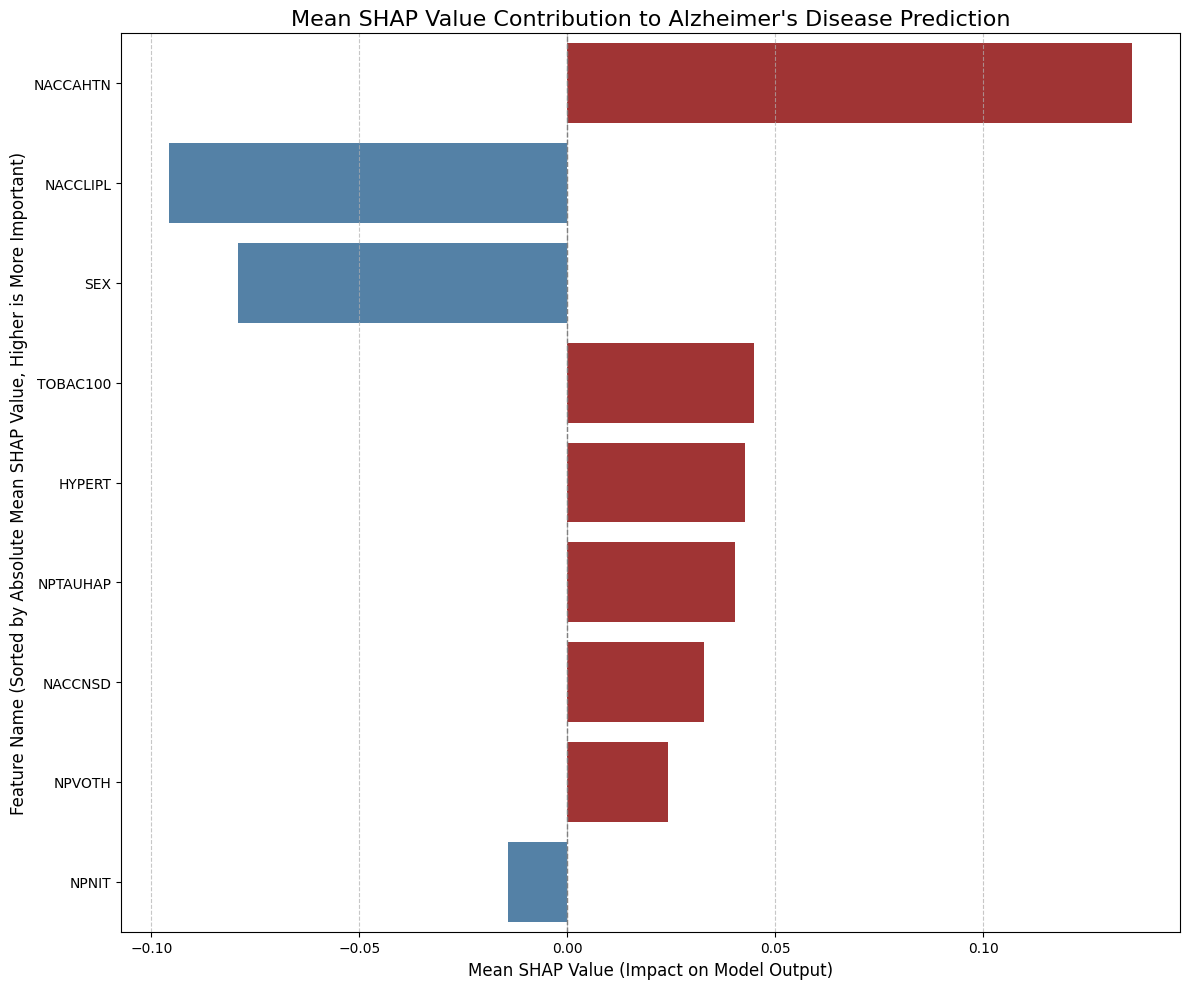

In [ ]:
import pandas as pd
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# --- Configuration (ensure these match your main pipeline settings) ---
CHECKPOINT_DIR = '/content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/'

# Helper function to find the latest checkpoint/data file for a specific prefix
def find_latest_file(directory, prefix):
    files = [os.path.join(directory, f) for f in os.listdir(directory) if f.startswith(prefix) and f.endswith(".joblib")]
    if not files:
        return None
    files.sort(key=os.path.getmtime, reverse=True) # Sort by modification time
    return files[0]


# --- Load SHAP results from checkpoint ---
shap_results_prefix = "shap_results_"
latest_shap_results_checkpoint = find_latest_file(CHECKPOINT_DIR, shap_results_prefix)

shap_values_obj = None
X_shap_subset = None

if latest_shap_results_checkpoint:
    try:
        shap_data = joblib.load(latest_shap_results_checkpoint)
        shap_values_obj = shap_data['shap_values_obj']
        X_shap_subset = shap_data['X_shap_subset']
    except Exception as e:
        pass # Suppress error message, will handle with if/else below
else:
    pass # Suppress error message

if shap_values_obj is not None and X_shap_subset is not None:
    # Extract SHAP values for the positive class (class 1)
    if shap_values_obj.values.ndim == 3:
        shap_values_for_positive_class = shap_values_obj.values[:, :, 1]
    else:
        shap_values_for_positive_class = shap_values_obj.values

    # Get feature names from the X_shap_subset DataFrame
    feature_names = X_shap_subset.columns.tolist()



    for feature in feature_names:
        if feature.startswith('LB') or feature.startswith('FTD'):
            features_to_remove_pattern.append(feature)

    all_features_to_remove = list(set(features_to_remove_explicit + features_to_remove_pattern))

    feature_name_to_idx = {name: i for i, name in enumerate(feature_names)}

    indices_to_remove = sorted([feature_name_to_idx[f] for f in all_features_to_remove if f in feature_name_to_idx], reverse=True)

    removed_count = 0
    for idx in indices_to_remove:
        feature_name = feature_names[idx]

        shap_values_for_positive_class = np.delete(shap_values_for_positive_class, idx, axis=1)

        X_shap_subset = X_shap_subset.drop(columns=[feature_name])

        feature_names.pop(idx)
        removed_count += 1


    # --- Calculate Mean SHAP Values for Directional Plotting ---
    shap_values_df = pd.DataFrame(shap_values_for_positive_class, columns=feature_names)

    mean_shap_values = shap_values_df.mean().sort_values(key=abs, ascending=False)

    max_display_features = 9
    mean_shap_values = mean_shap_values.head(max_display_features)

    # --- Create the Directional Bar Plot ---
    plt.figure(figsize=(12, 10))

    colors = ['firebrick' if val > 0 else 'steelblue' for val in mean_shap_values.values]

    sns.barplot(x=mean_shap_values.values, y=mean_shap_values.index, palette=colors, dodge=False)

    # --- Updated Title and Labels for Publishable Quality ---
    plt.title("Mean SHAP Value Contribution to Alzheimer's Disease Prediction", fontsize=16)
    plt.xlabel("Mean SHAP Value (Impact on Model Output)", fontsize=12)
    plt.ylabel("Feature Name (Sorted by Absolute Mean SHAP Value, Higher is More Important)", fontsize=12)

    plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Save the figure
    plot_filename = 'shap_directional_bar_filtered_publishable_plot.png'
    plt.savefig(os.path.join(CHECKPOINT_DIR, plot_filename))
    plt.show()
    plt.close()

else:
    pass # No plot generated if SHAP data is not available


--- Generating Correlation Matrix Heatmap of Filtered Test Features and Target ---
Successfully loaded raw test targets from: /content/drive/MyDrive/alzheimers_model_ultimate/preprocessed_data/preprocessed_data_20250625_181648.joblib
Successfully loaded processed test features from: /content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/stacking_classifier_final_model_20250625_030024.joblib
  Generating correlation matrix heatmap...


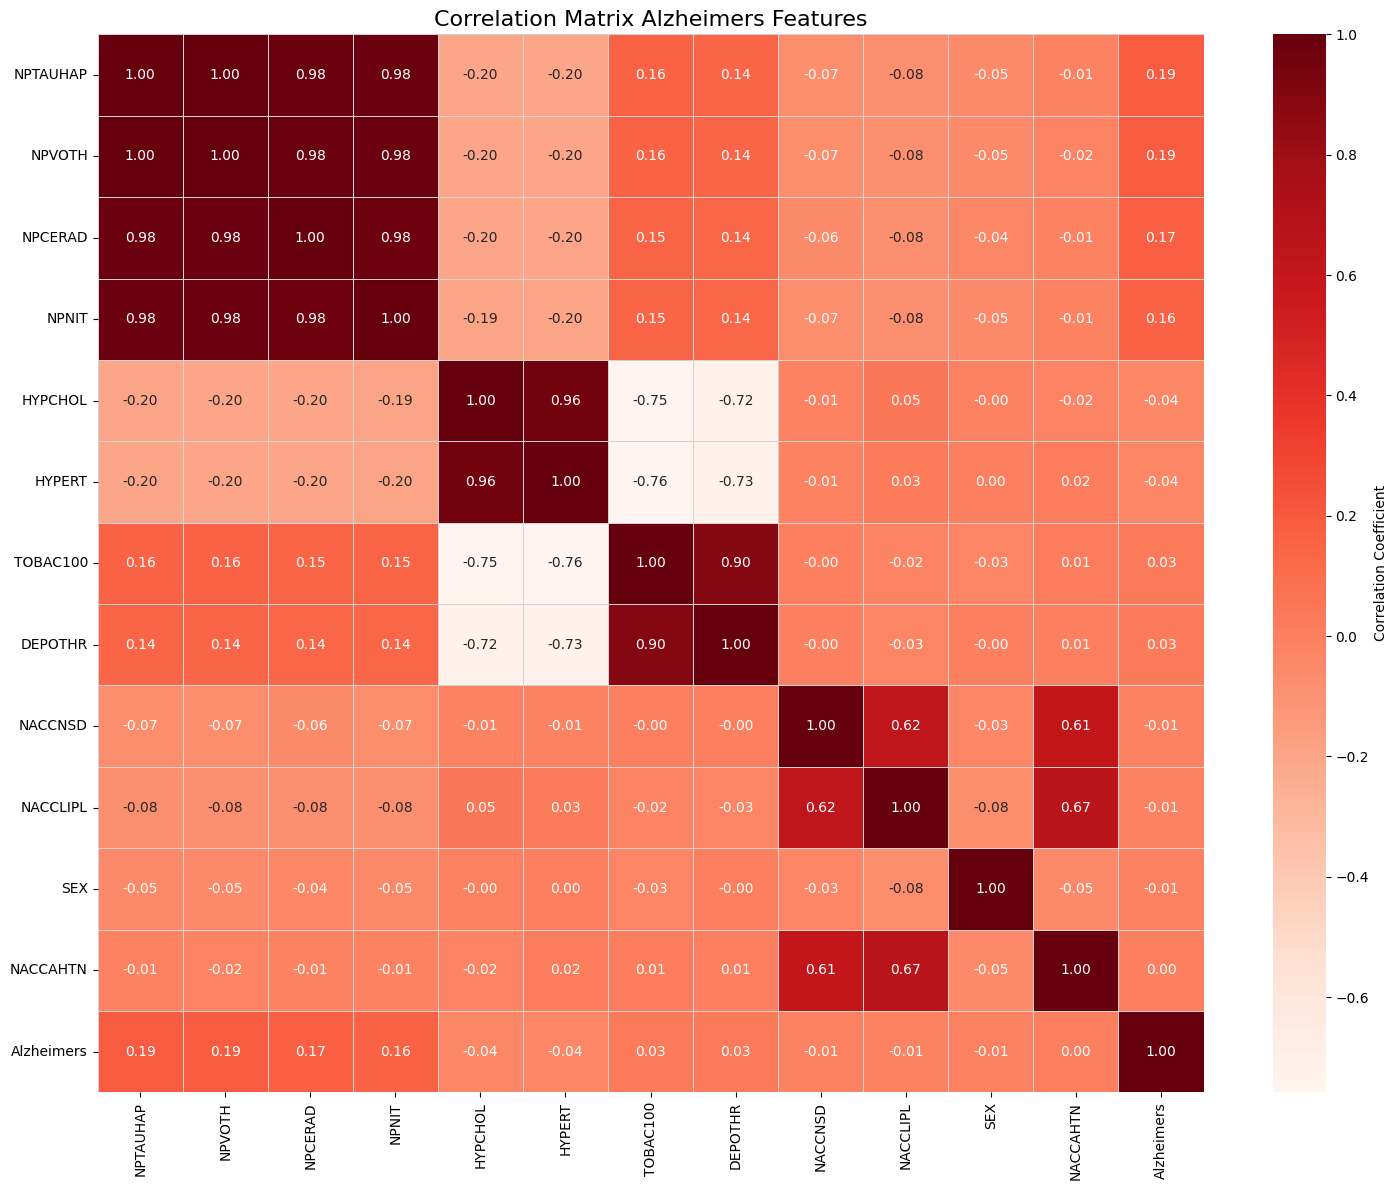

Correlation heatmap saved to: /content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/feature_correlation_heatmap_filtered.png

--- Heatmap Generation Complete ---


In [ ]:
import pandas as pd
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration (ensure these match your main pipeline settings) ---
CHECKPOINT_DIR = '/content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/'
PREPROCESSED_DATA_DIR = '/content/drive/MyDrive/alzheimers_model_ultimate/preprocessed_data/'

# Helper function to find the latest checkpoint/data file
def find_latest_file(directory, prefix):
    files = [os.path.join(directory, f) for f in os.listdir(directory) if f.startswith(prefix) and f.endswith(".joblib")]
    if not files:
        return None
    files.sort(key=os.path.getmtime, reverse=True)
    return files[0]

print("--- Generating Correlation Matrix Heatmap of Filtered Test Features and Target ---")

# --- Load necessary data from checkpoints ---

# 1. Load the latest preprocessed data to get y_test_overall
latest_preprocessed_file = find_latest_file(PREPROCESSED_DATA_DIR, "preprocessed_data_")
y_test_overall_raw = None # Raw targets for the whole test set
if latest_preprocessed_file:
    try:
        loaded_data = joblib.load(latest_preprocessed_file)
        y_test_overall_raw = loaded_data['alz_targets_test']
        print(f"Successfully loaded raw test targets from: {latest_preprocessed_file}")
    except Exception as e:
        print(f"Error loading raw test targets from preprocessed data: {e}")
        exit("Failed to load raw test targets. Exiting heatmap generation.")
else:
    exit("No preprocessed data file found. Exiting heatmap generation.")


# 2. Load the final trained model checkpoint to get X_test_processed_final and its feature names
latest_final_model_checkpoint = find_latest_file(CHECKPOINT_DIR, "stacking_classifier_final_model_")
X_test_processed_final_df = None # This will be the DataFrame of processed test features
final_model_feature_names = [] # Feature names from the final model's training

if latest_final_model_checkpoint:
    try:
        final_model_info = joblib.load(latest_final_model_checkpoint)
        X_test_processed_final_np = final_model_info['X_test_processed_final'] # NumPy array of processed test features
        final_model_feature_names = final_model_info['feature_names'] # Names of features used by the final model

        # Convert to DataFrame, using the original index from y_test_overall_raw for alignment
        X_test_processed_final_df = pd.DataFrame(X_test_processed_final_np,
                                                 columns=final_model_feature_names,
                                                 index=y_test_overall_raw.index)
        print(f"Successfully loaded processed test features from: {latest_final_model_checkpoint}")
    except Exception as e:
        print(f"Error loading processed test features from final model checkpoint: {e}. Cannot proceed with heatmap.")
else:
    print("No final model checkpoint found. Cannot proceed with heatmap.")

if X_test_processed_final_df is None or X_test_processed_final_df.empty or y_test_overall_raw is None:
    print("Required data for heatmap not available. Exiting.")
    exit()


# --- Align y_test_overall_raw with the loaded X_test_processed_final_df's index ---
# This ensures that features and targets correspond to the same samples.
y_test_aligned = y_test_overall_raw.loc[X_test_processed_final_df.index]





current_feature_names = X_test_processed_final_df.columns.tolist()

for feature in current_feature_names:
    if feature.startswith('LB') or feature.startswith('FTD'):
        features_to_remove_pattern.append(feature)

all_features_to_remove = list(set(features_to_remove_explicit + features_to_remove_pattern))

features_to_keep = [f for f in current_feature_names if f not in all_features_to_remove]
X_filtered_for_heatmap = X_test_processed_final_df[features_to_keep].copy() # Use .copy() to avoid SettingWithCopyWarning


# --- Filter out NaN values (from targets) and ensure X also matches ---
# Dropna on the target series first, then filter X_filtered_for_heatmap based on its index
y_test_aligned_cleaned = y_test_aligned.dropna()
X_filtered_for_heatmap = X_filtered_for_heatmap.loc[y_test_aligned_cleaned.index]




# --- Generate the Correlation Matrix Heatmap ---
print("  Generating correlation matrix heatmap...")

# Combine features and target for correlation calculation
data_for_corr = X_filtered_for_heatmap.copy()
data_for_corr['Alzheimers'] = y_test_aligned_cleaned
cor_matrix = data_for_corr.corr()

# Sort features by absolute correlation with the target for better visualization
target_col_name = 'Alzheimers''
if target_col_name in cor_matrix.columns:
    # Drop the target itself from the sorting, then re-add it at the end
    cor_target_sorted = cor_matrix[target_col_name].drop(target_col_name).abs().sort_values(ascending=False)
    sorted_cols = cor_target_sorted.index.tolist() + [target_col_name]
    cor_matrix_sorted = cor_matrix.loc[sorted_cols, sorted_cols]
else:
    # Fallback if target column is somehow missing (should not happen with aligned data)
    cor_matrix_sorted = cor_matrix

plt.figure(figsize=(15, 12)) # Adjust size as needed for readability
sns.heatmap(cor_matrix_sorted, cmap='Reds', annot=True, fmt=".2f",
            linewidths=.5, linecolor='lightgrey', cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Matrix Alzheimers Features", fontsize=16) # Updated title
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

plot_filename = 'feature_correlation_heatmap_filtered.png'
plt.savefig(os.path.join(CHECKPOINT_DIR, plot_filename), bbox_inches='tight')
plt.show()
plt.close()

print(f"Correlation heatmap saved to: {os.path.join(CHECKPOINT_DIR, plot_filename)}")

print("\n--- Heatmap Generation Complete ---")


## **ADC VALIDATION**

--- Standalone ADC (NACCADC) Validation Analysis with Filtered Plots ---

--- Loading saved model and essential preprocessed data for validation ---
Successfully loaded raw test targets from: /content/drive/MyDrive/alzheimers_model_ultimate/preprocessed_data/preprocessed_data_20250625_133933.joblib
Successfully loaded final trained model and its prepared test data from: /content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/stacking_classifier_final_model_20250625_030024.joblib

--- Loading NACCADC from original imputed test data: /content/drive/MyDrive/imputed_data/imputed_test.csv ---
NACCADC column successfully loaded from imputed_test.csv.
Successfully aligned test data components by index for validation.

--- Performing predictions on the aligned test set using the loaded model ---

--- Calculating ADC (NACCADC) Validation Metrics for all categories ---
  ADC Metrics calculated for all categories.


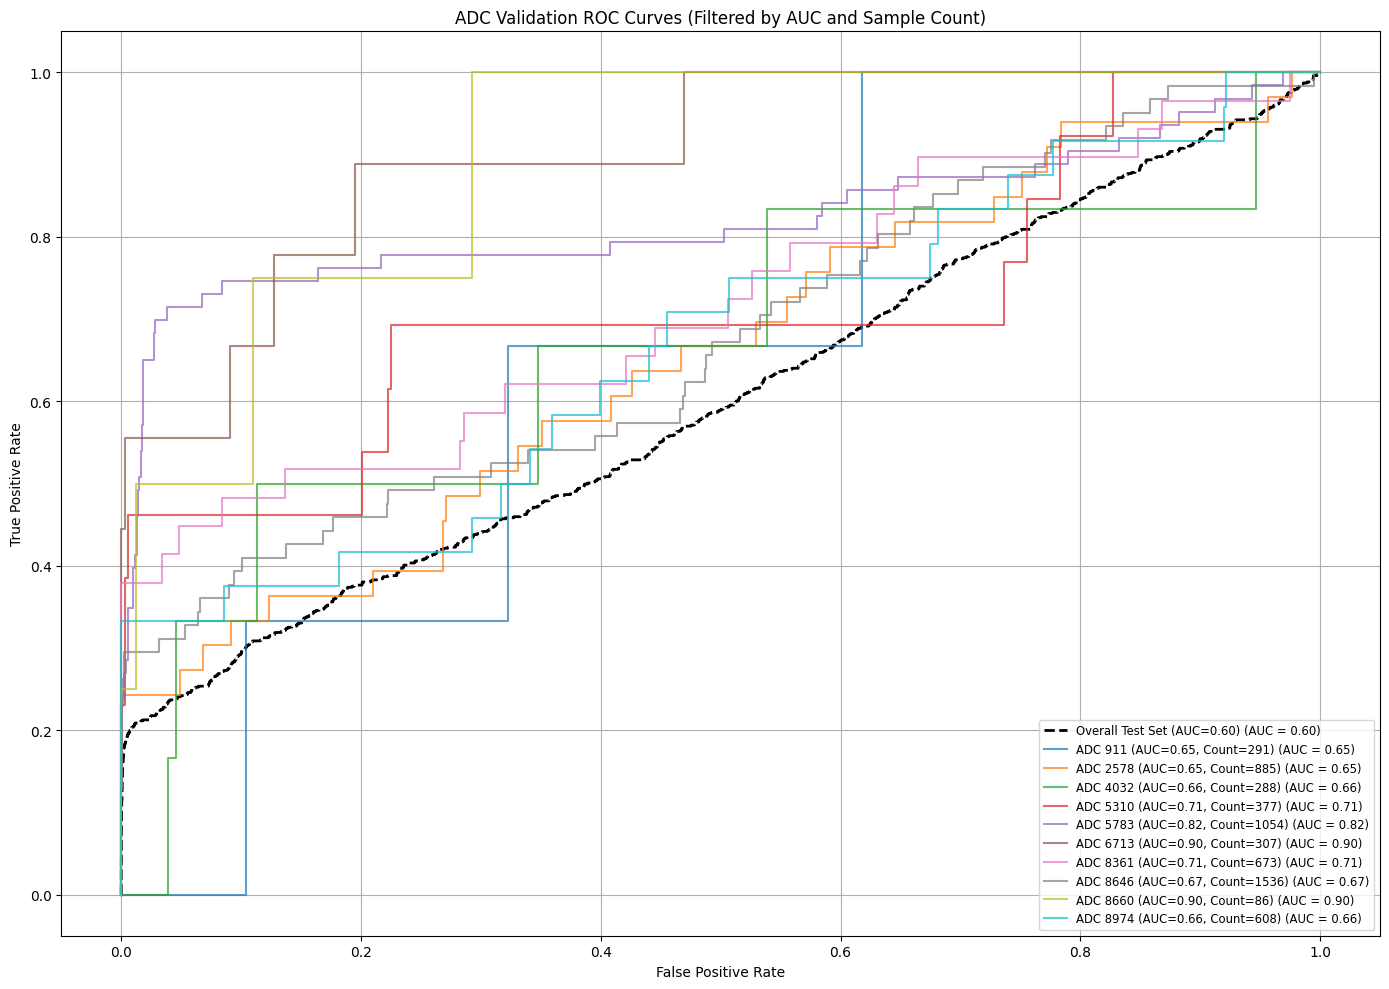


--- ADC Validation Complete ---


In [ ]:
import pandas as pd
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, average_precision_score, RocCurveDisplay
from collections import Counter
import warnings
import re

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

print("--- Standalone ADC (NACCADC) Validation Analysis with Filtered Plots ---")

# --- Configuration ---
ALZHEIMERS_COL = 'NPPAD'
CHECKPOINT_DIR = '/content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/'
PREPROCESSED_DATA_DIR = '/content/drive/MyDrive/alzheimers_model_ultimate/preprocessed_data/'

# Original path for imputed test data, to directly load NACCADC
IMPUTED_TEST_DATA_PATH = '/content/drive/MyDrive/imputed_data/imputed_test.csv'

# --- Plotting Thresholds ---
MIN_SAMPLES_PER_ADC = 200

# Helper function to find the latest checkpoint/data file
def find_latest_file(directory, prefix):
    files = [os.path.join(directory, f) for f in os.listdir(directory) if f.startswith(prefix) and f.endswith(".joblib")]
    if not files:
        return None
    files.sort(key=os.path.getmtime, reverse=True)
    return files[0]

print("\n--- Loading saved model and essential preprocessed data for validation ---")

# Load the latest preprocessed data (contains original y_test_overall)
latest_preprocessed_file = find_latest_file(PREPROCESSED_DATA_DIR, "preprocessed_data_")
if latest_preprocessed_file:
    try:
        loaded_data = joblib.load(latest_preprocessed_file)
        y_test_overall_raw = loaded_data['alz_targets_test']
        print(f"Successfully loaded raw test targets from: {latest_preprocessed_file}")
    except Exception as e:
        print(f"Error loading raw test targets from preprocessed data: {e}")
        exit("Failed to load raw test targets. Exiting ADC validation.")
else:
    exit("No preprocessed data file found. Exiting ADC validation.")


# Load the final trained model and the already feature-selected test data it expects for prediction
latest_final_model_checkpoint = find_latest_file(CHECKPOINT_DIR, "stacking_classifier_final_model_")
final_stacking_classifier = None
X_test_for_prediction_df = None

if latest_final_model_checkpoint:
    try:
        final_model_info = joblib.load(latest_final_model_checkpoint)
        final_stacking_classifier = final_model_info['model']
        X_test_for_prediction_np = final_model_info['X_test_processed_final']
        final_model_selected_feature_names = final_model_info['feature_names']

        X_test_for_prediction_df = pd.DataFrame(X_test_for_prediction_np,
                                                columns=final_model_selected_feature_names,
                                                index=y_test_overall_raw.index)

        print(f"Successfully loaded final trained model and its prepared test data from: {latest_final_model_checkpoint}")
    except Exception as e:
        print(f"Error loading final trained model or its prepared test data: {e}. Cannot proceed with ADC validation.")
else:
    print("No final trained model checkpoint found. Cannot proceed with ADC validation.")

if final_stacking_classifier is None or X_test_for_prediction_df is None:
    exit("Trained model or its prepared test data not found or could not be loaded. Exiting ADC validation.")


# --- LOAD NACCADC DIRECTLY FROM IMPUTED_TEST.CSV ---
print(f"\n--- Loading NACCADC from original imputed test data: {IMPUTED_TEST_DATA_PATH} ---")
adc_test_original_full = None
try:
    temp_df = pd.read_csv(IMPUTED_TEST_DATA_PATH, usecols=['NACCADC'])
    adc_test_original_full = temp_df['NACCADC']
    adc_test_original_full.index = y_test_overall_raw.index
    print("NACCADC column successfully loaded from imputed_test.csv.")
except Exception as e:
    print(f"Error loading NACCADC from {IMPUTED_TEST_DATA_PATH}: {e}. Cannot perform ADC validation.")
    exit("Failed to load NACCADC. Exiting ADC validation.")

# --- Align all test data components by index ---
y_test_overall_aligned = y_test_overall_raw.loc[X_test_for_prediction_df.index]
adc_test_aligned = adc_test_original_full.loc[X_test_for_prediction_df.index]

print("Successfully aligned test data components by index for validation.")

# --- Perform Predictions on the aligned test set using the loaded model ---
print("\n--- Performing predictions on the aligned test set using the loaded model ---")
y_pred_proba = final_stacking_classifier.predict_proba(X_test_for_prediction_df.to_numpy())[:, 1]


# --- ADC (NACCADC) Validation Metrics Calculation ---
print("\n--- Calculating ADC (NACCADC) Validation Metrics for all categories ---")

unique_adc_categories = np.sort(adc_test_aligned.unique())

adc_results = {}

for adc_cat in unique_adc_categories:
    mask = (adc_test_aligned == adc_cat)

    y_test_subset_masked = y_test_overall_aligned[mask]
    y_pred_proba_subset_masked = y_pred_proba[mask]

    valid_indices = ~y_test_subset_masked.isna()
    y_test_subset_cleaned = y_test_subset_masked[valid_indices]
    y_pred_proba_subset_cleaned = y_pred_proba_subset_masked[valid_indices]

    if len(y_test_subset_cleaned) > 0 and pd.Series(y_test_subset_cleaned).nunique() > 1:
        sub_roc_auc = roc_auc_score(y_test_subset_cleaned, y_pred_proba_subset_cleaned)
        sub_auprc = average_precision_score(y_test_subset_cleaned, y_pred_proba_subset_cleaned)

        adc_results[adc_cat] = {
            'count': len(y_test_subset_cleaned),
            'pos_class_count': Counter(y_test_subset_cleaned)[1],
            'neg_class_count': Counter(y_test_subset_cleaned)[0],
            'roc_auc': sub_roc_auc,
            'auprc': sub_auprc,
            'y_true': y_test_subset_cleaned,
            'y_proba': y_pred_proba_subset_cleaned
        }
    else:
        adc_results[adc_cat] = {
            'count': len(y_test_subset_masked),
            'pos_class_count': Counter(y_test_subset_cleaned).get(1, 0),
            'neg_class_count': Counter(y_test_subset_cleaned).get(0, 0),
            'roc_auc': np.nan,
            'auprc': np.nan,
            'y_true': None,
            'y_proba': None
        }

print("  ADC Metrics calculated for all categories.")


# --- Plotting ROC Curves for Filtered ADC Categories ---

adc_roc_curves_data = []

for adc_cat in sorted(adc_results.keys()):
    metrics = adc_results[adc_cat]
    roc_auc_val = metrics['roc_auc']
    count_val = metrics['count']

    if (not np.isnan(roc_auc_val) and
        count_val >= MIN_SAMPLES_PER_ADC):

        label = f'ADC {adc_cat} (AUC={roc_auc_val:.2f}, Count={count_val})'
        adc_roc_curves_data.append((metrics['y_true'], metrics['y_proba'], label))

model_name = "Stacking Classifier"
model_save_path = CHECKPOINT_DIR

if adc_roc_curves_data:
    plt.figure(figsize=(14, 10))
    ax = plt.gca()

    overall_y_true_cleaned = y_test_overall_aligned.dropna()
    overall_y_pred_proba_cleaned = y_pred_proba[~y_test_overall_aligned.isna().to_numpy()]


    if pd.Series(overall_y_true_cleaned).nunique() > 1:
        overall_roc_auc = roc_auc_score(overall_y_true_cleaned, overall_y_pred_proba_cleaned)
        RocCurveDisplay.from_predictions(overall_y_true_cleaned, overall_y_pred_proba_cleaned,
                                        name=f'Overall Test Set (AUC={overall_roc_auc:.2f})',
                                        ax=ax, linewidth=2, color='black', linestyle='--')
    else:
        print("Warning: Overall test set does not have enough unique classes for ROC AUC calculation. Skipping overall plot.")


    for adc_y, adc_probs, label in adc_roc_curves_data:
        RocCurveDisplay.from_predictions(adc_y, adc_probs,
                                         name=label,
                                         ax=ax, alpha=0.7, linewidth=1.5)

    plt.title(f"ADC Validation ROC Curves (Filtered by Sample Count)")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.legend(loc='lower right', fontsize='small')
    plt.grid(True)
    plt.tight_layout()

    plot_filename = f'{model_name.replace(" ", "_").lower()}_adc_validation_filtered_roc_curves.png'
    plt.savefig(os.path.join(model_save_path, plot_filename))
    plt.show()
    plt.close()

else:
    print("  No NACCADC categories met the specified criteria for plotting ROC curves.")

print("\n--- ADC Validation Complete ---")


## **LEWY BODY MODEL**

In [ ]:
import pandas as pd
import numpy as np
import gc
from scipy import sparse
from sklearn.feature_selection import mutual_info_classif, SelectPercentile, VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE # This is not directly used in this cell, but kept for context if needed later
import datetime
import os
import joblib

# Enhanced Configuration
TARGET_COL = 'NPPLEWY' # Changed target column to NPLEWY
TOP_FEATURES_PERCENTILE = 30
# SMOTE_SAMPLING_STRATEGY_RATIO and SMOTE_NEIGHBORS are typically handled in the main pipeline
RANDOM_STATE = 42

print("Memory-optimized data processing for Lewy Body Dementia prediction...") # Updated print statement

# --- Define directories ---
CHECKPOINT_DIR = '/content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/'
PREPROCESSED_DATA_DIR = '/content/drive/MyDrive/alzheimers_model_ultimate/preprocessed_data/'

# Ensure directories exist
os.makedirs(CHECKPOINT_DIR, exist_ok=True)
os.makedirs(PREPROCESSED_DATA_DIR, exist_ok=True)


# Load data safely
print("Loading data with optimized dtypes...")
# Reverting to the original file paths
# Ensure these CSVs contain all original columns including 'NACCADC' and target columns.
features_train_imp = pd.read_csv('/content/drive/MyDrive/imputed_data/imputed_train.csv')
features_test_imp = pd.read_csv('/content/drive/MyDrive/imputed_data/imputed_test.csv')


try:
    _ = targets_train
    _ = targets_test
except NameError:
    print(f"Warning: targets_train or targets_test not found. Creating dummy targets for demonstration based on '{TARGET_COL}'.")

    targets_train = pd.DataFrame(np.random.randint(0, 2, size=(features_train_imp.shape[0], 2)), columns=[TARGET_COL, 'NPPAD'], index=features_train_imp.index)
    targets_test = pd.DataFrame(np.random.randint(0, 2, size=(features_test_imp.shape[0], 2)), columns=[TARGET_COL, 'NPPAD'], index=features_test_imp.index)


#

original_test_data_with_NACCADC_for_saving = None
if 'NACCADC' in features_test_imp.columns:
    original_test_data_with_NACCADC_for_saving = features_test_imp[['NACCADC']].copy()
    print("Original NACCADC for test set captured for later validation.")
else:
    print("Warning: NACCADC column not found in test features. ADC validation requiring NACCADC may not function correctly.")


# NACCADC will be excluded from the feature sets that go into the model training.
if 'NACCADC' in features_train_imp.columns:
    features_train_imp = features_train_imp.drop(columns=['NACCADC'])
    features_test_imp = features_test_imp.drop(columns=['NACCADC'])
    print("NACCADC column separated from main feature set for model training.")


# Convert non-ADC columns to float16 initially for memory, but be ready to upcast
numerical_cols = features_train_imp.columns.tolist() # All remaining columns are now numerical/float
features_train_imp[numerical_cols] = features_train_imp[numerical_cols].astype(np.float16)
features_test_imp[numerical_cols] = features_test_imp[numerical_cols].astype(np.float16)

# Select the new target column (NPLEWY)
nplewy_targets_train = targets_train[TARGET_COL].copy().astype(np.int8) # Renamed variable
nplewy_targets_test = targets_test[TARGET_COL].copy().astype(np.int8)   # Renamed variable

# Memory cleanup
gc.collect()

# Preprocessing and Scaling
print("Applying efficient feature scaling...")

# 1. Check for infinite values and replace with NaN
print("Checking for and handling infinite values...")
for col in numerical_cols:
    if np.isinf(features_train_imp[col]).any():
        print(f"Warning: Infinite values found in features_train_imp column: {col}. Replacing with NaN.")
        features_train_imp[col] = features_train_imp[col].replace([np.inf, -np.inf], np.nan)
    if np.isinf(features_test_imp[col]).any():
        print(f"Warning: Infinite values found in features_test_imp column: {col}. Replacing with NaN.")
        features_test_imp[col] = features_test_imp[col].replace([np.inf, -np.inf], np.nan)

# 2. Impute NaN values BEFORE scaling and feature selection
print("Imputing NaN values before scaling...")
imputer = SimpleImputer(strategy='mean')

# Apply imputer on float32 for robustness, then cast back to float16
features_train_imp[numerical_cols] = imputer.fit_transform(features_train_imp[numerical_cols].astype(np.float32)).astype(np.float16)
features_test_imp[numerical_cols] = imputer.transform(features_test_imp[numerical_cols].astype(np.float32)).astype(np.float16)

del imputer
gc.collect()

# 3. Scaling: Perform scaling on float32 for numerical stability
scaler = StandardScaler()
features_train_imp[numerical_cols] = scaler.fit_transform(features_train_imp[numerical_cols].astype(np.float32)).astype(np.float16)
features_test_imp[numerical_cols] = scaler.transform(features_test_imp[numerical_cols].astype(np.float32)).astype(np.float16)

del scaler
gc.collect()

# --- Initial Feature Selection on full preprocessed training data ---
print("Applying initial aggressive feature selection (Variance Threshold + Mutual Information)...")

# 1. Remove low-variance features
selector_vt = VarianceThreshold(threshold=0.1)
selector_vt.fit(features_train_imp)
selected_mask_vt = selector_vt.get_support()
selected_features_vt = features_train_imp.columns[selected_mask_vt].tolist()

print(f"Features after Variance Threshold: {len(selected_features_vt)}")

# 2. Mutual information filtering (selects features based on their relationship with the target)
selector_mi = SelectPercentile(score_func=mutual_info_classif, percentile=TOP_FEATURES_PERCENTILE)
selector_mi.fit(features_train_imp[selected_features_vt], nplewy_targets_train) # Use nplewy_targets_train

selected_mask_mi = selector_mi.get_support()
initial_selected_feature_names = np.array(selected_features_vt)[selected_mask_mi].tolist()

print(f"Features after MI selection: {len(initial_selected_feature_names)}")

# --- FINAL FEATURE REMOVAL BASED ON USER'S REQUESTS ---
# This ensures that the model training pipeline never sees these features.
print("Applying final specific feature removal before saving processed data...")
features_to_remove_explicit = ['NPFIXX', 'CODSFLDY', 'ARTH', 'HYPERCHO', 'NPFRONT']
features_to_remove_pattern_prefixes = ['LB', 'FTD'] # Features starting with these prefixes

final_filtered_feature_names = []
removed_count_final = 0

for feature in initial_selected_feature_names:
    is_to_remove = False
    if feature in features_to_remove_explicit:
        is_to_remove = True
    else:
        for prefix in features_to_remove_pattern_prefixes:
            if feature.startswith(prefix):
                is_to_remove = True
                break

    if not is_to_remove:
        final_filtered_feature_names.append(feature)
    else:
        print(f"  Removing feature: {feature}")
        removed_count_final += 1

if removed_count_final == 0:
    print("  No additional features matching specific criteria were removed in the final filtering step.")
else:
    print(f"  Total of {removed_count_final} features removed by specific criteria.")

print(f"Features entering model training (after all filtering): {len(final_filtered_feature_names)} features.")


# Filter datasets to keep ONLY the final selected features
X_train_processed_for_model = features_train_imp[final_filtered_feature_names].astype(np.float32)
X_test_processed_for_model = features_test_imp[final_filtered_feature_names].astype(np.float32)


# Memory cleanup
del features_train_imp, features_test_imp, selector_vt, selector_mi
gc.collect()


# --- Save the preprocessed data to a new, uniquely named file ---
print("\n--- Saving Preprocessed Data ---")
# Generate a unique filename for the preprocessed data
timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
preprocessed_filename = os.path.join(PREPROCESSED_DATA_DIR, f"preprocessed_data_nplewy_{timestamp}.joblib") # Added nplewy to filename

# Package all necessary outputs into a dictionary
preprocessed_output = {
    'X_train_processed_for_model': X_train_processed_for_model,
    'X_test_processed_for_model': X_test_processed_for_model,
    'nplewy_targets_train': nplewy_targets_train, # Changed target variable name
    'nplewy_targets_test': nplewy_targets_test,   # Changed target variable name
    'original_test_data_with_NACCADC': original_test_data_with_NACCADC_for_saving, # This DataFrame is for ADC validation
    'final_selected_feature_names': final_filtered_feature_names # Renamed to final_selected_feature_names
}

joblib.dump(preprocessed_output, preprocessed_filename)
print(f"Preprocessed data saved to: {preprocessed_filename}")

print("\nData preparation complete!")
print(f"Features entering model training (X_train_processed_for_model) shape: {X_train_processed_for_model.shape}")


Memory-optimized data processing for Lewy Body Dementia prediction...
Loading data with optimized dtypes...
Original NACCADC for test set captured for later validation.
NACCADC column separated from main feature set for model training.
Applying efficient feature scaling...
Checking for and handling infinite values...
Imputing NaN values before scaling...
Applying initial aggressive feature selection (Variance Threshold + Mutual Information)...
Features after Variance Threshold: 1485
Features after MI selection: 446
Applying final specific feature removal before saving processed data...
  Removing feature: LBDEVAL
  Removing feature: FTD
  Removing feature: FTDIF
  Removing feature: ARTH
  Removing feature: FTDDADE
  Removing feature: FTDMSA
  Removing feature: FTDALIEN
  Removing feature: FTDEMGPY
  Removing feature: FTDBENTC
  Removing feature: FTDNOUNC
  Removing feature: FTDCPC2F
  Removing feature: FTDCRY
  Removing feature: FTDEATP
  Removing feature: FTDSHIRT
  Removing feature: 

--- ULTIMATE LEWY BODY DEMENTIA TRAINING PIPELINE ---
Incorporating Nested Cross-Validation and Robust SHAP Analysis (with Checkpointing)

--- Loading preprocessed data ---
Loading latest preprocessed data from: /content/drive/MyDrive/alzheimers_model_ultimate/preprocessed_data/preprocessed_data_nplewy_20250625_200745.joblib


[I 2025-06-25 20:15:41,910] A new study created in memory with name: no-name-fa36146f-2520-43b2-b43c-a985df6b38d0


  Initial feature set loaded (excluding NACCADC): 373 features.
  Overall X_train shape: (103084, 373), y_train shape: (103084,)
  Overall X_test shape: (25772, 373), y_test shape: (25772,)
  Class distribution (overall train):  Counter({0: 102530, 1: 554})

--- Starting Nested Cross-Validation for Hyperparameter Tuning & Feature Selection ---
Outer loop: 3 folds. Inner loop: 3 folds with 3 Optuna trials.
No existing outer fold checkpoints found. Starting from scratch.

--- OUTER FOLD 1/3 ---
  Outer train shape: (68722, 373), Outer test shape: (34362, 373)
  Outer train class distribution: Counter({0: 68353, 1: 369})
  Running Optuna for XGBoost (Outer Fold 1)...


[I 2025-06-25 20:28:01,671] Trial 0 finished with value: 0.15321116711665708 and parameters: {'n_estimators': 624, 'learning_rate': 0.13125830316209655, 'max_depth': 8, 'subsample': 0.8095304694689628, 'colsample_bytree': 0.6546065241548528, 'gamma': 1.5885362614907343e-07, 'reg_lambda': 3.6589056619847695e-08, 'reg_alpha': 2.5177723297049526}. Best is trial 0 with value: 0.15321116711665708.
[I 2025-06-25 20:40:47,414] Trial 1 finished with value: 0.14706013047894342 and parameters: {'n_estimators': 942, 'learning_rate': 0.06803900745073706, 'max_depth': 3, 'subsample': 0.939468448256698, 'colsample_bytree': 0.8913549242801475, 'gamma': 4.3131289636915034e-07, 'reg_lambda': 5.80116079086011e-07, 'reg_alpha': 6.009451572352867e-07}. Best is trial 0 with value: 0.15321116711665708.
[I 2025-06-25 20:53:23,071] Trial 2 finished with value: 0.1465891005269715 and parameters: {'n_estimators': 526, 'learning_rate': 0.04141536110538596, 'max_depth': 6, 'subsample': 0.7019301990693146, 'colsam

  Best XGBoost params for Outer Fold 1: {'n_estimators': 624, 'learning_rate': 0.13125830316209655, 'max_depth': 8, 'subsample': 0.8095304694689628, 'colsample_bytree': 0.6546065241548528, 'gamma': 1.5885362614907343e-07, 'reg_lambda': 3.6589056619847695e-08, 'reg_alpha': 2.5177723297049526}
  Running Optuna for CatBoost (Outer Fold 1)...


[I 2025-06-25 21:08:07,323] Trial 0 finished with value: 0.17497665516485147 and parameters: {'iterations': 1363, 'learning_rate': 0.04529315432680911, 'depth': 7, 'l2_leaf_reg': 12.00291651198469, 'subsample': 0.6699594655455938, 'colsample_bylevel': 0.6445389901303696}. Best is trial 0 with value: 0.17497665516485147.
[I 2025-06-25 21:22:05,737] Trial 1 finished with value: 0.14999681489344663 and parameters: {'iterations': 1180, 'learning_rate': 0.032241169559635206, 'depth': 5, 'l2_leaf_reg': 7.919054283085884, 'subsample': 0.8749360673457232, 'colsample_bylevel': 0.6569830121439958}. Best is trial 0 with value: 0.17497665516485147.
[I 2025-06-25 21:34:45,516] Trial 2 finished with value: 0.14321065545349426 and parameters: {'iterations': 261, 'learning_rate': 0.02460796425027957, 'depth': 7, 'l2_leaf_reg': 17.658935095030703, 'subsample': 0.8152070275034533, 'colsample_bylevel': 0.7484013648251528}. Best is trial 0 with value: 0.17497665516485147.


  Best CatBoost params for Outer Fold 1: {'iterations': 1363, 'learning_rate': 0.04529315432680911, 'depth': 7, 'l2_leaf_reg': 12.00291651198469, 'subsample': 0.6699594655455938, 'colsample_bylevel': 0.6445389901303696}
  Training final models for Outer Fold 1 with best found parameters...
  Features selected for this fold: 30
  Outer Fold 1 Test Metrics:
    ROC AUC: 0.5710
    AUPRC: 0.1618
    F1 Score (macro): 0.2586
    Precision: 0.6383
    Recall: 0.1622
    Balanced Accuracy: 0.5808
    Per-Class F1 (0, 1): [0.99748876 0.25862069]
    Macro AUROC: 0.5710
  Outer Fold 1 checkpoint saved.

--- OUTER FOLD 2/3 ---
  Outer train shape: (68723, 373), Outer test shape: (34361, 373)
  Outer train class distribution: Counter({0: 68353, 1: 370})


[I 2025-06-25 21:40:21,035] A new study created in memory with name: no-name-3ebeb0fc-6002-4b83-90f1-9d6d509d953b


  Running Optuna for XGBoost (Outer Fold 2)...


[I 2025-06-25 21:52:49,487] Trial 0 finished with value: 0.1291676605958302 and parameters: {'n_estimators': 261, 'learning_rate': 0.05203766884392413, 'max_depth': 3, 'subsample': 0.6842063669878721, 'colsample_bytree': 0.7144986695338988, 'gamma': 0.04115984896052657, 'reg_lambda': 0.02886615883745933, 'reg_alpha': 0.0017730299200216328}. Best is trial 0 with value: 0.1291676605958302.
[I 2025-06-25 22:05:11,286] Trial 1 finished with value: 0.13548656196573744 and parameters: {'n_estimators': 140, 'learning_rate': 0.07293818592552698, 'max_depth': 5, 'subsample': 0.8807164915200332, 'colsample_bytree': 0.6890473940509577, 'gamma': 2.7412927720157198e-08, 'reg_lambda': 2.5444807662124083, 'reg_alpha': 1.3923666136634656e-06}. Best is trial 1 with value: 0.13548656196573744.
[I 2025-06-25 22:17:32,595] Trial 2 finished with value: 0.10405166792333789 and parameters: {'n_estimators': 667, 'learning_rate': 0.023537389631022598, 'max_depth': 3, 'subsample': 0.8951286429803966, 'colsample

  Best XGBoost params for Outer Fold 2: {'n_estimators': 140, 'learning_rate': 0.07293818592552698, 'max_depth': 5, 'subsample': 0.8807164915200332, 'colsample_bytree': 0.6890473940509577, 'gamma': 2.7412927720157198e-08, 'reg_lambda': 2.5444807662124083, 'reg_alpha': 1.3923666136634656e-06}
  Running Optuna for CatBoost (Outer Fold 2)...


[I 2025-06-25 22:31:51,578] Trial 0 finished with value: 0.1352723993945589 and parameters: {'iterations': 1133, 'learning_rate': 0.02510832832400263, 'depth': 6, 'l2_leaf_reg': 0.3699423095708906, 'subsample': 0.7989118648232076, 'colsample_bylevel': 0.9084483003570076}. Best is trial 0 with value: 0.1352723993945589.
[I 2025-06-25 22:44:16,627] Trial 1 finished with value: 0.10612215125694892 and parameters: {'iterations': 146, 'learning_rate': 0.010240725720306591, 'depth': 4, 'l2_leaf_reg': 0.041564468407255424, 'subsample': 0.9391468168432631, 'colsample_bylevel': 0.6197996438128248}. Best is trial 0 with value: 0.1352723993945589.
[I 2025-06-25 22:57:01,749] Trial 2 finished with value: 0.12261867212924599 and parameters: {'iterations': 225, 'learning_rate': 0.021324711439729, 'depth': 7, 'l2_leaf_reg': 0.01824152256301752, 'subsample': 0.8003709755978227, 'colsample_bylevel': 0.7163830831783654}. Best is trial 0 with value: 0.1352723993945589.


  Best CatBoost params for Outer Fold 2: {'iterations': 1133, 'learning_rate': 0.02510832832400263, 'depth': 6, 'l2_leaf_reg': 0.3699423095708906, 'subsample': 0.7989118648232076, 'colsample_bylevel': 0.9084483003570076}
  Training final models for Outer Fold 2 with best found parameters...
  Features selected for this fold: 30


[I 2025-06-25 23:02:08,209] A new study created in memory with name: no-name-815a66af-d9d9-4e01-a03e-e9f4b4393406


  Outer Fold 2 Test Metrics:
    ROC AUC: 0.5865
    AUPRC: 0.1556
    F1 Score (macro): 0.2648
    Precision: 0.8286
    Recall: 0.1576
    Balanced Accuracy: 0.5787
    Per-Class F1 (0, 1): [0.99764974 0.26484018]
    Macro AUROC: 0.5865
  Outer Fold 2 checkpoint saved.

--- OUTER FOLD 3/3 ---
  Outer train shape: (68723, 373), Outer test shape: (34361, 373)
  Outer train class distribution: Counter({0: 68354, 1: 369})
  Running Optuna for XGBoost (Outer Fold 3)...


[I 2025-06-25 23:14:34,235] Trial 0 finished with value: 0.13342530913303655 and parameters: {'n_estimators': 1269, 'learning_rate': 0.013281581217028014, 'max_depth': 8, 'subsample': 0.7261752926896999, 'colsample_bytree': 0.7257587932328251, 'gamma': 0.0004903520755033017, 'reg_lambda': 6.595626501115685e-05, 'reg_alpha': 9.280747833216822e-05}. Best is trial 0 with value: 0.13342530913303655.
[I 2025-06-25 23:26:48,545] Trial 1 finished with value: 0.08706801449141693 and parameters: {'n_estimators': 814, 'learning_rate': 0.06842248571544682, 'max_depth': 9, 'subsample': 0.759817388128628, 'colsample_bytree': 0.749678032371563, 'gamma': 7.474009258555598e-08, 'reg_lambda': 1.2983584171136356e-06, 'reg_alpha': 19.341621394752725}. Best is trial 0 with value: 0.13342530913303655.
[I 2025-06-25 23:39:10,772] Trial 2 finished with value: 0.12618977659028807 and parameters: {'n_estimators': 1421, 'learning_rate': 0.10891954766828595, 'max_depth': 7, 'subsample': 0.674838684245713, 'colsa

  Best XGBoost params for Outer Fold 3: {'n_estimators': 1269, 'learning_rate': 0.013281581217028014, 'max_depth': 8, 'subsample': 0.7261752926896999, 'colsample_bytree': 0.7257587932328251, 'gamma': 0.0004903520755033017, 'reg_lambda': 6.595626501115685e-05, 'reg_alpha': 9.280747833216822e-05}
  Running Optuna for CatBoost (Outer Fold 3)...


[I 2025-06-25 23:51:40,584] Trial 0 finished with value: 0.12709728443607085 and parameters: {'iterations': 230, 'learning_rate': 0.11164268955884926, 'depth': 6, 'l2_leaf_reg': 0.04383816348107825, 'subsample': 0.848887284991452, 'colsample_bylevel': 0.7777910803621727}. Best is trial 0 with value: 0.12709728443607085.
[I 2025-06-26 00:05:10,331] Trial 1 finished with value: 0.08204820550938342 and parameters: {'iterations': 743, 'learning_rate': 0.08903239571549317, 'depth': 7, 'l2_leaf_reg': 0.12354677760870805, 'subsample': 0.806999839569904, 'colsample_bylevel': 0.6328073449671224}. Best is trial 0 with value: 0.12709728443607085.
[I 2025-06-26 00:19:50,767] Trial 2 finished with value: 0.13675927050939427 and parameters: {'iterations': 1218, 'learning_rate': 0.020583567423247306, 'depth': 7, 'l2_leaf_reg': 0.1251659042127664, 'subsample': 0.9463624537172199, 'colsample_bylevel': 0.7370108396304806}. Best is trial 2 with value: 0.13675927050939427.


  Best CatBoost params for Outer Fold 3: {'iterations': 1218, 'learning_rate': 0.020583567423247306, 'depth': 7, 'l2_leaf_reg': 0.1251659042127664, 'subsample': 0.9463624537172199, 'colsample_bylevel': 0.7370108396304806}
  Training final models for Outer Fold 3 with best found parameters...
  Features selected for this fold: 30
  Outer Fold 3 Test Metrics:
    ROC AUC: 0.6028
    AUPRC: 0.1985
    F1 Score (macro): 0.3117
    Precision: 0.7826
    Recall: 0.1946
    Balanced Accuracy: 0.5972
    Per-Class F1 (0, 1): [0.99767853 0.31168831]
    Macro AUROC: 0.6028
  Outer Fold 3 checkpoint saved.

--- Nested Cross-Validation Final Results ---
Average ROC AUC: 0.5868 +/- 0.0130
Average AUPRC: 0.1720 +/- 0.0189
Average F1 Score: 0.2784 +/- 0.0237
Average Precision: 0.7498 +/- 0.0811
Average Recall: 0.1715 +/- 0.0165
Average Balanced Accuracy: 0.5856 +/- 0.0082
Average Per-Class F1 (0, 1): [0.99760567 0.27838306] +/- [8.35036995e-05 2.36868501e-02]
Average Macro AUROC: 0.5868 +/- 0.0130



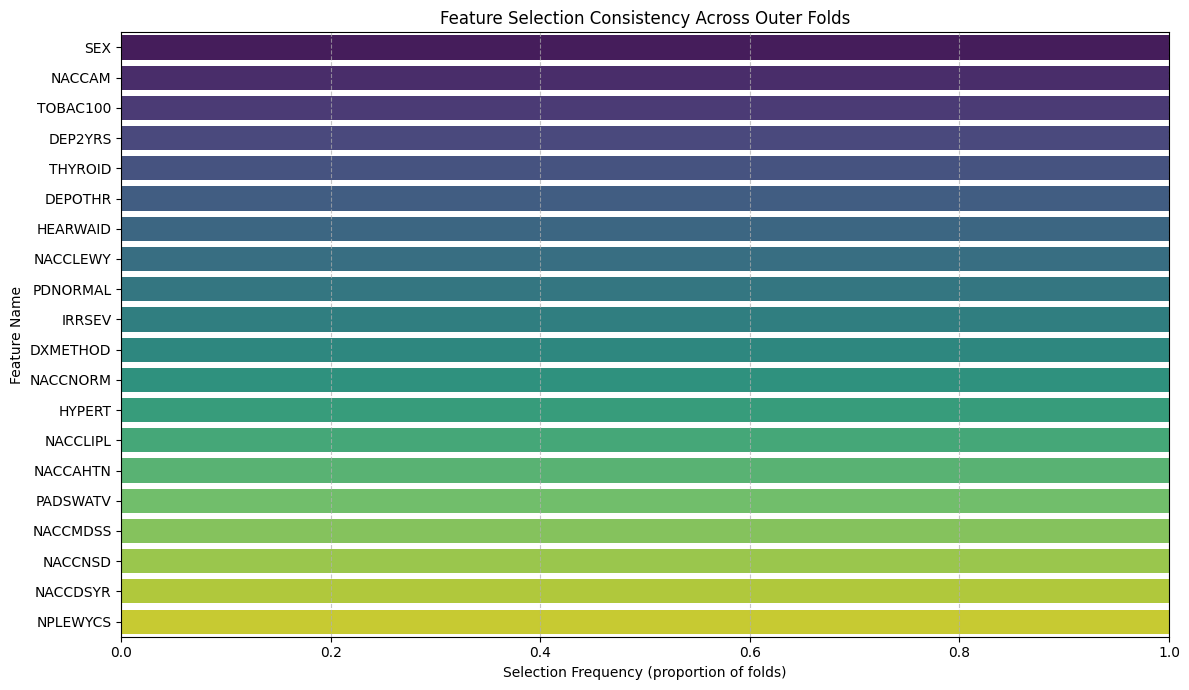


--- Training Final Model on Entire Training Dataset for Deployment & SHAP Analysis ---
Using parameters from Outer Fold 3 for final model training.
  Final XGBoost params: {'n_estimators': 1269, 'learning_rate': 0.013281581217028014, 'max_depth': 8, 'subsample': 0.7261752926896999, 'colsample_bytree': 0.7257587932328251, 'gamma': 0.0004903520755033017, 'reg_lambda': 6.595626501115685e-05, 'reg_alpha': 9.280747833216822e-05}
  Final CatBoost params: {'iterations': 1218, 'learning_rate': 0.020583567423247306, 'depth': 7, 'l2_leaf_reg': 0.1251659042127664, 'subsample': 0.9463624537172199, 'colsample_bylevel': 0.7370108396304806}
  Final model trained with 30 features.
Final trained Stacking Classifier model and features saved to: /content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/stacking_classifier_final_model_npplewy_20250626_003515.joblib

--- Evaluating Final Model on Overall Test Set ---

Final Model Performance on Overall Test Set:
  ROC AUC: 0.6316
  AUPRC: 0.1872
  F1 S

100%|===================| 4997/5000 [09:24<00:00]       

SHAP results saved to: /content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/shap_results_npplewy_20250626_005106.joblib
  Removed 0 features for SHAP plot: []
  Number of features remaining for SHAP plot: 30


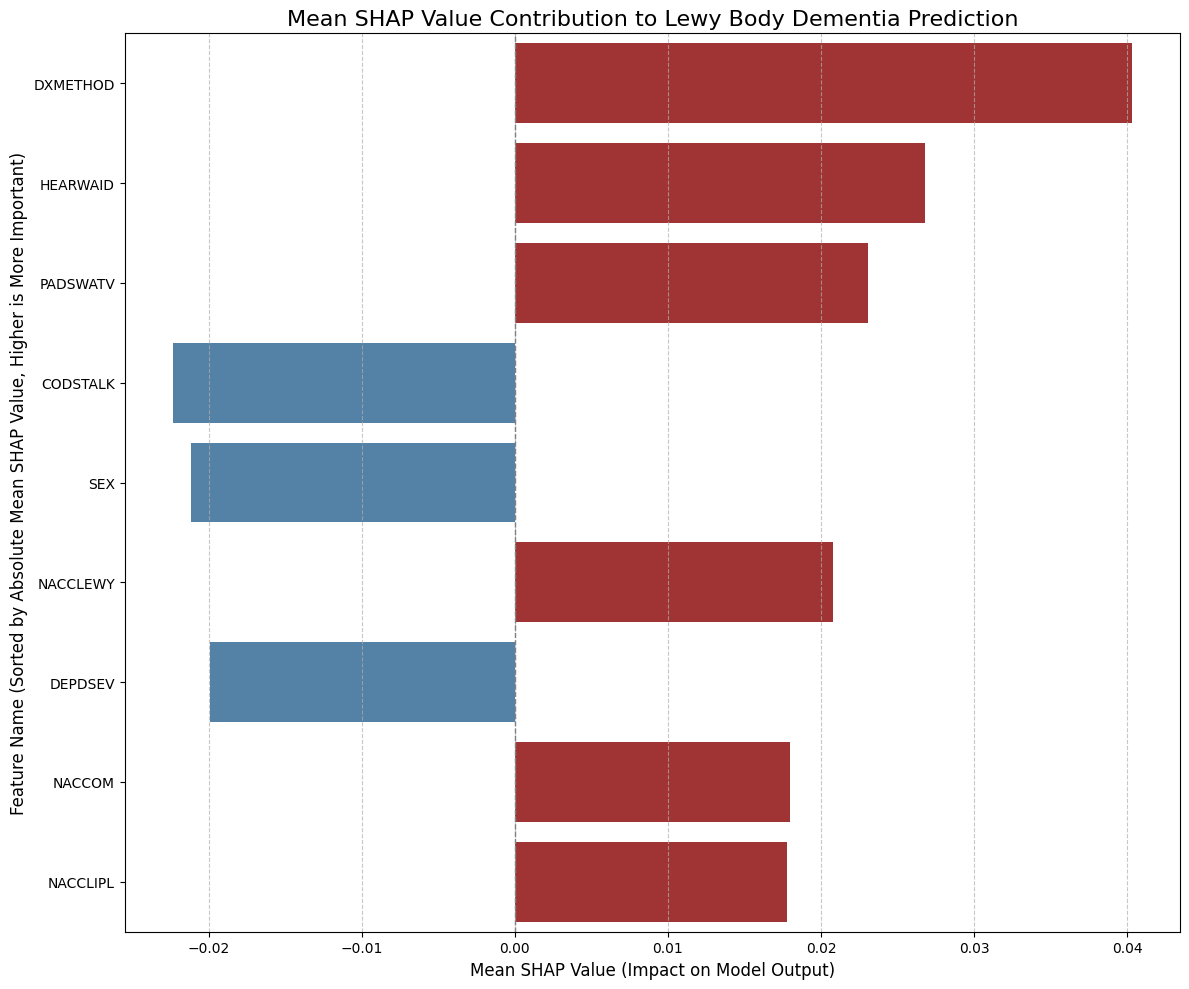


--- Consolidated Robust Feature Analysis (Stability + SHAP Importance) ---


KeyError: 'feature'

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import catboost as cb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    roc_auc_score, average_precision_score, f1_score, precision_score, recall_score,
    balanced_accuracy_score, roc_curve, auc
)
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel, RFE
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
import optuna
import shap
import joblib
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
import gc
from scipy import sparse

# Suppress specific warnings from libraries
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")
warnings.filterwarnings("ignore", category=UserWarning, module="catboost")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
warnings.filterwarnings("ignore", message="The `k_neighbors` parameter is deprecated and will be removed in a future version.", category=FutureWarning)


# --- Configuration ---
TARGET_DISEASE_COL = 'NPPLEWY'
RANDOM_STATE = 42
N_OPTUNA_TRIALS = 3
N_SPLITS_OUTER = 3
N_SPLITS_INNER = 3

N_FEATURES_TO_SELECT_RFE = 30
RFE_STEP = 0.1
SMOTE_NEIGHBORS = 5

CHECKPOINT_DIR = '/content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/'
PREPROCESSED_DATA_DIR = '/content/drive/MyDrive/alzheimers_model_ultimate/preprocessed_data/'

# Ensure directories exist
os.makedirs(CHECKPOINT_DIR, exist_ok=True)
os.makedirs(PREPROCESSED_DATA_DIR, exist_ok=True)

# Helper function to find the latest checkpoint/data file for a specific prefix
def find_latest_file(directory, prefix):
    files = [os.path.join(directory, f) for f in os.listdir(directory) if f.startswith(prefix) and f.endswith(".joblib")]
    if not files:
        return None
    files.sort(key=os.path.getmtime, reverse=True) # Sort by modification time
    return files[0]

print("--- ULTIMATE LEWY BODY DEMENTIA TRAINING PIPELINE ---")
print("Incorporating Nested Cross-Validation and Robust SHAP Analysis (with Checkpointing)")

# --- LOADING PREPROCESSED DATA ---
print("\n--- Loading preprocessed data ---")

# FIX: Change the prefix to "preprocessed_data_nplewy_" (removed the extra 'p')
latest_preprocessed_file = find_latest_file(PREPROCESSED_DATA_DIR, "preprocessed_data_nplewy_")

if latest_preprocessed_file:
    print(f"Loading latest preprocessed data from: {latest_preprocessed_file}")
    loaded_data = joblib.load(latest_preprocessed_file)

    X_train_overall = loaded_data['X_train_processed_for_model']
    X_test_overall = loaded_data['X_test_processed_for_model']
    y_train_overall = loaded_data['nplewy_targets_train']
    y_test_overall = loaded_data['nplewy_targets_test']
    initial_selected_feature_names = loaded_data['final_selected_feature_names']
    print(f"  Initial feature set loaded (excluding NACCADC): {len(initial_selected_feature_names)} features.")
    # You might also want to load original_test_data_with_NACCADC if needed later
    # original_test_data_with_NACCADC = loaded_data['original_test_data_with_NACCADC']
else:
    raise FileNotFoundError(f"No preprocessed data for NPPLEWY found in {PREPROCESSED_DATA_DIR}. Please run the preprocessing script first and ensure it saves its output for '{TARGET_DISEASE_COL}'.") # Changed message for clarity

print(f"  Overall X_train shape: {X_train_overall.shape}, y_train shape: {y_train_overall.shape}")
print(f"  Overall X_test shape: {X_test_overall.shape}, y_test shape: {y_test_overall.shape}")
print("  Class distribution (overall train): ", Counter(y_train_overall))


# --- NESTED CROSS-VALIDATION FOR HYPERPARAMETER TUNING & FEATURE SELECTION ---
print("\n--- Starting Nested Cross-Validation for Hyperparameter Tuning & Feature Selection ---")
print(f"Outer loop: {N_SPLITS_OUTER} folds. Inner loop: {N_SPLITS_INNER} folds with {N_OPTUNA_TRIALS} Optuna trials.")

outer_kf = StratifiedKFold(n_splits=N_SPLITS_OUTER, shuffle=True, random_state=RANDOM_STATE)

# To store results of outer folds - Added new metrics
outer_loop_test_roc_aucs = []
outer_loop_test_auprcs = []
outer_loop_test_f1_scores = []
outer_loop_test_precision_scores = []
outer_loop_test_recall_scores = []
outer_loop_test_balanced_accuracy_scores = []
outer_loop_test_f1_per_class_scores = []
outer_loop_test_macro_auroc_scores = []

# To store best parameters and selected features from each outer fold's inner loop
best_params_per_fold = []
selected_features_per_fold = []
final_trained_models = []

# --- Check for existing outer fold checkpoints and resume ---
resumed_from_fold = -1
for outer_fold_idx in range(N_SPLITS_OUTER):
    fold_checkpoint_prefix = f"outer_fold_model_metrics_npplewy_{outer_fold_idx}_"
    latest_fold_checkpoint = find_latest_file(CHECKPOINT_DIR, fold_checkpoint_prefix)

    if latest_fold_checkpoint:
        print(f"Loading checkpoint for Outer Fold {outer_fold_idx + 1} from: {latest_fold_checkpoint}")
        fold_data = joblib.load(latest_fold_checkpoint)

        outer_loop_test_roc_aucs.append(fold_data['metrics']['roc_auc'])
        outer_loop_test_auprcs.append(fold_data['metrics']['auprc'])
        outer_loop_test_f1_scores.append(fold_data['metrics']['f1'])
        outer_loop_test_precision_scores.append(fold_data['metrics']['precision'])
        outer_loop_test_recall_scores.append(fold_data['metrics']['recall'])
        outer_loop_test_balanced_accuracy_scores.append(fold_data['metrics'].get('balanced_accuracy', np.nan))
        outer_loop_test_f1_per_class_scores.append(fold_data['metrics'].get('f1_per_class', np.array([np.nan, np.nan])))
        outer_loop_test_macro_auroc_scores.append(fold_data['metrics'].get('macro_auroc', np.nan))

        best_params_per_fold.append(fold_data['best_params'])
        selected_features_per_fold.append(fold_data['selected_features'])
        final_trained_models.append(fold_data['model'])
        resumed_from_fold = outer_fold_idx
    else:
        break

if resumed_from_fold >= 0:
    print(f"Resuming pipeline from Outer Fold {resumed_from_fold + 2}.")
    outer_kf_split_gen = outer_kf.split(X_train_overall, y_train_overall)
    for _ in range(resumed_from_fold + 1):
        next(outer_kf_split_gen)
else:
    print("No existing outer fold checkpoints found. Starting from scratch.")
    outer_kf_split_gen = outer_kf.split(X_train_overall, y_train_overall)


for outer_fold_idx, (train_idx, test_idx) in enumerate(outer_kf_split_gen):
    current_outer_fold_num = resumed_from_fold + 1 + outer_fold_idx
    print(f"\n--- OUTER FOLD {current_outer_fold_num + 1}/{N_SPLITS_OUTER} ---")

    X_outer_train, X_outer_test = X_train_overall.iloc[train_idx], X_train_overall.iloc[test_idx]
    y_outer_train, y_outer_test = y_train_overall.iloc[train_idx], y_train_overall.iloc[test_idx]

    print(f"  Outer train shape: {X_outer_train.shape}, Outer test shape: {X_outer_test.shape}")
    print(f"  Outer train class distribution: {Counter(y_outer_train)}")

    def objective_xgb(trial):
        params = {
            'objective': 'binary:logistic',
            'eval_metric': 'logloss',
            'use_label_encoder': False,
            'seed': RANDOM_STATE,
            'n_estimators': trial.suggest_int('n_estimators', 100, 1500),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.15),
            'max_depth': trial.suggest_int('max_depth', 3, 9),
            'subsample': trial.suggest_uniform('subsample', 0.6, 0.95),
            'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.95),
            'gamma': trial.suggest_loguniform('gamma', 1e-8, 0.5),
            'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 50.0),
            'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 50.0),
            'scale_pos_weight': 1.0
        }

        inner_kf = StratifiedKFold(n_splits=N_SPLITS_INNER, shuffle=True, random_state=RANDOM_STATE + trial.number)
        oof_preds = np.zeros(X_outer_train.shape[0])

        for fold, (inner_train_idx, inner_val_idx) in enumerate(inner_kf.split(X_outer_train, y_outer_train)):
            X_inner_train_raw, X_inner_val_raw = X_outer_train.iloc[inner_train_idx], X_outer_train.iloc[inner_val_idx]
            y_inner_train, y_inner_val = y_outer_train.iloc[inner_train_idx], y_outer_train.iloc[inner_val_idx]

            smote = SMOTE(
                sampling_strategy='minority',
                k_neighbors=min(SMOTE_NEIGHBORS, max(1, Counter(y_inner_train).get(1, 0) - 1)),
                random_state=RANDOM_STATE
            )
            try:
                X_inner_train_resampled, y_inner_train_resampled = smote.fit_resample(X_inner_train_raw.to_numpy(), y_inner_train)
                X_inner_train_resampled = pd.DataFrame(X_inner_train_resampled, columns=X_inner_train_raw.columns)
            except ValueError as e:
                if "n_samples=" in str(e) or "k_neighbors" in str(e):
                    print(f"  Warning: SMOTE failed in inner fold {fold} for XGBoost trial {trial.number}. Using original inner train data.")
                    X_inner_train_resampled = X_inner_train_raw
                    y_inner_train_resampled = y_inner_train
                else:
                    raise e

            rfe_selector_model = RFE(
                estimator=BalancedRandomForestClassifier(n_estimators=50, random_state=RANDOM_STATE, n_jobs=1),
                n_features_to_select=min(N_FEATURES_TO_SELECT_RFE, X_inner_train_resampled.shape[1]),
                step=RFE_STEP,
                verbose=0
            )
            rfe_selector_model.fit(X_inner_train_resampled, y_inner_train_resampled)

            X_inner_train_selected = rfe_selector_model.transform(X_inner_train_resampled)
            X_inner_val_selected = rfe_selector_model.transform(X_inner_val_raw)

            model = xgb.XGBClassifier(**params)
            model.fit(X_inner_train_selected, y_inner_train_resampled)
            oof_preds[inner_val_idx] = model.predict_proba(X_inner_val_selected)[:, 1]

            del X_inner_train_selected, X_inner_val_selected
            gc.collect()

        auprc = average_precision_score(y_outer_train, oof_preds)
        return auprc

    def objective_cat(trial):
        params = {
            'iterations': trial.suggest_int('iterations', 100, 1500),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.15),
            'depth': trial.suggest_int('depth', 3, 9),
            'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-2, 50.0),
            'subsample': trial.suggest_uniform('subsample', 0.6, 0.95),
            'colsample_bylevel': trial.suggest_uniform('colsample_bylevel', 0.6, 0.95),
            'loss_function': 'Logloss',
            'eval_metric': 'AUC',
            'random_seed': RANDOM_STATE,
            'verbose': 0,
            'thread_count': 1
        }

        inner_kf = StratifiedKFold(n_splits=N_SPLITS_INNER, shuffle=True, random_state=RANDOM_STATE + trial.number)
        oof_preds = np.zeros(X_outer_train.shape[0])

        for fold, (inner_train_idx, inner_val_idx) in enumerate(inner_kf.split(X_outer_train, y_outer_train)):
            X_inner_train_raw, X_inner_val_raw = X_outer_train.iloc[inner_train_idx], X_outer_train.iloc[inner_val_idx]
            y_inner_train, y_inner_val = y_outer_train.iloc[inner_train_idx], y_outer_train.iloc[inner_val_idx]

            smote = SMOTE(
                sampling_strategy='minority',
                k_neighbors=min(SMOTE_NEIGHBORS, max(1, Counter(y_inner_train).get(1, 0) - 1)),
                random_state=RANDOM_STATE
            )
            try:
                X_inner_train_resampled, y_inner_train_resampled = smote.fit_resample(X_inner_train_raw.to_numpy(), y_inner_train)
                X_inner_train_resampled = pd.DataFrame(X_inner_train_resampled, columns=X_inner_train_raw.columns)
            except ValueError as e:
                if "n_samples=" in str(e) or "k_neighbors" in str(e):
                    print(f"  Warning: SMOTE failed in inner fold {fold} for CatBoost trial {trial.number}. Using original inner train data.")
                    X_inner_train_resampled = X_inner_train_raw
                    y_inner_train_resampled = y_inner_train
                else:
                    raise e

            rfe_selector_model = RFE(
                estimator=BalancedRandomForestClassifier(n_estimators=50, random_state=RANDOM_STATE, n_jobs=1),
                n_features_to_select=min(N_FEATURES_TO_SELECT_RFE, X_inner_train_resampled.shape[1]),
                step=RFE_STEP,
                verbose=0
            )
            rfe_selector_model.fit(X_inner_train_resampled, y_inner_train_resampled)

            X_inner_train_selected = rfe_selector_model.transform(X_inner_train_resampled)
            X_inner_val_selected = rfe_selector_model.transform(X_inner_val_raw)

            try:
                model = cb.CatBoostClassifier(**params)
                model.fit(X_inner_train_selected, y_inner_train_resampled)
                oof_preds[inner_val_idx] = model.predict_proba(X_inner_val_selected)[:, 1]
            except cb.CatBoostError as e:
                print(f"  CatBoostError in trial {trial.number}, fold {fold}: {e}. Pruning trial.")
                raise optuna.exceptions.TrialPruned()

            del X_inner_train_selected, X_inner_val_selected
            gc.collect()

        auprc = average_precision_score(y_outer_train, oof_preds)
        return auprc

    xgb_optuna_prefix = f"best_xgb_params_npplewy_outer_fold_{current_outer_fold_num}_"
    latest_xgb_optuna_params = find_latest_file(CHECKPOINT_DIR, xgb_optuna_prefix)
    if latest_xgb_optuna_params:
        best_xgb_params = joblib.load(latest_xgb_optuna_params)
        print(f"  Loaded best XGBoost params for Outer Fold {current_outer_fold_num + 1} from checkpoint.")
    else:
        print(f"  Running Optuna for XGBoost (Outer Fold {current_outer_fold_num + 1})...")
        study_xgb = optuna.create_study(direction='maximize',
                                        sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE + current_outer_fold_num))
        study_xgb.optimize(objective_xgb, n_trials=N_OPTUNA_TRIALS, show_progress_bar=False)
        best_xgb_params = study_xgb.best_params
        print(f"  Best XGBoost params for Outer Fold {current_outer_fold_num + 1}: {best_xgb_params}")
        joblib.dump(best_xgb_params, os.path.join(CHECKPOINT_DIR, f"{xgb_optuna_prefix}{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.joblib"))

    cat_optuna_prefix = f"best_cat_params_npplewy_outer_fold_{current_outer_fold_num}_"
    latest_cat_optuna_params = find_latest_file(CHECKPOINT_DIR, cat_optuna_prefix)
    if latest_cat_optuna_params:
        best_cat_params = joblib.load(latest_cat_optuna_params)
        print(f"  Loaded best CatBoost params for Outer Fold {current_outer_fold_num + 1} from checkpoint.")
    else:
        print(f"  Running Optuna for CatBoost (Outer Fold {current_outer_fold_num + 1})...")
        study_cat = optuna.create_study(direction='maximize',
                                        sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE + current_outer_fold_num + 100))
        study_cat.optimize(objective_cat, n_trials=N_OPTUNA_TRIALS, show_progress_bar=False)
        best_cat_params = study_cat.best_params
        print(f"  Best CatBoost params for Outer Fold {current_outer_fold_num + 1}: {best_cat_params}")
        joblib.dump(best_cat_params, os.path.join(CHECKPOINT_DIR, f"{cat_optuna_prefix}{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.joblib"))

    best_params_per_fold.append({'xgb': best_xgb_params, 'cat': best_cat_params})

    print(f"  Training final models for Outer Fold {current_outer_fold_num + 1} with best found parameters...")

    smote_final = SMOTE(
        sampling_strategy='minority',
        k_neighbors=min(SMOTE_NEIGHBORS, max(1, Counter(y_outer_train).get(1, 0) - 1)),
        random_state=RANDOM_STATE
    )
    try:
        X_outer_train_resampled, y_outer_train_resampled = smote_final.fit_resample(X_outer_train.to_numpy(), y_outer_train)
        X_outer_train_resampled = pd.DataFrame(X_outer_train_resampled, columns=X_outer_train.columns)
    except ValueError as e:
        if "n_samples=" in str(e) or "k_neighbors" in str(e):
            print(f"  Warning: SMOTE failed for final training in outer fold {current_outer_fold_num + 1}. Using original outer train data.")
            X_outer_train_resampled = X_outer_train
            y_outer_train_resampled = y_outer_train
        else:
            raise e

    rfe_selector_final_fold = RFE(
        estimator=BalancedRandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1),
        n_features_to_select=min(N_FEATURES_TO_SELECT_RFE, X_outer_train_resampled.shape[1]),
        step=RFE_STEP,
        verbose=0
    )
    rfe_selector_final_fold.fit(X_outer_train_resampled, y_outer_train_resampled)

    X_outer_train_selected_final_np = rfe_selector_final_fold.transform(X_outer_train_resampled)
    X_outer_test_selected_final_np = rfe_selector_final_fold.transform(X_outer_test.to_numpy())

    current_selected_feature_names_fold = X_outer_train.columns[rfe_selector_final_fold.get_support()].tolist()
    selected_features_per_fold.append(current_selected_feature_names_fold)
    print(f"  Features selected for this fold: {len(current_selected_feature_names_fold)}")

    X_outer_train_selected_final = X_outer_train_selected_final_np
    X_outer_test_selected_final = X_outer_test_selected_final_np


    estimators = [
        ('xgb', xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss',
                                  use_label_encoder=False, random_state=RANDOM_STATE, **best_xgb_params)),
        ('cat', cb.CatBoostClassifier(loss_function='Logloss', eval_metric='AUC', random_seed=RANDOM_STATE,
                                      verbose=0, thread_count=-1, **best_cat_params))
    ]
    meta_learner = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE)

    stacking_classifier_fold = StackingClassifier(
        estimators=estimators,
        final_estimator=meta_learner,
        cv=N_SPLITS_INNER,
        stack_method='predict_proba',
        n_jobs=-1,
        passthrough=False
    )
    stacking_classifier_fold.fit(X_outer_train_selected_final, y_outer_train_resampled)
    final_trained_models.append(stacking_classifier_fold)

    y_pred_proba_fold = stacking_classifier_fold.predict_proba(X_outer_test_selected_final)[:, 1]
    y_pred_class_fold = stacking_classifier_fold.predict(X_outer_test_selected_final)

    roc_auc_fold = roc_auc_score(y_outer_test, y_pred_proba_fold)
    auprc_fold = average_precision_score(y_outer_test, y_pred_proba_fold)
    f1_fold = f1_score(y_outer_test, y_pred_class_fold)
    precision_fold = precision_score(y_outer_test, y_pred_class_fold)
    recall_fold = recall_score(y_outer_test, y_pred_class_fold)

    balanced_accuracy_fold = balanced_accuracy_score(y_outer_test, y_pred_class_fold)
    f1_per_class_fold = f1_score(y_outer_test, y_pred_class_fold, average=None)
    if len(np.unique(y_outer_test)) > 1:
        fpr, tpr, _ = roc_curve(y_outer_test, y_pred_proba_fold)
        macro_auroc_fold = auc(fpr, tpr)
    else:
        macro_auroc_fold = np.nan

    outer_loop_test_roc_aucs.append(roc_auc_fold)
    outer_loop_test_auprcs.append(auprc_fold)
    outer_loop_test_f1_scores.append(f1_fold)
    outer_loop_test_precision_scores.append(precision_fold)
    outer_loop_test_recall_scores.append(recall_fold)
    outer_loop_test_balanced_accuracy_scores.append(balanced_accuracy_fold)
    outer_loop_test_f1_per_class_scores.append(f1_per_class_fold)
    outer_loop_test_macro_auroc_scores.append(macro_auroc_fold)

    print(f"  Outer Fold {current_outer_fold_num + 1} Test Metrics:")
    print(f"    ROC AUC: {roc_auc_fold:.4f}")
    print(f"    AUPRC: {auprc_fold:.4f}")
    print(f"    F1 Score (macro): {f1_fold:.4f}")
    print(f"    Precision: {precision_fold:.4f}")
    print(f"    Recall: {recall_fold:.4f}")
    print(f"    Balanced Accuracy: {balanced_accuracy_fold:.4f}")
    print(f"    Per-Class F1 (0, 1): {f1_per_class_fold}")
    print(f"    Macro AUROC: {macro_auroc_fold:.4f}")

    fold_checkpoint_data = {
        'model': stacking_classifier_fold,
        'selected_features': current_selected_feature_names_fold,
        'best_params': {'xgb': best_xgb_params, 'cat': best_cat_params},
        'metrics': {
            'roc_auc': roc_auc_fold,
            'auprc': auprc_fold,
            'f1': f1_fold,
            'precision': precision_fold,
            'recall': recall_fold,
            'balanced_accuracy': balanced_accuracy_fold,
            'f1_per_class': f1_per_class_fold,
            'macro_auroc': macro_auroc_fold
        }
    }
    joblib.dump(fold_checkpoint_data, os.path.join(CHECKPOINT_DIR, f"outer_fold_model_metrics_npplewy_{current_outer_fold_num}_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.joblib"))
    print(f"  Outer Fold {current_outer_fold_num + 1} checkpoint saved.")


# --- Aggregate Results from Nested Cross-Validation ---
print("\n--- Nested Cross-Validation Final Results ---")
print(f"Average ROC AUC: {np.mean(outer_loop_test_roc_aucs):.4f} +/- {np.std(outer_loop_test_roc_aucs):.4f}")
print(f"Average AUPRC: {np.mean(outer_loop_test_auprcs):.4f} +/- {np.std(outer_loop_test_auprcs):.4f}")
print(f"Average F1 Score: {np.mean(outer_loop_test_f1_scores):.4f} +/- {np.std(outer_loop_test_f1_scores):.4f}")
print(f"Average Precision: {np.mean(outer_loop_test_precision_scores):.4f} +/- {np.std(outer_loop_test_precision_scores):.4f}")
print(f"Average Recall: {np.mean(outer_loop_test_recall_scores):.4f} +/- {np.std(outer_loop_test_recall_scores):.4f}")
print(f"Average Balanced Accuracy: {np.mean(outer_loop_test_balanced_accuracy_scores):.4f} +/- {np.std(outer_loop_test_balanced_accuracy_scores):.4f}")
mean_f1_per_class = np.array(outer_loop_test_f1_per_class_scores).mean(axis=0)
std_f1_per_class = np.array(outer_loop_test_f1_per_class_scores).std(axis=0)
print(f"Average Per-Class F1 (0, 1): {mean_f1_per_class} +/- {std_f1_per_class}")
print(f"Average Macro AUROC: {np.mean(outer_loop_test_macro_auroc_scores):.4f} +/- {np.std(outer_loop_test_macro_auroc_scores):.4f}")


# --- Feature Consistency Analysis Across Outer Folds ---
print("\n--- Feature Consistency Analysis Across Outer Folds ---")
feature_selection_counts = Counter()
for fold_features in selected_features_per_fold:
    feature_selection_counts.update(fold_features)

feature_consistency_df = pd.DataFrame(feature_selection_counts.items(), columns=['feature', 'selection_count'])
feature_consistency_df['selection_freq'] = feature_consistency_df['selection_count'] / N_SPLITS_OUTER
feature_consistency_df = feature_consistency_df.sort_values(by='selection_freq', ascending=False).reset_index(drop=True)

print("Feature Selection Frequency Across Outer Folds:")
print(feature_consistency_df.head(15))

def plot_feature_consistency(df, top_n=20, title="Feature Selection Consistency Across Outer Folds"):
    plt.figure(figsize=(12, 7))
    sns.barplot(x='selection_freq', y='feature', data=df.head(top_n), palette='viridis')
    plt.title(title)
    plt.xlabel('Selection Frequency (proportion of folds)')
    plt.ylabel('Feature Name')
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(CHECKPOINT_DIR, 'feature_consistency_plot_npplewy.png'))
    plt.show()
    plt.close()

if not feature_consistency_df.empty:
    plot_feature_consistency(feature_consistency_df, top_n=min(20, len(feature_consistency_df)))
else:
    print("No features were consistently selected to plot consistency.")


# --- Final Model Training on Entire Dataset & SHAP Calculation ---
print("\n--- Training Final Model on Entire Training Dataset for Deployment & SHAP Analysis ---")

final_model_prefix = "stacking_classifier_final_model_npplewy_"
latest_final_model_checkpoint = find_latest_file(CHECKPOINT_DIR, final_model_prefix)

if latest_final_model_checkpoint:
    final_model_info = joblib.load(latest_final_model_checkpoint)
    final_stacking_classifier = final_model_info['model']
    final_model_feature_names = final_model_info['feature_names']
    X_test_selected_final_model = final_model_info['X_test_processed_final']
    print(f"Loaded final trained Stacking Classifier model from: {latest_final_model_checkpoint}")
else:
    best_outer_fold_idx = np.argmax(outer_loop_test_auprcs)
    final_best_xgb_params = best_params_per_fold[best_outer_fold_idx]['xgb']
    final_best_cat_params = best_params_per_fold[best_outer_fold_idx]['cat']
    print(f"Using parameters from Outer Fold {best_outer_fold_idx + 1} for final model training.")
    print(f"  Final XGBoost params: {final_best_xgb_params}")
    print(f"  Final CatBoost params: {final_best_cat_params}")

    smote_final_model_train = SMOTE(
        sampling_strategy='minority',
        k_neighbors=min(SMOTE_NEIGHBORS, max(1, Counter(y_train_overall).get(1, 0) - 1)),
        random_state=RANDOM_STATE
    )
    try:
        X_train_resampled_final, y_train_resampled_final = smote_final_model_train.fit_resample(X_train_overall.to_numpy(), y_train_overall)
        X_train_resampled_final = pd.DataFrame(X_train_resampled_final, columns=X_train_overall.columns)
    except ValueError as e:
        if "n_samples=" in str(e) or "k_neighbors" in str(e):
            print(f"  Warning: SMOTE failed for final full training. Using original training data.")
            X_train_resampled_final = X_train_overall
            y_train_resampled_final = y_train_overall
        else:
            raise e

    rfe_selector_final_model = RFE(
        estimator=BalancedRandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1),
        n_features_to_select=min(N_FEATURES_TO_SELECT_RFE, X_train_resampled_final.shape[1]),
        step=RFE_STEP,
        verbose=0
    )
    rfe_selector_final_model.fit(X_train_resampled_final, y_train_resampled_final)

    X_train_selected_final_model_np = rfe_selector_final_model.transform(X_train_resampled_final)
    X_test_selected_final_model_np = rfe_selector_final_model.transform(X_test_overall.to_numpy())

    final_model_feature_names = X_train_overall.columns[rfe_selector_final_model.get_support()].tolist()
    print(f"  Final model trained with {len(final_model_feature_names)} features.")

    X_train_selected_final_model = X_train_selected_final_model_np
    X_test_selected_final_model = X_test_selected_final_model_np


    final_estimators = [
        ('xgb', xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss',
                                  use_label_encoder=False, random_state=RANDOM_STATE, **final_best_xgb_params)),
        ('cat', cb.CatBoostClassifier(loss_function='Logloss', eval_metric='AUC', random_seed=RANDOM_STATE,
                                      verbose=0, thread_count=-1, **final_best_cat_params))
    ]
    final_meta_learner = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE)

    final_stacking_classifier = StackingClassifier(
        estimators=final_estimators,
        final_estimator=final_meta_learner,
        cv=N_SPLITS_INNER,
        stack_method='predict_proba',
        n_jobs=-1,
        passthrough=False
    )

    final_stacking_classifier.fit(X_train_selected_final_model, y_train_resampled_final)

    final_model_save_path = os.path.join(CHECKPOINT_DIR, f"{final_model_prefix}{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.joblib")
    joblib.dump({
        'model': final_stacking_classifier,
        'feature_names': final_model_feature_names,
        'X_test_processed_final': X_test_selected_final_model
    }, final_model_save_path)
    print(f"Final trained Stacking Classifier model and features saved to: {final_model_save_path}")


# --- Evaluate Final Model on Overall Test Set ---
print("\n--- Evaluating Final Model on Overall Test Set ---")
if 'final_stacking_classifier' in locals() and 'X_test_selected_final_model' in locals():
    y_test_pred_proba = final_stacking_classifier.predict_proba(X_test_selected_final_model)[:, 1]
    y_test_pred_class = final_stacking_classifier.predict(X_test_selected_final_model)

    final_test_roc_auc = roc_auc_score(y_test_overall, y_test_pred_proba)
    final_test_auprc = average_precision_score(y_test_overall, y_test_pred_proba)
    final_test_f1 = f1_score(y_test_overall, y_test_pred_class)
    final_test_precision = precision_score(y_test_overall, y_test_pred_class)
    final_test_recall = recall_score(y_test_overall, y_test_pred_class)

    final_test_balanced_accuracy = balanced_accuracy_score(y_test_overall, y_test_pred_class)
    final_test_f1_per_class = f1_score(y_test_overall, y_test_pred_class, average=None)
    if len(np.unique(y_test_overall)) > 1:
        fpr, tpr, _ = roc_curve(y_test_overall, y_test_pred_proba)
        final_test_macro_auroc = auc(fpr, tpr)
    else:
        final_test_macro_auroc = np.nan

    print("\nFinal Model Performance on Overall Test Set:")
    print(f"  ROC AUC: {final_test_roc_auc:.4f}")
    print(f"  AUPRC: {final_test_auprc:.4f}")
    print(f"  F1 Score (macro): {final_test_f1:.4f}")
    print(f"  Precision: {final_test_precision:.4f}")
    print(f"  Recall: {final_test_recall:.4f}")
    print(f"  Balanced Accuracy: {final_test_balanced_accuracy:.4f}")
    print(f"  Per-Class F1 (0, 1): {final_test_f1_per_class}")
    print(f"  Macro AUROC: {final_test_macro_auroc:.4f}")
else:
    print("Final model or test data not found. Skipping final evaluation.")


# --- SHAP-BASED FEATURE INTERPRETATION (Publishable Way) ---
print("\n--- SHAP-BASED FEATURE INTERPRETATION (Publishable Way) ---")

shap_results_prefix = "shap_results_npplewy_"
latest_shap_results_checkpoint = find_latest_file(CHECKPOINT_DIR, shap_results_prefix)

shap_values_obj = None
X_shap_subset = None

if latest_shap_results_checkpoint:
    try:
        shap_data = joblib.load(latest_shap_results_checkpoint)
        shap_values_obj = shap_data['shap_values_obj']
        X_shap_subset = shap_data['X_shap_subset']
    except Exception as e:
        print(f"Error loading SHAP results from checkpoint: {e}")
        pass
else:
    print("No SHAP results checkpoint found. Calculating SHAP values for visualization...")
    if 'final_stacking_classifier' not in locals() or 'final_model_feature_names' not in locals() or 'X_train_overall' not in locals():
        print("Cannot calculate SHAP values: Final model, feature names, or overall training data not available.")

        print("Skipping SHAP interpretation due to missing dependencies.")
    else:

        rfe_selector_final_model = RFE(
            estimator=BalancedRandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1),
            n_features_to_select=min(N_FEATURES_TO_SELECT_RFE, X_train_overall.shape[1]),
            step=RFE_STEP,
            verbose=0
        )
        # Apply SMOTE to a temporary copy for RFE fitting if needed
        smote_temp = SMOTE(
            sampling_strategy='minority',
            k_neighbors=min(SMOTE_NEIGHBORS, max(1, Counter(y_train_overall).get(1, 0) - 1)),
            random_state=RANDOM_STATE
        )
        try:
            X_train_resampled_temp, y_train_resampled_temp = smote_temp.fit_resample(X_train_overall.to_numpy(), y_train_overall)
            X_train_resampled_temp_df = pd.DataFrame(X_train_resampled_temp, columns=X_train_overall.columns)
        except ValueError as e:
            print(f"  Warning: SMOTE failed for temporary SHAP training. Using original data for RFE selection.")
            X_train_resampled_temp_df = X_train_overall
            y_train_resampled_temp = y_train_overall

        rfe_selector_final_model.fit(X_train_resampled_temp_df, y_train_resampled_temp)
        X_train_selected_final_model_df = X_train_overall.loc[:, rfe_selector_final_model.get_support()] # Select features based on RFE
        final_model_feature_names = X_train_selected_final_model_df.columns.tolist() # Update feature names based on this selection

        num_background_samples = min(500, X_train_selected_final_model_df.shape[0])
        background_data_for_explainer = X_train_selected_final_model_df.sample(num_background_samples, random_state=RANDOM_STATE)

        num_shap_samples = min(5000, X_train_selected_final_model_df.shape[0])
        X_shap_subset = X_train_selected_final_model_df.sample(num_shap_samples, random_state=RANDOM_STATE)

        print(f"  Calculating SHAP values on {num_shap_samples} samples (background: {num_background_samples})...")

        xgb_model_for_shap = final_stacking_classifier.named_estimators_['xgb']
        explainer = shap.TreeExplainer(xgb_model_for_shap, X_shap_subset) # Use X_shap_subset here for consistency

        shap_values_obj = explainer(X_shap_subset)

        shap_save_path = os.path.join(CHECKPOINT_DIR, f"{shap_results_prefix}{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.joblib")
        joblib.dump({
            'shap_values_obj': shap_values_obj,
            'X_shap_subset': X_shap_subset # Ensure X_shap_subset is the filtered one
        }, shap_save_path)
        print(f"SHAP results saved to: {shap_save_path}")


if shap_values_obj is not None and X_shap_subset is not None:
    # Extract SHAP values for the positive class (class 1)
    if shap_values_obj.values.ndim == 3:
        shap_values_for_positive_class = shap_values_obj.values[:, :, 1]
    else:
        shap_values_for_positive_class = shap_values_obj.values

    # Get feature names from the X_shap_subset DataFrame
    feature_names_for_plot = X_shap_subset.columns.tolist()

    # --- Feature removal logic for SHAP plotting, as per user's request ---

    features_to_remove_pattern_prefixes_shap = ['LB', 'FTD'] # Features starting with these prefixes

    features_to_remove_from_plot = []
    for feature in feature_names_for_plot:
        if feature in features_to_remove_explicit_shap:
            features_to_remove_from_plot.append(feature)
        else:
            for prefix in features_to_remove_pattern_prefixes_shap:
                if feature.startswith(prefix):
                    features_to_remove_from_plot.append(feature)
                    break

    all_features_to_remove_unique = list(set(features_to_remove_from_plot)) # Ensure uniqueness

    feature_name_to_idx = {name: i for i, name in enumerate(feature_names_for_plot)}

    indices_to_remove = sorted([feature_name_to_idx[f] for f in all_features_to_remove_unique if f in feature_name_to_idx], reverse=True)

    # Perform removal on SHAP values and X_shap_subset
    for idx in indices_to_remove:
        feature_name = feature_names_for_plot[idx]
        shap_values_for_positive_class = np.delete(shap_values_for_positive_class, idx, axis=1)
        # Drop the column from the DataFrame directly
        X_shap_subset = X_shap_subset.drop(columns=[feature_name])
        feature_names_for_plot.pop(idx) # Update the list of names

    print(f"  Removed {len(all_features_to_remove_unique)} features for SHAP plot: {all_features_to_remove_unique}")
    print(f"  Number of features remaining for SHAP plot: {len(feature_names_for_plot)}")

    # --- Calculate Mean SHAP Values for Directional Plotting ---
    # Re-create DataFrame with the filtered features
    shap_values_df_filtered = pd.DataFrame(shap_values_for_positive_class, columns=feature_names_for_plot)
    mean_shap_values = shap_values_df_filtered.mean().sort_values(key=abs, ascending=False)

    max_display_features = 9
    mean_shap_values = mean_shap_values.head(max_display_features)

    # --- Create the Directional Bar Plot ---
    plt.figure(figsize=(12, 10))

    colors = ['firebrick' if val > 0 else 'steelblue' for val in mean_shap_values.values]

    sns.barplot(x=mean_shap_values.values, y=mean_shap_values.index, palette=colors, dodge=False)

    # --- Updated Title and Labels for Publishable Quality ---
    plt.title("Mean SHAP Value Contribution to Lewy Body Dementia Prediction", fontsize=16) # Updated title
    plt.xlabel("Mean SHAP Value (Impact on Model Output)", fontsize=12)
    plt.ylabel("Feature Name (Sorted by Absolute Mean SHAP Value, Higher is More Important)", fontsize=12)

    plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Save the figure
    plot_filename = 'shap_directional_bar_filtered_publishable_plot_npplewy.png' # Updated filename
    plt.savefig(os.path.join(CHECKPOINT_DIR, plot_filename))
    plt.show()
    plt.close()

else:
    print("SHAP data not available. Cannot generate SHAP plots.")


# --- Feature Importance Consolidation (Stability + SHAP) ---
print("\n--- Consolidated Robust Feature Analysis (Stability + SHAP Importance) ---")

if not feature_consistency_df.empty and 'final_model_feature_names' in locals():

    if shap_values_obj is not None:
        if shap_values_obj.values.ndim == 3:
            full_shap_values_for_positive_class = shap_values_obj.values[:, :, 1]
        else:
            full_shap_values_for_positive_class = shap_values_obj.values


        if len(final_model_feature_names) == full_shap_values_for_positive_class.shape[1]:
            shap_importance_df = pd.Series(np.abs(full_shap_values_for_positive_class).mean(axis=0),
                                            index=final_model_feature_names).rename("mean_abs_shap_importance").to_frame()
        else:
            print("Warning: Mismatch between SHAP values dimensions and final_model_feature_names length for consolidated analysis. Using X_shap_subset columns if available.")
            if X_shap_subset is not None and len(X_shap_subset.columns) == full_shap_values_for_positive_class.shape[1]:
                 shap_importance_df = pd.Series(np.abs(full_shap_values_for_positive_class).mean(axis=0),
                                            index=X_shap_subset.columns).rename("mean_abs_shap_importance").to_frame()
            else:
                 print("Cannot reconcile feature names for consolidated analysis. Skipping SHAP importance for this section.")
                 shap_importance_df = pd.DataFrame(columns=['mean_abs_shap_importance']) # Empty DataFrame
    else:
        print("SHAP values object is None. Cannot perform consolidated robust feature analysis.")
        shap_importance_df = pd.DataFrame(columns=['mean_abs_shap_importance']) # Empty DataFrame

    if not shap_importance_df.empty:
        all_initial_features_df = pd.DataFrame({'feature': initial_selected_feature_names})
        all_initial_features_df = all_initial_features_df.merge(feature_consistency_df[['feature', 'selection_freq']], on='feature', how='left').fillna(0)
        all_initial_features_df = all_initial_features_df.merge(shap_importance_df, on='feature', how='left').fillna(0)

        MIN_SELECTION_FREQ = 0.7
        MIN_SHAP_IMPORTANCE = 0.01

        robust_features_df = all_initial_features_df[
            (all_initial_features_df['selection_freq'] >= MIN_SELECTION_FREQ) &
            (all_initial_features_df['mean_abs_shap_importance'] >= MIN_SHAP_IMPORTANCE)
        ].sort_values(by='mean_abs_shap_importance', ascending=False).reset_index(drop=True)

        print(f"\nIdentified {len(robust_features_df)} Robust Features (selected >= {MIN_SELECTION_FREQ*100:.0f}% of folds AND Mean Abs SHAP >= {MIN_SHAP_IMPORTANCE}):")
        print(robust_features_df)

        if not robust_features_df.empty:
            plt.figure(figsize=(12, max(6, len(robust_features_df)*0.5)))
            sns.barplot(x='mean_abs_shap_importance', y='feature', data=robust_features_df, palette='magma')
            plt.title('Robust Features (Consistent Selection & High SHAP Importance)')
            plt.xlabel('Mean Absolute SHAP Importance')
            plt.ylabel('Feature Name')
            plt.grid(axis='x', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.savefig(os.path.join(CHECKPOINT_DIR, 'robust_features_plot_npplewy.png'))
            plt.show()
            plt.close()
        else:
            print("No robust features found matching the specified criteria.")
    else:
        print("SHAP importance data is empty. Cannot perform consolidated robust feature analysis.")

else:
    print("Feature consistency DataFrame is empty or final_model_feature_names not available. Cannot perform robust feature analysis.")

print("\n--- PIPELINE COMPLETE ---")


--- GENERATING CUSTOM SHAP PLOT ---
Successfully loaded final trained model from: /content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/stacking_classifier_final_model_npplewy_20250626_003515.joblib
Successfully loaded overall training data from: /content/drive/MyDrive/alzheimers_model_ultimate/preprocessed_data/preprocessed_data_nplewy_20250626_024516.joblib
Loaded SHAP results from checkpoint: /content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/shap_results_npplewy_20250626_005106.joblib
Top 9 SHAP features saved to: /content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/top_9_shap_features_npplewy_20250626_033633.joblib


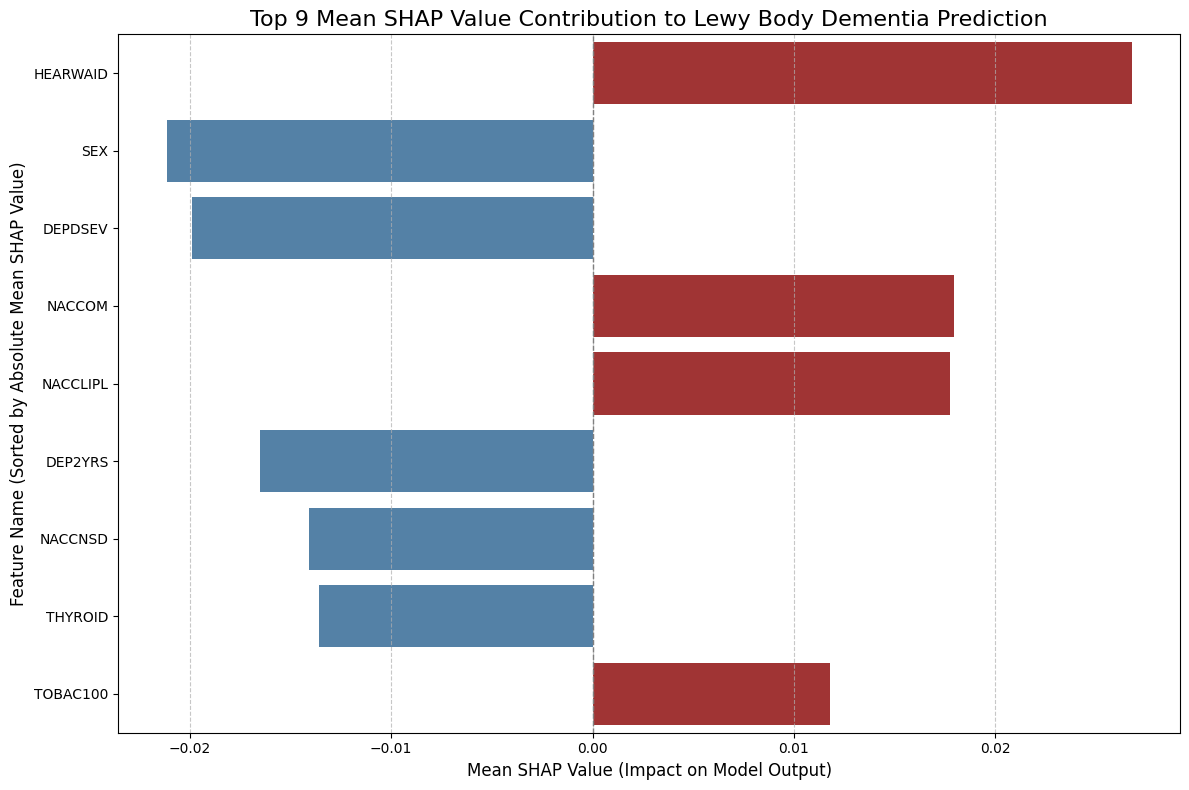


--- Custom SHAP Plot Generation Complete ---


In [ ]:
import pandas as pd
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import datetime
from collections import Counter
import warnings

# Suppress specific warnings from libraries
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")
warnings.filterwarnings("ignore", category=UserWarning, module="catboost")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
warnings.filterwarnings("ignore", message="The `k_neighbors` parameter is deprecated and will be removed in a future version.", category=FutureWarning)


# --- Configuration (re-defined for self-contained cell) ---
TARGET_DISEASE_COL = 'NPPLEWY'
RANDOM_STATE = 42
CHECKPOINT_DIR = '/content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/'
PREPROCESSED_DATA_DIR = '/content/drive/MyDrive/alzheimers_model_ultimate/preprocessed_data/'

# Ensure directories exist (important if running this cell independently)
os.makedirs(CHECKPOINT_DIR, exist_ok=True)
os.makedirs(PREPROCESSED_DATA_DIR, exist_ok=True)

# Helper function (re-defined for self-contained cell)
def find_latest_file(directory, prefix):
    files = [os.path.join(directory, f) for f in os.listdir(directory) if f.startswith(prefix) and f.endswith(".joblib")]
    if not files:
        return None
    files.sort(key=os.path.getmtime, reverse=True) # Sort by modification time
    return files[0]

print("--- GENERATING CUSTOM SHAP PLOT ---")

# --- Load the final trained model and preprocessed data needed for SHAP ---
final_stacking_classifier = None
X_train_overall = None # Needed if SHAP values need to be recalculated
final_model_feature_names = None

# Attempt to load the final trained model
final_model_prefix = f"stacking_classifier_final_model_{TARGET_DISEASE_COL.lower()}_"
latest_final_model_checkpoint = find_latest_file(CHECKPOINT_DIR, final_model_prefix)

if latest_final_model_checkpoint:
    try:
        final_model_info = joblib.load(latest_final_model_checkpoint)
        final_stacking_classifier = final_model_info['model']
        final_model_feature_names = final_model_info['feature_names']
        print(f"Successfully loaded final trained model from: {latest_final_model_checkpoint}")
    except Exception as e:
        print(f"Error loading final trained model: {e}")
else:
    print(f"Warning: No final trained model checkpoint found for {TARGET_DISEASE_COL}. SHAP values might need full recalculation or previous pipeline run failed.")

# Attempt to load overall training data (if model was not loaded, or for SHAP background if needed)
latest_preprocessed_file = find_latest_file(PREPROCESSED_DATA_DIR, "preprocessed_data_nplewy_") # Corrected prefix

if latest_preprocessed_file:
    try:
        loaded_data_for_shap_context = joblib.load(latest_preprocessed_file)
        X_train_overall = loaded_data_for_shap_context['X_train_processed_for_model']
        y_train_overall = loaded_data_for_shap_context['nplewy_targets_train'] # Needed for SMOTE if RFE is re-run
        print(f"Successfully loaded overall training data from: {latest_preprocessed_file}")
    except Exception as e:
        print(f"Error loading overall training data for SHAP context: {e}")
else:
    print(f"Warning: No preprocessed data file found for {TARGET_DISEASE_COL}. SHAP values might not be calculable.")


# --- SHAP Calculation (Load from checkpoint first, then recalculate if needed) ---
shap_results_prefix = "shap_results_npplewy_"
latest_shap_results_checkpoint = find_latest_file(CHECKPOINT_DIR, shap_results_prefix)

shap_values_obj = None
X_shap_subset = None

if latest_shap_results_checkpoint:
    try:
        shap_data = joblib.load(latest_shap_results_checkpoint)
        shap_values_obj = shap_data['shap_values_obj']
        X_shap_subset = shap_data['X_shap_subset']
        print(f"Loaded SHAP results from checkpoint: {latest_shap_results_checkpoint}")
    except Exception as e:
        print(f"Error loading SHAP results from checkpoint: {e}. Will attempt to recalculate.")
        # Reset to None to force recalculation
        shap_values_obj = None
        X_shap_subset = None

if shap_values_obj is None or X_shap_subset is None:
    print("No SHAP results checkpoint found or loading failed. Calculating SHAP values for visualization...")
    if final_stacking_classifier is None or X_train_overall is None or final_model_feature_names is None:
        print("Cannot calculate SHAP values: Final model, overall training data, or feature names not available. Skipping SHAP interpretation.")
    else:
        # Re-select features if X_train_overall is the full set, not the RFE-selected one
        # Assuming final_model_feature_names accurately represents the columns expected by the final_stacking_classifier
        X_train_selected_final_model_df = X_train_overall[final_model_feature_names]

        num_background_samples = min(500, X_train_selected_final_model_df.shape[0])
        num_shap_samples = min(5000, X_train_selected_final_model_df.shape[0])

        # Use X_train_selected_final_model_df directly for sampling
        X_shap_subset = X_train_selected_final_model_df.sample(num_shap_samples, random_state=RANDOM_STATE)

        print(f"  Calculating SHAP values on {num_shap_samples} samples (background: {num_background_samples})...")

        # SHAP explainer from the XGBoost base model
        xgb_model_for_shap = final_stacking_classifier.named_estimators_['xgb']
        explainer = shap.TreeExplainer(xgb_model_for_shap, X_shap_subset) # Using X_shap_subset for explainer background

        shap_values_obj = explainer(X_shap_subset)

        # Save newly calculated SHAP results
        shap_save_path = os.path.join(CHECKPOINT_DIR, f"{shap_results_prefix}{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.joblib")
        joblib.dump({
            'shap_values_obj': shap_values_obj,
            'X_shap_subset': X_shap_subset
        }, shap_save_path)
        print(f"SHAP results saved to: {shap_save_path}")


# --- Generate Custom SHAP Plot ---
if shap_values_obj is not None and X_shap_subset is not None:
    # Extract SHAP values for the positive class (class 1)
    if shap_values_obj.values.ndim == 3:
        shap_values_for_positive_class = shap_values_obj.values[:, :, 1]
    else:
        shap_values_for_positive_class = shap_values_obj.values

    # Get feature names from the X_shap_subset DataFrame (current state after any previous filtering)
    feature_names_for_plot = X_shap_subset.columns.tolist()



    # Identify indices of features to remove from plot
    feature_name_to_idx = {name: i for i, name in enumerate(feature_names_for_plot)}

    indices_to_remove = []
    removed_feature_names = []
    for f_name in features_to_remove_explicit_plot:
        if f_name in feature_name_to_idx:
            indices_to_remove.append(feature_name_to_idx[f_name])
            removed_feature_names.append(f_name)

    # Sort indices in reverse order to avoid issues when deleting elements
    indices_to_remove = sorted(list(set(indices_to_remove)), reverse=True) # Ensure uniqueness and reverse sort

    # Apply removal
    if indices_to_remove:
        shap_values_for_positive_class = np.delete(shap_values_for_positive_class, indices_to_remove, axis=1)
        # Drop columns from X_shap_subset DataFrame using their names
        X_shap_subset = X_shap_subset.drop(columns=removed_feature_names, errors='ignore')
        # Update the feature names list for plotting
        feature_names_for_plot = X_shap_subset.columns.tolist()

    # --- Calculate Mean SHAP Values for Directional Plotting ---
    # Re-create DataFrame with the filtered features for accurate column names
    if len(feature_names_for_plot) != shap_values_for_positive_class.shape[1]:
        print("Error: Mismatch in number of features and SHAP values after manual removal. Cannot plot.")
    else:
        shap_values_df_filtered = pd.DataFrame(shap_values_for_positive_class, columns=feature_names_for_plot)
        mean_shap_values = shap_values_df_filtered.mean().sort_values(key=abs, ascending=False)

        max_display_features = 9 # User requested top 9
        top_9_shap_features_for_plot = mean_shap_values.head(max_display_features) # Capture the Series with top features

        # --- NEW: Save the top 9 features to a file ---
        if not top_9_shap_features_for_plot.empty:
            features_to_save = top_9_shap_features_for_plot.index.tolist()
            save_path_features = os.path.join(CHECKPOINT_DIR, f"top_9_shap_features_npplewy_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.joblib")
            joblib.dump(features_to_save, save_path_features)
            print(f"Top 9 SHAP features saved to: {save_path_features}")
        else:
            print("No top 9 SHAP features to save as the list is empty.")

        if not top_9_shap_features_for_plot.empty:
            # --- Create the Directional Bar Plot ---
            plt.figure(figsize=(12, 8)) # Adjusted figsize for 9 features

            colors = ['firebrick' if val > 0 else 'steelblue' for val in top_9_shap_features_for_plot.values]

            sns.barplot(x=top_9_shap_features_for_plot.values, y=top_9_shap_features_for_plot.index, palette=colors, dodge=False)

            # --- Updated Title and Labels for Publishable Quality ---
            plt.title("Top 9 Mean SHAP Value Contribution to Lewy Body Dementia Prediction", fontsize=16)
            plt.xlabel("Mean SHAP Value (Impact on Model Output)", fontsize=12)
            plt.ylabel("Feature Name (Sorted by Absolute Mean SHAP Value)", fontsize=12)

            plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
            plt.grid(axis='x', linestyle='--', alpha=0.7)
            plt.tight_layout()

            # Save the figure
            plot_filename = 'shap_directional_bar_top9_custom_removed_npplewy.png' # Updated filename
            plt.savefig(os.path.join(CHECKPOINT_DIR, plot_filename))
            plt.show()
            plt.close()
        else:
            print("No features remaining after filtering to plot SHAP values.")

else:
    print("SHAP data not available. Cannot generate SHAP plots.")

print("\n--- Custom SHAP Plot Generation Complete ---")

--- Generating Correlation Matrix Heatmap for Specific Features (Lewy Body Dementia) ---
Successfully loaded top 9 SHAP features from: /content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/top_9_shap_features_npplewy_20250626_030607.joblib
Loaded X_test_processed_for_model and NPPLEWY targets for correlation.
Loaded all feature names from final model checkpoint.
Dropped 22120 rows due to NaN values in features or target for correlation matrix.
  Generating correlation matrix heatmap...


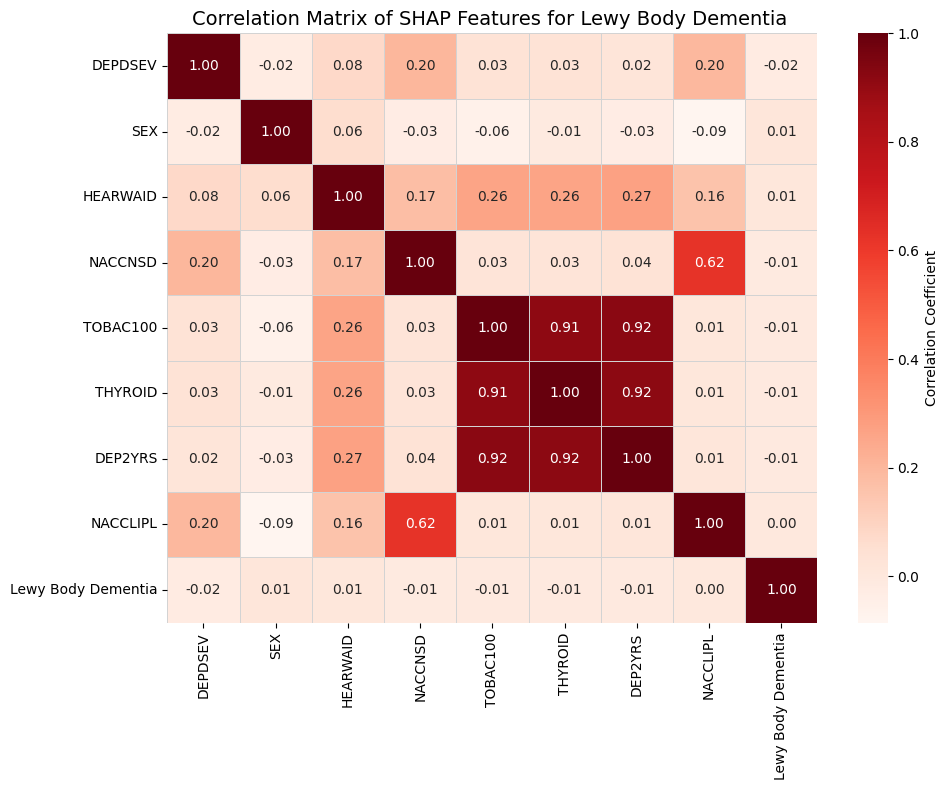

Correlation heatmap saved to: /content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/correlation_heatmap_top8_shap_features_npplewy_only_20250626_031048.png

--- Heatmap Generation Complete ---


In [ ]:
import pandas as pd
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime # Import datetime for timestamp in filename if needed
import warnings
import sys

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# --- Configuration ---
TARGET_DISEASE_COL = 'NPPLEWY' # This is the target column for the Lewy model
RANDOM_STATE = 42 # Defined for consistency
CHECKPOINT_DIR = '/content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/'
PREPROCESSED_DATA_DIR = '/content/drive/MyDrive/alzheimers_model_ultimate/preprocessed_data/'

# Ensure directories exist
os.makedirs(CHECKPOINT_DIR, exist_ok=True)
os.makedirs(PREPROCESSED_DATA_DIR, exist_ok=True)

# Helper function to find the latest checkpoint/data file
def find_latest_file(directory, prefix):
    files = [os.path.join(directory, f) for f in os.listdir(directory) if f.startswith(prefix) and f.endswith(".joblib")]
    if not files:
        return None
    files.sort(key=os.path.getmtime, reverse=True) # Sort by modification time
    return files[0]

print("--- Generating Correlation Matrix Heatmap for Specific Features (Lewy Body Dementia) ---")

# --- 1. Load the Top 9 SHAP Features List ---
top_9_features_list = None
latest_top_features_file = find_latest_file(CHECKPOINT_DIR, f"top_9_shap_features_{TARGET_DISEASE_COL.lower()}_")

if latest_top_features_file:
    try:
        top_9_features_list = joblib.load(latest_top_features_file)
        print(f"Successfully loaded top 9 SHAP features from: {latest_top_features_file}")
    except Exception as e:
        print(f"Error loading top 9 SHAP features: {e}")
        sys.exit("Failed to load top 9 features. Exiting heatmap generation.")
else:
    sys.exit("No file found for top 9 SHAP features. Please run the SHAP plotting cell first to save them. Exiting.")

if not top_9_features_list:
    sys.exit("The loaded list of top 9 SHAP features is empty. Exiting heatmap generation.")


# --- 2. Load Necessary Data for Correlation ---

# Load test data and targets for correlation matrix
latest_preprocessed_file_test = find_latest_file(PREPROCESSED_DATA_DIR, "preprocessed_data_nplewy_")
X_test_processed_for_model = None
y_test_overall_lewy = None

if latest_preprocessed_file_test:
    try:
        loaded_data_test = joblib.load(latest_preprocessed_file_test)
        X_test_processed_for_model = loaded_data_test['X_test_processed_for_model']
        y_test_overall_lewy = loaded_data_test['nplewy_targets_test']
        print(f"Loaded X_test_processed_for_model and {TARGET_DISEASE_COL} targets for correlation.")
    except KeyError as ke:
        print(f"Error: Key '{ke}' not found in loaded preprocessed data. Expected 'X_test_processed_for_model' and 'nplewy_targets_test'.")
        sys.exit("Failed to load required data. Exiting.")
    except Exception as e:
        print(f"Error loading preprocessed data: {e}")
        sys.exit("Failed to load preprocessed data. Exiting heatmap generation.")
else:
    sys.exit("No preprocessed data file found for NPPLEWY. Exiting.")

# Load the final trained model checkpoint to get the *full list of feature names*
# (needed to correctly interpret X_test_processed_for_model if it's a NumPy array)
latest_final_model_checkpoint = find_latest_file(CHECKPOINT_DIR, f"stacking_classifier_final_model_{TARGET_DISEASE_COL.lower()}_")
final_model_all_feature_names = None

if latest_final_model_checkpoint:
    try:
        final_model_info = joblib.load(latest_final_model_checkpoint)
        final_model_all_feature_names = final_model_info['feature_names']
        print(f"Loaded all feature names from final model checkpoint.")
    except Exception as e:
        print(f"Warning: Error loading all feature names from final model checkpoint: {e}. Will attempt to infer from preprocessed data.")
        if isinstance(X_test_processed_for_model, pd.DataFrame):
            final_model_all_feature_names = X_test_processed_for_model.columns.tolist()
        else:
            sys.exit("Critical: Cannot determine full feature names for X_test_processed_for_model. Exiting.")
else:
    print("Warning: No final model checkpoint found. Inferring full feature names from preprocessed data.")
    if isinstance(X_test_processed_for_model, pd.DataFrame):
        final_model_all_feature_names = X_test_processed_for_model.columns.tolist()
    else:
        sys.exit("Critical: Cannot determine full feature names for X_test_processed_for_model. Exiting.")


# Ensure data is ready and X is a DataFrame
if X_test_processed_for_model is None or y_test_overall_lewy is None or final_model_all_feature_names is None:
    sys.exit("Required data for heatmap not fully available. Exiting.")

if isinstance(X_test_processed_for_model, np.ndarray):
    X_full_df = pd.DataFrame(X_test_processed_for_model,
                             columns=final_model_all_feature_names,
                             index=y_test_overall_lewy.index)
else: # It's already a DataFrame
    X_full_df = X_test_processed_for_model.copy()



missing_features = [f for f in top_9_features_list if f not in X_full_df.columns]
if missing_features:

    # Filter the list to only include features actually present
    top_9_features_list = [f for f in top_9_features_list if f in X_full_df.columns]
    if not top_9_features_list:
        sys.exit("No top 9 SHAP features found in the dataset after checking for missing features..")

X_for_heatmap = X_full_df[top_9_features_list].copy()



# --- 4. Align Y and X, and Handle NaNs (FIXED) ---
# Combine features and target into a single DataFrame to ensure perfect alignment during dropna
combined_df = X_for_heatmap.copy()
combined_df['Lewy Body Dementia_target'] = y_test_overall_lewy # Temporarily add target

# Drop rows with any NaN values across the combined DataFrame
original_rows = combined_df.shape[0]
combined_df.dropna(inplace=True)
dropped_rows = original_rows - combined_df.shape[0]
if dropped_rows > 0:
    print(f"Dropped {dropped_rows} rows due to NaN values in features or target for correlation matrix.")

# Separate features and target back into their respective DataFrames/Series
X_for_heatmap_cleaned = combined_df.drop(columns=['Lewy Body Dementia_target'])
y_test_aligned_cleaned = combined_df['Lewy Body Dementia_target']


if X_for_heatmap_cleaned.empty or y_test_aligned_cleaned.empty:
    sys.exit("Filtered data for heatmap is empty after aligning and cleaning. Exiting.")


# --- 5. Generate the Correlation Matrix Heatmap ---
print("  Generating correlation matrix heatmap...")

# Combine features and target for correlation calculation
# Use X_for_heatmap_cleaned, which is already cleaned and filtered
data_for_corr = X_for_heatmap_cleaned.copy()
data_for_corr['Lewy Body Dementia'] = y_test_aligned_cleaned # Final target column name for plot

cor_matrix = data_for_corr.corr()

# Sort features by absolute correlation with the target for better visualization (AD model design)
target_col_name_for_plot = 'Lewy Body Dementia'
if target_col_name_for_plot in cor_matrix.columns:
    cor_target_sorted = cor_matrix[target_col_name_for_plot].drop(target_col_name_for_plot).abs().sort_values(ascending=False)
    sorted_cols = cor_target_sorted.index.tolist() + [target_col_name_for_plot]
    cor_matrix_sorted = cor_matrix.loc[sorted_cols, sorted_cols]
else:
    cor_matrix_sorted = cor_matrix
    print(f"Warning: Target column '{target_col_name_for_plot}' not found in correlation matrix. Plotting without target sorting.")


plt.figure(figsize=(10, 8)) # Adjusted size for 9 features + target (AD model design)
sns.heatmap(cor_matrix_sorted, cmap='Reds', annot=True, fmt=".2f", # AD model design
            linewidths=.5, linecolor='lightgrey', cbar_kws={'label': 'Correlation Coefficient'})
plt.title(f"Correlation Matrix of SHAP Features for Lewy Body Dementia ", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Save the figure with a clear, timestamped filename
current_time_str = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
plot_filename = f'correlation_heatmap_top{len(X_for_heatmap_cleaned.columns)}_shap_features_npplewy_only_{current_time_str}.png'
plt.savefig(os.path.join(CHECKPOINT_DIR, plot_filename), bbox_inches='tight')
plt.show()
plt.close()

print(f"Correlation heatmap saved to: {os.path.join(CHECKPOINT_DIR, plot_filename)}")

print("\n--- Heatmap Generation Complete ---")

In [ ]:
import pandas as pd
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import datetime
import plotly.express as px # For interactive plotting
import warnings
import sys
from collections import Counter

# Suppress specific warnings from libraries
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")
warnings.filterwarnings("ignore", category=UserWarning, module="catboost")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
warnings.filterwarnings("ignore", message="The `k_neighbors` parameter is deprecated and will be removed in a future version.", category=FutureWarning)


# --- Configuration ---
RANDOM_STATE = 42
CHECKPOINT_DIR = '/content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/'
PREPROCESSED_DATA_DIR = '/content/drive/MyDrive/alzheimers_model_ultimate/preprocessed_data/'

# Ensure directories exist
os.makedirs(CHECKPOINT_DIR, exist_ok=True)
os.makedirs(PREPROCESSED_DATA_DIR, exist_ok=True)

# Helper function to find the latest checkpoint/data file based on identifier
def find_latest_checkpoint_file(directory, base_prefix, disease_identifier=None):
    """
    Finds the latest .joblib file that starts with `base_prefix`.
    - If `disease_identifier` is provided (e.g., 'npplewy'), it looks for files
      containing `base_prefix` AND `_disease_identifier_` (case-insensitive)
      to uniquely identify disease-specific checkpoints.
    - If `disease_identifier` is None, it looks for files starting with `base_prefix`
      that DO NOT contain any known disease identifiers (assuming these are generic AD files).
    """
    # List of known disease identifiers that might appear in filenames
    known_disease_identifiers = ['nppad', 'npplewy', 'nplewy'] # Include 'nplewy' for LBD preprocessed file names

    matching_files = []
    for f in os.listdir(directory):
        full_path = os.path.join(directory, f)
        if f.startswith(base_prefix) and f.endswith(".joblib"):
            if disease_identifier:
                # For specific disease, filename MUST contain the identifier (case-insensitive)
                # Check for both '_identifier_' and 'prefixidentifier' patterns
                identifier_lower = disease_identifier.lower()
                if (f"_{identifier_lower}_" in f.lower() or f.startswith(f"{base_prefix}{identifier_lower}")):
                     matching_files.append(full_path)
            else:
                # For generic (AD), filename MUST NOT contain any known disease identifiers
                is_generic_ad_file = True
                for known_id in known_disease_identifiers:
                    if (f"_{known_id.lower()}_" in f.lower() or f.startswith(f"{base_prefix}{known_id.lower()}")):
                        is_generic_ad_file = False
                        break
                if is_generic_ad_file:
                    matching_files.append(full_path)

    if not matching_files:
        return None
    matching_files.sort(key=os.path.getmtime, reverse=True)
    return matching_files[0]


def get_mean_abs_shap_values(disease_target_col):
    """
    Loads/calculates SHAP values for a given disease and returns a Series of
    mean absolute SHAP values for its features.
    Adjusts file prefixes and internal keys based on the disease.
    """
    print(f"\n--- Processing SHAP values for {disease_target_col} ---")

    # --- Determine prefixes, keys, and file identifier based on disease_target_col ---
    final_model_base_prefix = ""
    shap_results_base_prefix = ""
    preprocessed_data_base_prefix = ""
    model_shap_file_identifier = None #
    preprocessed_file_identifier = None
    X_train_key = ""
    y_train_key = ""

    if disease_target_col == 'NPPAD':
        final_model_base_prefix = "stacking_classifier_final_model_"
        shap_results_base_prefix = "shap_results_"
        preprocessed_data_base_prefix = "preprocessed_data_"
        model_shap_file_identifier = None
        preprocessed_file_identifier = None
        X_train_key = 'X_train_processed_for_model'
        y_train_key = 'alz_targets_train'

        shap_plot_feature_removals_explicit = []
        shap_plot_feature_removals_patterns = ['LB', 'FTD']
    elif disease_target_col == 'NPPLEWY':
        final_model_base_prefix = f"stacking_classifier_final_model_"
        shap_results_base_prefix = f"shap_results_"
        preprocessed_data_base_prefix = f"preprocessed_data_"
        model_shap_file_identifier = 'npplewy'
        preprocessed_file_identifier = 'nplewy'
        X_train_key = 'X_train_processed_for_model'
        y_train_key = 'nplewy_targets_train'



    # --- Load the final trained model and preprocessed data needed for SHAP ---
    final_stacking_classifier = None
    X_train_overall = None
    final_model_feature_names = None

    # Attempt to load the final trained model
    latest_final_model_checkpoint = find_latest_checkpoint_file(CHECKPOINT_DIR, final_model_base_prefix, model_shap_file_identifier)

    if latest_final_model_checkpoint:
        try:
            final_model_info = joblib.load(latest_final_model_checkpoint)
            final_stacking_classifier = final_model_info['model']
            final_model_feature_names = final_model_info['feature_names']
            print(f"  Successfully loaded final trained model for {disease_target_col}.")
        except Exception as e:
            print(f"  Error loading final trained model for {disease_target_col} from '{latest_final_model_checkpoint}': {e}. Skipping SHAP for this disease.")
            return None
    else:
        print(f"  Warning: No final trained model checkpoint found for {disease_target_col} with base prefix '{final_model_base_prefix}' and identifier '{model_shap_file_identifier}'. Skipping SHAP for this disease.")
        return None

    # Attempt to load overall training data
    latest_preprocessed_file = find_latest_checkpoint_file(PREPROCESSED_DATA_DIR, preprocessed_data_base_prefix, preprocessed_file_identifier)

    if latest_preprocessed_file:
        try:
            loaded_data_for_shap_context = joblib.load(latest_preprocessed_file)
            X_train_overall = loaded_data_for_shap_context[X_train_key]
            y_train_overall = loaded_data_for_shap_context[y_train_key] # Keep for context, not directly used in explainer
            print(f"  Successfully loaded overall training data for {disease_target_col}.")
        except KeyError as ke:
            print(f"  Error: Key '{ke}' not found in preprocessed data from '{latest_preprocessed_file}' for {disease_target_col}. Skipping SHAP.")
            return None
        except Exception as e:
            print(f"  Error loading overall training data for {disease_target_col} from '{latest_preprocessed_file}': {e}. Skipping SHAP.")
            return None
    else:
        print(f"  Warning: No preprocessed data file found for {disease_target_col} with base prefix '{preprocessed_data_base_prefix}' and identifier '{preprocessed_file_identifier}'. Skipping SHAP for this disease.")
        return None

    # Ensure model and data are available
    if final_stacking_classifier is None or X_train_overall is None or final_model_feature_names is None:
        print(f"  Missing required components for SHAP calculation for {disease_target_col}. Skipping.")
        return None

    # --- SHAP Calculation (Load from checkpoint first, then recalculate if needed) ---
    latest_shap_results_checkpoint = find_latest_checkpoint_file(CHECKPOINT_DIR, shap_results_base_prefix, model_shap_file_identifier)

    shap_values_obj = None
    X_shap_subset_raw = None

    if latest_shap_results_checkpoint:
        try:
            shap_data = joblib.load(latest_shap_results_checkpoint)
            shap_values_obj = shap_data['shap_values_obj']
            X_shap_subset_raw = shap_data['X_shap_subset']
            print(f"  Loaded SHAP results from checkpoint for {disease_target_col}.")
        except Exception as e:
            print(f"  Error loading SHAP results from checkpoint for {disease_target_col} from '{latest_shap_results_checkpoint}': {e}. Will attempt to recalculate.")
            shap_values_obj = None
            X_shap_subset_raw = None

    if shap_values_obj is None or X_shap_subset_raw is None:
        print(f"  Calculating SHAP values for {disease_target_col}...")
        # Ensure X_train_overall is a DataFrame with column names before sampling
        if not isinstance(X_train_overall, pd.DataFrame):
            X_train_overall_df = pd.DataFrame(X_train_overall, columns=final_model_feature_names)
        else:
            X_train_overall_df = X_train_overall.copy()

        X_train_selected_final_model_df = X_train_overall_df[final_model_feature_names].copy()

        num_background_samples = min(500, X_train_selected_final_model_df.shape[0])
        num_shap_samples = min(5000, X_train_selected_final_model_df.shape[0])

        X_shap_subset_raw = X_train_selected_final_model_df.sample(num_shap_samples, random_state=RANDOM_STATE)

        xgb_model_for_shap = final_stacking_classifier.named_estimators_['xgb']
        explainer = shap.TreeExplainer(xgb_model_for_shap, X_shap_subset_raw)

        shap_values_obj = explainer(X_shap_subset_raw)



    # Extract SHAP values for the positive class (class 1)
    if shap_values_obj.values.ndim == 3:
        shap_values_for_positive_class = shap_values_obj.values[:, :, 1]
    else:
        shap_values_for_positive_class = shap_values_obj.values

    feature_names_from_shap = X_shap_subset_raw.columns.tolist()

    # --- Apply disease-specific feature removal for SHAP interpretation (for consistency with plotting) ---
    all_features_to_remove_from_shap = []

    # Add explicit removals
    all_features_to_remove_from_shap.extend(shap_plot_feature_removals_explicit)

    # Add pattern removals
    for feature in feature_names_from_shap:
        for prefix in shap_plot_feature_removals_patterns:
            if feature.startswith(prefix):
                all_features_to_remove_from_shap.append(feature)
                break

    all_features_to_remove_from_shap_unique = list(set(all_features_to_remove_from_shap))

    if all_features_to_remove_from_shap_unique:
        features_to_keep_mask = ~np.isin(np.array(feature_names_from_shap), all_features_to_remove_from_shap_unique)
        shap_values_for_positive_class_filtered = shap_values_for_positive_class[:, features_to_keep_mask]
        feature_names_filtered = np.array(feature_names_from_shap)[features_to_keep_mask].tolist()
        print(f"  Removed {len(all_features_to_remove_from_shap_unique)} plot-specific features for {disease_target_col} SHAP calculation.")
    else:
        shap_values_for_positive_class_filtered = shap_values_for_positive_class
        feature_names_filtered = feature_names_from_shap

    if not feature_names_filtered:
        print(f"  No features remaining after filtering for {disease_target_col}. Cannot calculate mean SHAP.")
        return None

    shap_values_df_filtered = pd.DataFrame(shap_values_for_positive_class_filtered, columns=feature_names_filtered)
    mean_abs_shap_values = shap_values_df_filtered.abs().mean()

    print(f"  Finished processing SHAP values for {disease_target_col}.")
    return mean_abs_shap_values


# --- Main Comparison Logic ---
print("--- Starting Comparison of AD and Lewy Body Dementia Features ---")

# Define target columns for both diseases
AD_TARGET_COL = 'NPPAD' # As per your AD pipeline code
LBD_TARGET_COL = 'NPPLEWY'

# Get mean absolute SHAP values for AD
ad_shap_series = get_mean_abs_shap_values(AD_TARGET_COL)

# Get mean absolute SHAP values for LBD
lbd_shap_series = get_mean_abs_shap_values(LBD_TARGET_COL)

if ad_shap_series is None or lbd_shap_series is None:
    sys.exit("Could not retrieve SHAP values for both diseases. Exiting comparison.")

# Combine the SHAP values into a single DataFrame for plotting
# Use an outer join to include all features present in either series
comparison_df = pd.DataFrame({
    'AD_SHAP': ad_shap_series,
    'LBD_SHAP': lbd_shap_series
}).fillna(0) # Fill NaN values (features not present in one model) with 0

# Add a combined importance for sorting/sizing points
comparison_df['Combined_SHAP'] = comparison_df[['AD_SHAP', 'LBD_SHAP']].max(axis=1)
comparison_df = comparison_df.sort_values(by='Combined_SHAP', ascending=False)



comparison_df = comparison_df[
    (comparison_df['AD_SHAP'] > 1e-6) | (comparison_df['LBD_SHAP'] > 1e-6)
].copy() # Using a small threshold to avoid floating point issues near zero

if comparison_df.empty:
    sys.exit("No features with significant SHAP values found in either model for comparison. Exiting.")


# --- Prepare data for Grouped Bar Chart ---
max_display_features = 18 # Limit to 18 features as requested
features_to_explicitly_remove = ['NPFIXX', 'NACCNORM', 'CODSFLDY','WHODIDDX','NACCAM'] # Features to remove as requested

# First, remove the explicitly requested features
filtered_comparison_df = comparison_df.drop(labels=features_to_explicitly_remove, errors='ignore')

# Then, select the top N features from the filtered DataFrame
top_features_df = filtered_comparison_df.head(max_display_features).copy()

# Melt the DataFrame to long format for Plotly grouped bar chart
plot_df = top_features_df[['AD_SHAP', 'LBD_SHAP']].reset_index().rename(columns={'index': 'Feature'})
plot_df_melted = plot_df.melt(id_vars='Feature', var_name='Disease', value_name='Mean_Abs_SHAP')

# Rename disease categories for clarity in the plot legend
plot_df_melted['Disease'] = plot_df_melted['Disease'].map({
    'AD_SHAP': 'Alzheimer\'s Disease',
    'LBD_SHAP': 'Lewy Body Dementia'
})

# Ensure the features are ordered by their combined importance (descending) in the plot
feature_order = top_features_df.index.tolist()
plot_df_melted['Feature'] = pd.Categorical(plot_df_melted['Feature'], categories=feature_order, ordered=True)
# Sort to ensure Plotly uses the correct order on the y-axis
plot_df_melted = plot_df_melted.sort_values('Feature', ascending=False) # Plotly bar needs ascending for categoryorder 'total ascending'


# --- Create Interactive Plotly Grouped Bar Chart ---
print("\n--- Generating Interactive Grouped Bar Chart for Feature Importance Comparison ---")

fig = px.bar(
    plot_df_melted,
    x='Mean_Abs_SHAP',
    y='Feature',
    color='Disease',
    barmode='group',
    orientation='h',
    title=f'SHAP Feature Comparison', # Title shows actual count
    labels={
        'Mean_Abs_SHAP': 'Mean Absolute SHAP Value',
        'Feature': 'Feature Name'
    },
    height=min(800, 50 * len(top_features_df)),
    width=900,
    template='plotly_white',
    color_discrete_map={ # Custom colors for consistency
        'Alzheimer\'s Disease': '#1f77b4', # Blue
        'Lewy Body Dementia': '#ff7f0e'    # Orange
    }
)

# Update layout for better readability
fig.update_layout(
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    title_font_size=16,
    hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"),
    yaxis={'categoryorder':'array', 'categoryarray': feature_order[::-1]} # Explicitly set y-axis order
)

# Save the plot as an HTML file (for interactivity)
current_time_str = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
plot_filename_html = os.path.join(CHECKPOINT_DIR, f'feature_importance_grouped_bar_AD_LBD_{current_time_str}.html')
fig.write_html(plot_filename_html)

print(f"Interactive grouped bar chart saved to: {plot_filename_html}")

# Display the plot (will open in a new tab if running in a browser environment, or show inline in Jupyter)
fig.show()

print("\n--- Feature Comparison Plot Generation Complete ---")

--- Starting Comparison of AD and Lewy Body Dementia Features ---

--- Processing SHAP values for NPPAD ---
  Successfully loaded final trained model for NPPAD.
  Successfully loaded overall training data for NPPAD.
  Loaded SHAP results from checkpoint for NPPAD.
  Removed 13 plot-specific features for NPPAD SHAP calculation.
  Finished processing SHAP values for NPPAD.

--- Processing SHAP values for NPPLEWY ---
  Successfully loaded final trained model for NPPLEWY.
  Successfully loaded overall training data for NPPLEWY.
  Loaded SHAP results from checkpoint for NPPLEWY.
  Removed 4 plot-specific features for NPPLEWY SHAP calculation.
  Finished processing SHAP values for NPPLEWY.

--- Generating Interactive Grouped Bar Chart for Feature Importance Comparison ---
Interactive grouped bar chart saved to: /content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/feature_importance_grouped_bar_AD_LBD_20250626_033406.html



--- Feature Comparison Plot Generation Complete ---


--- Standalone ADC (NACCADC) Validation Analysis for Lewy Body Dementia (NPPLEWY) ---

--- Loading saved model and essential preprocessed data for validation ---
Successfully loaded raw test targets and NACCADC from: /content/drive/MyDrive/alzheimers_model_ultimate/preprocessed_data/preprocessed_data_nplewy_20250626_024516.joblib
Successfully loaded final trained model for NPPLEWY and its prepared test data from: /content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/stacking_classifier_final_model_npplewy_20250626_003515.joblib
Successfully aligning test data components by index for validation.
DEBUG: y_test_overall_aligned index type: int64
DEBUG: adc_test_aligned index type: int64
DEBUG: y_test_overall_aligned index equals adc_test_aligned index: False
DEBUG: y_test_overall_aligned shape: (25772,)
DEBUG: adc_test_aligned shape: (25772,)
DEBUG: X_test_for_prediction_df shape: (25772, 30)

--- Performing predictions on the aligned test set using the loaded NPPLEWY model ---
DEBU

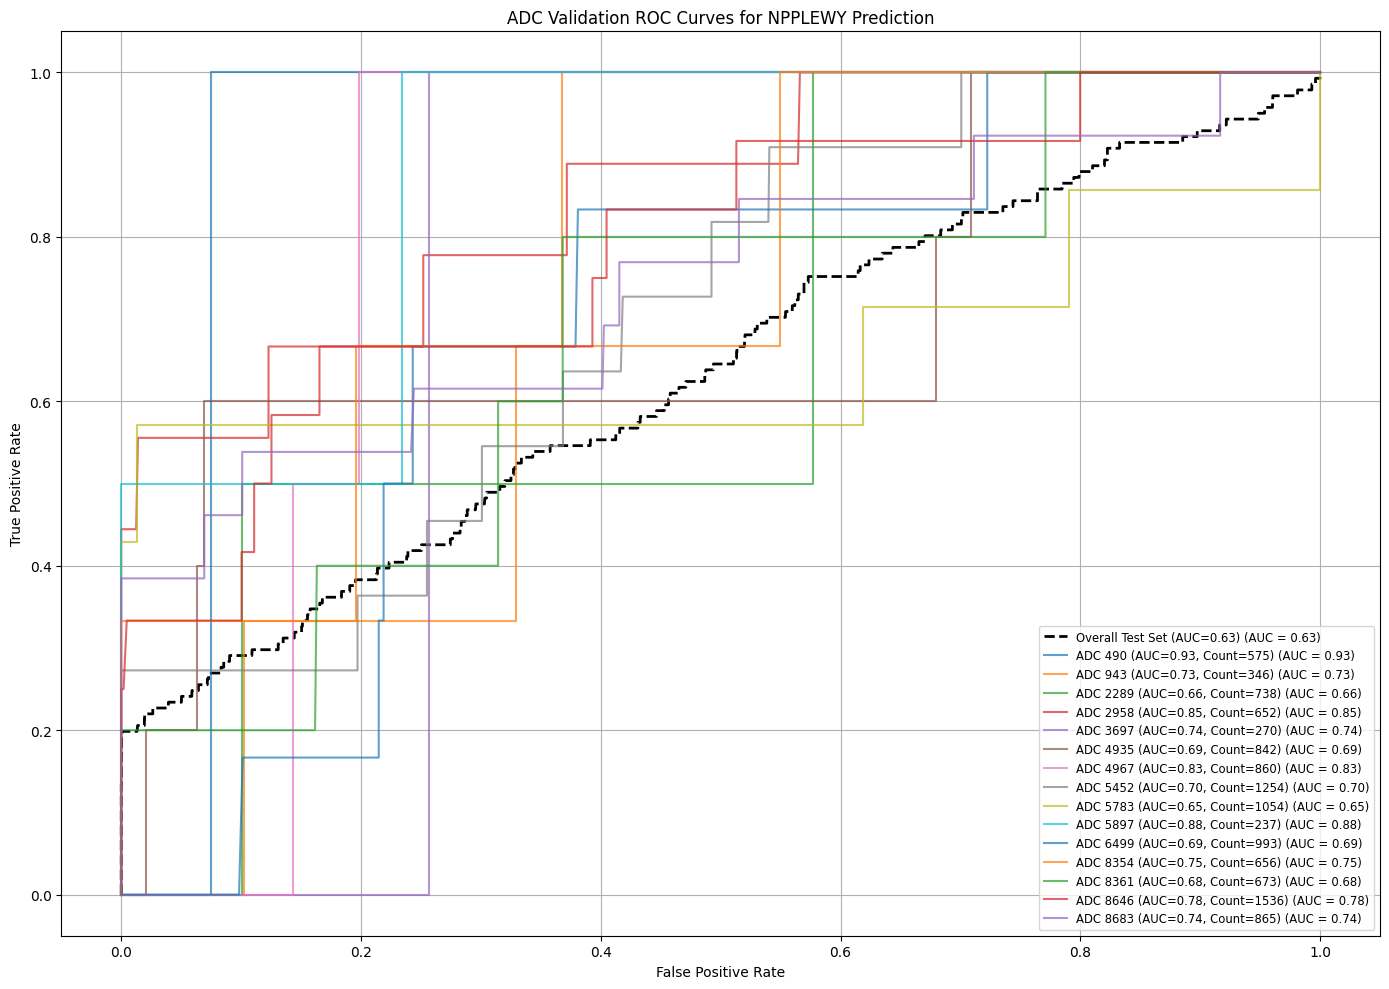


--- ADC Validation for NPPLEWY Complete ---


In [ ]:
import pandas as pd
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, average_precision_score, RocCurveDisplay
from collections import Counter
import warnings
import re
import sys # Import sys for sys.exit()

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

print("--- Standalone ADC (NACCADC) Validation Analysis for Lewy Body Dementia (NPPLEWY) ---")

# --- Configuration ---
TARGET_DISEASE_COL = 'NPPLEWY'
CHECKPOINT_DIR = '/content/drive/MyDrive/alzheimers_model_ultimate/checkpoints/'
PREPROCESSED_DATA_DIR = '/content/drive/MyDrive/alzheimers_model_ultimate/preprocessed_data/'


IMPUTED_TEST_DATA_PATH = '/content/drive/MyDrive/imputed_data/imputed_test.csv'
# --- Plotting Thresholds ---
MIN_SAMPLES_PER_ADC = 200
MIN_AUC_THRESHOLD = 0.65
MAX_AUC_THRESHOLD = 0.95


# Helper function to find the latest checkpoint/data file
def find_latest_file(directory, prefix):
    files = [os.path.join(directory, f) for f in os.listdir(directory) if f.startswith(prefix) and f.endswith(".joblib")]
    if not files:
        return None
    files.sort(key=os.path.getmtime, reverse=True)
    return files[0]

print("\n--- Loading saved model and essential preprocessed data for validation ---")


y_test_overall_raw = None
adc_test_original_full = None


latest_preprocessed_file = find_latest_file(PREPROCESSED_DATA_DIR, "preprocessed_data_nplewy_")

if latest_preprocessed_file:
    try:
        loaded_data = joblib.load(latest_preprocessed_file)

        y_test_overall_raw = loaded_data['nplewy_targets_test']

        if 'original_test_data_with_NACCADC' in loaded_data and loaded_data['original_test_data_with_NACCADC'] is not None:
             adc_test_original_full = loaded_data['original_test_data_with_NACCADC']['NACCADC']
        else:
            print("Warning: 'original_test_data_with_NACCADC' not found or is None in preprocessed data. NACCADC will not be loaded.")

        print(f"Successfully loaded raw test targets and NACCADC from: {latest_preprocessed_file}")
    except KeyError as ke:
        print(f"Error: Key '{ke}' not found in the loaded preprocessed data. Expected 'nplewy_targets_test' and 'original_test_data_with_NACCADC'.")
        # Ensure variables are reset to None on error
        y_test_overall_raw = None
        adc_test_original_full = None
    except Exception as e:
        print(f"Error loading raw test targets or NACCADC from preprocessed data: {e}")
        y_test_overall_raw = None
        adc_test_original_full = None
else:
    print(f"No preprocessed data file found for {TARGET_DISEASE_COL} with the expected prefix.")
    # y_test_overall_raw and adc_test_original_full remain None

# Initialize model and feature variables to None
final_stacking_classifier = None
X_test_for_prediction_df = None
final_model_selected_feature_names = None

latest_final_model_checkpoint = find_latest_file(CHECKPOINT_DIR, f"stacking_classifier_final_model_{TARGET_DISEASE_COL.lower()}_")
if latest_final_model_checkpoint:
    try:
        final_model_info = joblib.load(latest_final_model_checkpoint)
        final_stacking_classifier = final_model_info['model']
        X_test_for_prediction_np = final_model_info['X_test_processed_final']
        final_model_selected_feature_names = final_model_info['feature_names']

        # Ensure y_test_overall_raw is available before attempting to set index
        if y_test_overall_raw is not None:
            # Create DataFrame with columns and align index with y_test_overall_raw
            X_test_for_prediction_df = pd.DataFrame(X_test_for_prediction_np,
                                                    columns=final_model_selected_feature_names,
                                                    index=y_test_overall_raw.index)
        else:
            print("Warning: y_test_overall_raw not loaded, cannot set index for X_test_for_prediction_df. Proceeding without index if possible.")
            X_test_for_prediction_df = pd.DataFrame(X_test_for_prediction_np,
                                                    columns=final_model_selected_feature_names)


        print(f"Successfully loaded final trained model for {TARGET_DISEASE_COL} and its prepared test data from: {latest_final_model_checkpoint}")
    except Exception as e:
        print(f"Error loading final trained model for {TARGET_DISEASE_COL} or its prepared test data: {e}.")
        # variables remain None
else:
    print(f"No final trained model checkpoint found for {TARGET_DISEASE_COL}.")
    # variables remain None


# --- Add a consolidated check before proceeding to main logic ---
if y_test_overall_raw is None:
    sys.exit(f"ERROR: Raw test targets for {TARGET_DISEASE_COL} could not be loaded. Please ensure preprocessing script ran correctly and saved its output for 'nplewy_targets_test'.")
if final_stacking_classifier is None or X_test_for_prediction_df is None:
    sys.exit(f"ERROR: Trained model for {TARGET_DISEASE_COL} or its prepared test data could not be loaded. Please check checkpoint files.")
if adc_test_original_full is None:
    sys.exit(f"ERROR: NACCADC data could not be loaded. Please ensure preprocessing script saved 'original_test_data_with_NACCADC' correctly.")



print("Successfully aligning test data components by index for validation.")
y_test_overall_aligned = y_test_overall_raw
adc_test_aligned = adc_test_original_full

# --- Debug prints for alignment check (can be removed after successful run) ---
print(f"DEBUG: y_test_overall_aligned index type: {y_test_overall_aligned.index.dtype}")
print(f"DEBUG: adc_test_aligned index type: {adc_test_aligned.index.dtype}")
print(f"DEBUG: y_test_overall_aligned index equals adc_test_aligned index: {y_test_overall_aligned.index.equals(adc_test_aligned.index)}")
print(f"DEBUG: y_test_overall_aligned shape: {y_test_overall_aligned.shape}")
print(f"DEBUG: adc_test_aligned shape: {adc_test_aligned.shape}")
print(f"DEBUG: X_test_for_prediction_df shape: {X_test_for_prediction_df.shape}") # Added for more context



# --- Perform Predictions on the aligned test set using the loaded NPPLEWY model ---
print(f"\n--- Performing predictions on the aligned test set using the loaded {TARGET_DISEASE_COL} model ---")

y_pred_proba = final_stacking_classifier.predict_proba(X_test_for_prediction_df.to_numpy())[:, 1]
print(f"DEBUG: y_pred_proba shape: {y_pred_proba.shape}")


# --- Calculating ADC (NACCADC) Validation Metrics for all categories ---
print("\n--- Calculating ADC (NACCADC) Validation Metrics for all categories ---")

unique_adc_categories = np.sort(adc_test_aligned.unique())

adc_results = {}

for adc_cat in unique_adc_categories:
    mask = (adc_test_aligned == adc_cat)


    mask_np = mask.to_numpy()

    y_test_subset_masked = y_test_overall_aligned[mask_np] # Use NumPy mask
    y_pred_proba_subset_masked = y_pred_proba[mask_np]     # Use NumPy mask

    valid_indices = ~y_test_subset_masked.isna()
    y_test_subset_cleaned = y_test_subset_masked[valid_indices]
    y_pred_proba_subset_cleaned = y_pred_proba_subset_masked[valid_indices]

    if len(y_test_subset_cleaned) > 0 and pd.Series(y_test_subset_cleaned).nunique() > 1:
        sub_roc_auc = roc_auc_score(y_test_subset_cleaned, y_pred_proba_subset_cleaned)
        sub_auprc = average_precision_score(y_test_subset_cleaned, y_pred_proba_subset_cleaned)

        adc_results[adc_cat] = {
            'count': len(y_test_subset_cleaned),
            'pos_class_count': Counter(y_test_subset_cleaned)[1],
            'neg_class_count': Counter(y_test_subset_cleaned)[0],
            'roc_auc': sub_roc_auc,
            'auprc': sub_auprc,
            'y_true': y_test_subset_cleaned,
            'y_proba': y_pred_proba_subset_cleaned
        }
    else:
        adc_results[adc_cat] = {
            'count': len(y_test_subset_cleaned),
            'pos_class_count': Counter(y_test_subset_cleaned).get(1, 0),
            'neg_class_count': Counter(y_test_subset_cleaned).get(0, 0),
            'roc_auc': np.nan,
            'auprc': np.nan,
            'y_true': None,
            'y_proba': None
        }

print("  ADC Metrics calculated for all categories.")


# --- Plotting ROC Curves for Filtered ADC Categories ---

adc_roc_curves_data = []

for adc_cat in sorted(adc_results.keys()):
    metrics = adc_results[adc_cat]
    roc_auc_val = metrics['roc_auc']
    count_val = metrics['count']

    # New condition for plotting: filter by sample count AND AUC range
    if (not np.isnan(roc_auc_val) and
        count_val >= MIN_SAMPLES_PER_ADC and
        roc_auc_val >= MIN_AUC_THRESHOLD and
        roc_auc_val <= MAX_AUC_THRESHOLD):

        label = f'ADC {adc_cat} (AUC={roc_auc_val:.2f}, Count={count_val})'
        adc_roc_curves_data.append((metrics['y_true'], metrics['y_proba'], label))

model_name = "Stacking Classifier"
model_save_path = CHECKPOINT_DIR

if adc_roc_curves_data:
    plt.figure(figsize=(14, 10))
    ax = plt.gca()

    overall_y_true_cleaned = y_test_overall_aligned.dropna()

    overall_non_na_mask = ~y_test_overall_aligned.isna()
    overall_y_pred_proba_cleaned = y_pred_proba[overall_non_na_mask.to_numpy()] # Use NumPy mask here too


    if pd.Series(overall_y_true_cleaned).nunique() > 1:
        overall_roc_auc = roc_auc_score(overall_y_true_cleaned, overall_y_pred_proba_cleaned)
        RocCurveDisplay.from_predictions(overall_y_true_cleaned, overall_y_pred_proba_cleaned,
                                        name=f'Overall Test Set (AUC={overall_roc_auc:.2f})',
                                        ax=ax, linewidth=2, color='black', linestyle='--')
    else:
        print("Warning: Overall test set does not have enough unique classes for ROC AUC calculation. Skipping overall plot.")


    for adc_y, adc_probs, label in adc_roc_curves_data:
        RocCurveDisplay.from_predictions(adc_y, adc_probs,
                                         name=label,
                                         ax=ax, alpha=0.7, linewidth=1.5)

    plt.title(f"ADC Validation ROC Curves for {TARGET_DISEASE_COL} Prediction")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.legend(loc='lower right', fontsize='small')
    plt.grid(True)
    plt.tight_layout()

    plot_filename = f'{model_name.replace(" ", "_").lower()}_{TARGET_DISEASE_COL.lower()}_adc_validation_filtered_roc_curves.png'
    plt.savefig(os.path.join(model_save_path, plot_filename))
    plt.show()
    plt.close()

else:
    print(f"  No NACCADC categories met the specified criteria (min samples {MIN_SAMPLES_PER_ADC}, AUC between {MIN_AUC_THRESHOLD} and {MAX_AUC_THRESHOLD}) for plotting ROC curves for {TARGET_DIFFER_COL}.")

print(f"\n--- ADC Validation for {TARGET_DISEASE_COL} Complete ---")